# Poryecto Final Data Science

Este proyecto busca una solucion integral para un contact center telefonico que maneja multiples idiomas.
El proyecto busca realizar un forecast que se ajuste a la realidad con el fin de poder optimizar la plantilla operativa con la cantidad correcta de FTEs (Full time employees) para garantizar los niveles de servicios requeridos por los clientes


# Modulo I
Forecast de llamadas

## Analisis de base de datos 

In [7]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
# Lectura de dataset de telefonia , contiene datos desde el 01/03/2024 al 30/04/2025

raw_data = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(raw_data, sheet_name='call_volumen')


df.head()


conversation_id   cliente idioma      queue_name  \
0  00016c9a-59e4-459f-a935-d910388bf4f2      AMEX     ES  COL_AMX_CS_ESP   
1  00018279-8f9d-4373-8be5-82c7a01c27f4      AMEX     EN  COL_AMX_CS_ENG   
2  000282e3-a4bc-4b97-9293-28d9247684aa    AIRBNB     ES      AirBnB_ESP   
3  0002b0e9-d322-4156-bbc8-c89c9805508d      AMEX     EN  COL_AMX_CS_ENG   
4  0002e9e3-6b24-426d-bb8a-8f477b1e4ea3  COLUMBUS     IT    Columbus_ITA   

         weekday            date_time  Offered  Answered  \
0     5 - Friday  2025-04-04 11:15:00        1         1   
1    2 - Tuesday  2025-04-01 11:30:00        1         1   
2   4 - Thursday  2024-12-05 15:00:00        1         1   
3     1 - Monday  2025-02-03 14:45:00        1         1   
4  3 - Wednesday  2025-03-26 10:15:00        1         1   

   Service Level % 30 sec  % Abandon                     AHT  \
0                     1.0         0.0 0 days 00:07:22.881000   
1                     1.0         0.0 0 days 00:07:00.728000   
2                     1.0         0.0 0 days 00:05:00.119000   
3                     1.0         0.0 0 days 00:05:18.136000   
4                     0.0         0.0 0 days 00:06:11.451000   

              Talk (Avg)             hold (Avg)                    ACW  
0 0 days 00:05:06.714000 0 days 00:01:36.167000        0 days 00:00:40  
1 0 days 00:06:20.728000                    NaT        0 days 00:00:40  
2 0 days 00:04:00.847000                    NaT 0 days 00:00:59.272000  
3 0 days 00:03:48.136000                    NaT        0 days 00:01:30  
4 0 days 00:05:04.951000                    NaT 0 days 00:01:06.500000

In [9]:
# Tamaño y tipos de datos
print(df.shape)
print(df.dtypes)

# Información general y nulos
df.info()
df.isnull().sum()


(87009, 14)
conversation_id                    object
cliente                            object
idioma                             object
queue_name                         object
weekday                            object
date_time                          object
Offered                             int64
Answered                            int64
Service Level % 30 sec            float64
% Abandon                         float64
AHT                       timedelta64[ns]
Talk (Avg)                timedelta64[ns]
hold (Avg)                timedelta64[ns]
ACW                       timedelta64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87009 entries, 0 to 87008
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   conversation_id         87009 non-null  object         
 1   cliente                 87009 non-null  object         
 2   idioma                  8700

conversation_id               0
cliente                       0
idioma                        0
queue_name                    0
weekday                       0
date_time                     0
Offered                       0
Answered                      0
Service Level % 30 sec     3259
% Abandon                  3259
AHT                        7092
Talk (Avg)                 7092
hold (Avg)                70915
ACW                        7122
dtype: int64

In [10]:
# descripción de datos numéricos y categóricos
df.describe(include='all')  # Incluye datos numéricos y categóricos


conversation_id cliente idioma      queue_name  \
count                                  87009   87009  87009           87009   
unique                                 82675       3     13              42   
top     bd44fd13-277f-48a0-b913-3dfa825cdcf6    AMEX     FR  COL_AMX_CS_ENG   
freq                                       5   46918  25922           15887   
mean                                     NaN     NaN    NaN             NaN   
std                                      NaN     NaN    NaN             NaN   
min                                      NaN     NaN    NaN             NaN   
25%                                      NaN     NaN    NaN             NaN   
50%                                      NaN     NaN    NaN             NaN   
75%                                      NaN     NaN    NaN             NaN   
max                                      NaN     NaN    NaN             NaN   

           weekday            date_time       Offered      Answered  \
count        87009                87009  87009.000000  87009.000000   
unique           7                10332           NaN           NaN   
top     1 - Monday  2025-03-21 11:30:00           NaN           NaN   
freq         20409                   52           NaN           NaN   
mean           NaN                  NaN      0.965452      0.920640   
std            NaN                  NaN      0.200512      0.281629   
min            NaN                  NaN      0.000000      0.000000   
25%            NaN                  NaN      1.000000      1.000000   
50%            NaN                  NaN      1.000000      1.000000   
75%            NaN                  NaN      1.000000      1.000000   
max            NaN                  NaN      6.000000      6.000000   

        Service Level % 30 sec    % Abandon                         AHT  \
count             83750.000000  83750.000000                      79917   
unique                     NaN           NaN                        NaN   
top                        NaN           NaN                        NaN   
freq                       NaN           NaN                        NaN   
mean                  0.810179      0.039741  0 days 00:06:51.946677027   
std                   0.391993      0.195269  0 days 00:16:48.234063851   
min                   0.000000      0.000000     0 days 00:00:00.120000   
25%                   1.000000      0.000000     0 days 00:03:42.657000   
50%                   1.000000      0.000000     0 days 00:05:44.136000   
75%                   1.000000      0.000000     0 days 00:08:37.064000   
max                   1.000000      1.000000     2 days 23:30:40.658000   

                       Talk (Avg)                 hold (Avg)  \
count                       79917                      16094   
unique                        NaN                        NaN   
top                           NaN                        NaN   
freq                          NaN                        NaN   
mean    0 days 00:05:18.733977238  0 days 00:02:32.788384056   
std     0 days 00:04:02.845138829  0 days 00:02:29.890370396   
min        0 days 00:00:00.028000     0 days 00:00:00.022000   
25%        0 days 00:02:37.388000     0 days 00:00:54.881750   
50%        0 days 00:04:26.302000     0 days 00:01:50.392500   
75%        0 days 00:06:57.372000     0 days 00:03:20.614500   
max        0 days 01:10:27.951000     0 days 00:34:53.800000   

                              ACW  
count                       79887  
unique                        NaN  
top                           NaN  
freq                          NaN  
mean    0 days 00:01:02.584025874  
std     0 days 00:16:11.046894747  
min               0 days 00:00:00  
25%        0 days 00:00:18.333500  
50%        0 days 00:00:54.173000  
75%               0 days 00:01:30  
max        2 days 23:30:36.332000

In [11]:
# convertir columnas de fecha y hora a datetime

df['date_time'] = pd.to_datetime(df['date_time'])  # Convertir a datetime
df['Fecha'] = df['date_time'].dt.date         # Crear columna solo con la fecha
df['Hora'] = df['date_time'].dt.time          # Extraer la hora

In [12]:
df.describe(include='all')  # Verificar que la conversión fue exitosa

conversation_id cliente idioma      queue_name  \
count                                  87009   87009  87009           87009   
unique                                 82675       3     13              42   
top     bd44fd13-277f-48a0-b913-3dfa825cdcf6    AMEX     FR  COL_AMX_CS_ENG   
freq                                       5   46918  25922           15887   
mean                                     NaN     NaN    NaN             NaN   
min                                      NaN     NaN    NaN             NaN   
25%                                      NaN     NaN    NaN             NaN   
50%                                      NaN     NaN    NaN             NaN   
75%                                      NaN     NaN    NaN             NaN   
max                                      NaN     NaN    NaN             NaN   
std                                      NaN     NaN    NaN             NaN   

           weekday                      date_time       Offered      Answered  \
count        87009                          87009  87009.000000  87009.000000   
unique           7                            NaN           NaN           NaN   
top     1 - Monday                            NaN           NaN           NaN   
freq         20409                            NaN           NaN           NaN   
mean           NaN  2024-12-11 11:07:22.816260608      0.965452      0.920640   
min            NaN            2024-03-01 09:00:00      0.000000      0.000000   
25%            NaN            2024-09-09 09:15:00      1.000000      1.000000   
50%            NaN            2025-01-29 16:45:00      1.000000      1.000000   
75%            NaN            2025-03-18 12:15:00      1.000000      1.000000   
max            NaN            2025-04-30 18:30:00      6.000000      6.000000   
std            NaN                            NaN      0.200512      0.281629   

        Service Level % 30 sec    % Abandon                         AHT  \
count             83750.000000  83750.000000                      79917   
unique                     NaN           NaN                        NaN   
top                        NaN           NaN                        NaN   
freq                       NaN           NaN                        NaN   
mean                  0.810179      0.039741  0 days 00:06:51.946677027   
min                   0.000000      0.000000     0 days 00:00:00.120000   
25%                   1.000000      0.000000     0 days 00:03:42.657000   
50%                   1.000000      0.000000     0 days 00:05:44.136000   
75%                   1.000000      0.000000     0 days 00:08:37.064000   
max                   1.000000      1.000000     2 days 23:30:40.658000   
std                   0.391993      0.195269  0 days 00:16:48.234063851   

                       Talk (Avg)                 hold (Avg)  \
count                       79917                      16094   
unique                        NaN                        NaN   
top                           NaN                        NaN   
freq                          NaN                        NaN   
mean    0 days 00:05:18.733977238  0 days 00:02:32.788384056   
min        0 days 00:00:00.028000     0 days 00:00:00.022000   
25%        0 days 00:02:37.388000     0 days 00:00:54.881750   
50%        0 days 00:04:26.302000     0 days 00:01:50.392500   
75%        0 days 00:06:57.372000     0 days 00:03:20.614500   
max        0 days 01:10:27.951000     0 days 00:34:53.800000   
std     0 days 00:04:02.845138829  0 days 00:02:29.890370396   

                              ACW       Fecha      Hora  
count                       79887       87009     87009  
unique                        NaN         325        55  
top                           NaN  2025-03-21  11:15:00  
freq                          NaN        1067      3124  
mean    0 days 00:01:02.584025874         NaN       NaN  
min               0 days 00:00:00         NaN       NaN  
25%        0 days 00:00:18.3335

In [13]:
# mostrar las ultimas 10 filas del dataframe
df.tail(20)

conversation_id   cliente idioma      queue_name  \
86989  fff239e0-a803-4339-9083-23d6204b1716      AMEX     SE  COL_AMX_CS_SUE   
86990  fff30005-0d66-4a38-a704-3c4235cf4043  COLUMBUS     EN     Columbus_IN   
86991  fff424d2-bb85-4edd-94ee-50682a615a69      AMEX     EN  COL_AMX_CS_ENG   
86992  fff47d14-64d3-4ee3-930b-7934196476c5      AMEX     EN  COL_AMX_CS_ENG   
86993  fff5dfb5-319e-47e5-abfb-e61a7868a39b      AMEX     IT  COL_AMX_CS_ITA   
86994  fff729e5-b423-469b-890f-a49394be7503    AIRBNB     FR      AirBnB_FRA   
86995  fff732d5-a650-4d80-b2a2-3320e5fec485      AMEX     EN  COL_AMX_CS_ENG   
86996  fff74650-c0ba-4ab1-a55a-a875a2af54eb      AMEX     FR  COL_AMX_CS_FRA   
86997  fff77e81-c44f-4182-a6ef-31c7d4175598      AMEX     EN  COL_AMX_CS_ENG   
86998  fff8cd1c-1fbc-4273-8779-68b0bcda3548      AMEX     IT  COL_AMX_CS_ITA   
86999  fff987a6-12ae-4657-b87a-1d288c7339d5      AMEX     FR  COL_AMX_CS_FRA   
87000  fff9f896-9867-4cb0-9001-836d28ee892c  COLUMBUS     PT     Columbus_PT   
87001  fffa2661-6233-4ec7-b6cf-95c96e6c05db      AMEX     FR  COL_AMX_CS_FRA   
87002  fffb38ba-7705-4e87-a7fc-f555ad44a966      AMEX     EN  COL_AMX_CS_ENG   
87003  fffb45f9-8692-4f64-90a7-7f6beb1c8bec  COLUMBUS     FR     Columbus_FR   
87004  fffbd54f-d2d9-4ef5-b548-052e57bb74a1  COLUMBUS     DE     Columbus_DE   
87005  fffc5fd5-787a-4f88-a103-17bdc082c26f      AMEX     IT  COL_AMX_CS_ITA   
87006  fffc5fd5-787a-4f88-a103-17bdc082c26f      AMEX     IT  COL_AMX_CS_ITA   
87007  fffcc008-d303-483d-9b5d-5667196d8a5d      AMEX     EN  COL_AMX_CS_ENG   
87008  fffeb840-8660-443e-9a88-51d9549bd08c      AMEX     SE  COL_AMX_CS_SUE   

             weekday           date_time  Offered  Answered  \
86989     5 - Friday 2025-04-11 12:15:00        1         1   
86990    2 - Tuesday 2024-03-26 12:15:00        1         1   
86991   4 - Thursday 2025-03-06 13:45:00        1         1   
86992  3 - Wednesday 2025-04-23 11:45:00        1         1   
86993     5 - Friday 2025-03-21 12:00:00        1         1   
86994     5 - Friday 2024-10-25 17:00:00        1         1   
86995   4 - Thursday 2025-01-23 14:45:00        1         1   
86996    2 - Tuesday 2025-03-04 10:30:00        1         1   
86997   4 - Thursday 2025-04-03 14:45:00        1         0   
86998     1 - Monday 2025-04-28 13:30:00        1         0   
86999  3 - Wednesday 2025-01-29 15:30:00        1         1   
87000  3 - Wednesday 2024-08-14 09:00:00        1         0   
87001  3 - Wednesday 2025-01-29 14:15:00        1         1   
87002     1 - Monday 2025-01-13 14:00:00        1         0   
87003    2 - Tuesday 2024-05-07 12:30:00        1         1   
87004     5 - Friday 2025-02-28 09:30:00        1         1   
87005     1 - Monday 2025-03-10 16:30:00        1         1   
87006     1 - Monday 2025-03-10 16:45:00        0         0   
87007     5 - Friday 2025-04-11 17:45:00        1         1   
87008     1 - Monday 2025-04-28 11:00:00        1         1   

       Service Level % 30 sec  % Abandon                     AHT  \
86989                     1.0         0.0 0 days 00:06:21.743000   
86990                     1.0         0.0 0 days 00:07:29.864000   
86991                     1.0         0.0 0 days 00:02:43.832000   
86992                     0.0         0.0 0 days 00:07:08.336000   
86993                     1.0         0.0 0 days 00:00:43.513000   
86994                     0.0         0.0 0 days 00:04:26.878000   
86995                     1.0         0.0 0 days 00:13:40.013000   
86996                     1.0         0.0 0 days 00:09:23.507000   
86997                     0.0         1.0                    NaT   
86998                     0.0         1.0                    NaT   
86999                     1.0         0.0 0 days 00:11:29.178000   
87000                     0.0         1.0                    NaT   
87001                     1.0         0.0 0 days 00:05:18.037000   
87002                     0.0         1.0                    NaT   
870

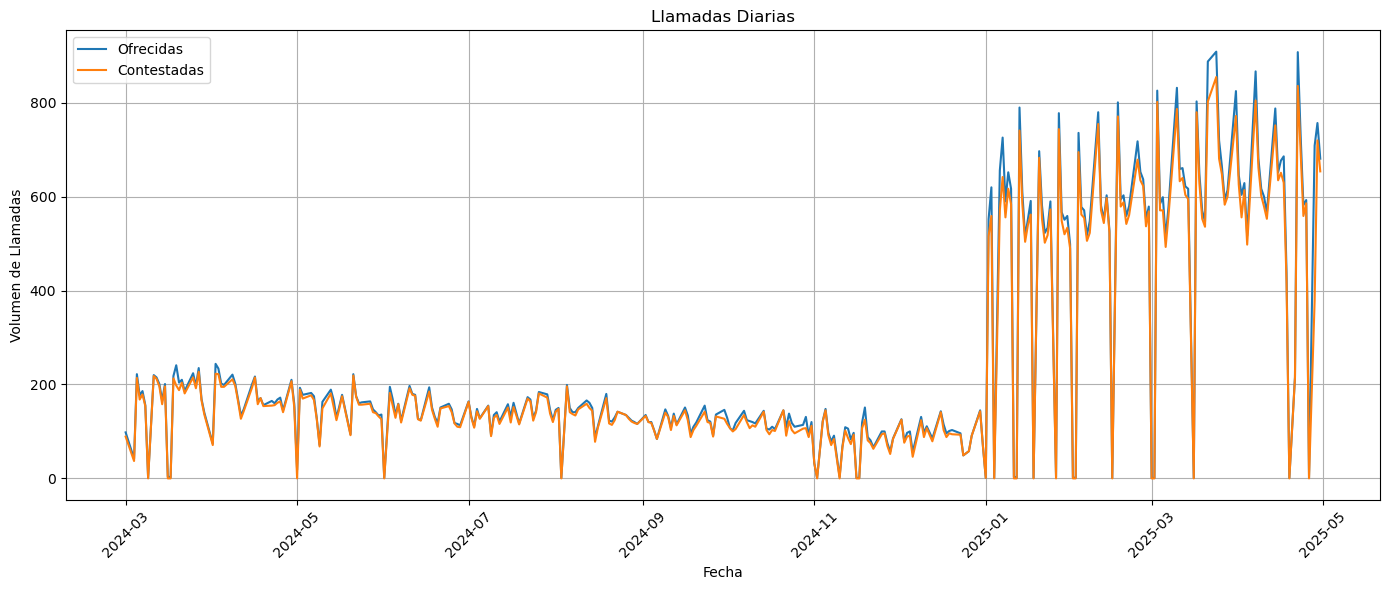

In [14]:
# Distribución de datos por fecha

import matplotlib.pyplot as plt

df_diario = df.groupby('Fecha')[['Offered', 'Answered']].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(df_diario['Fecha'], df_diario['Offered'], label='Ofrecidas')
plt.plot(df_diario['Fecha'], df_diario['Answered'], label='Contestadas')
plt.title('Llamadas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Llamadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


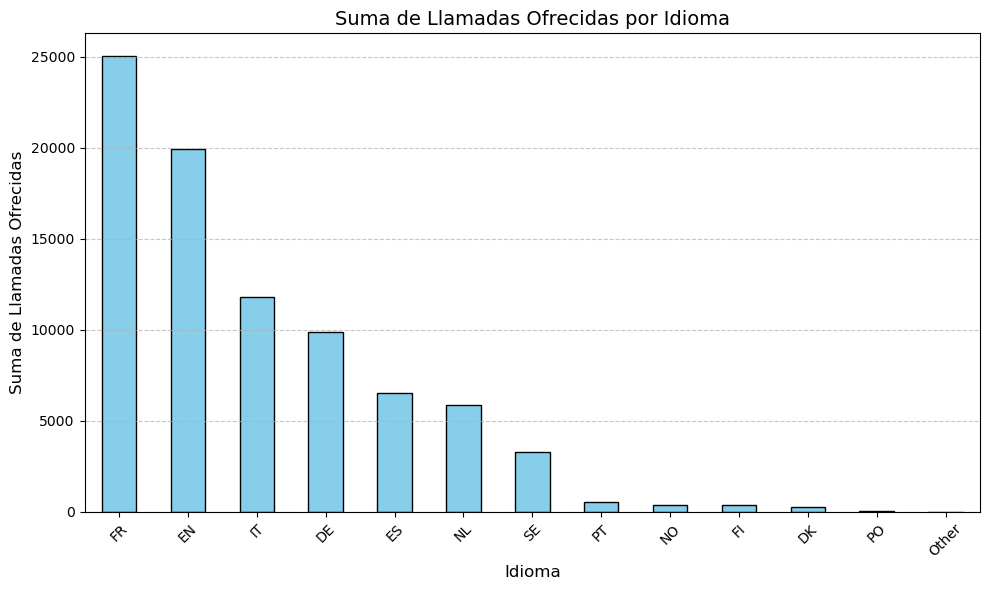

In [15]:
# Agrupar por idioma y sumar la columna 'Offered'
df_idioma = df.groupby('idioma')['Offered'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_idioma.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Suma de Llamadas Ofrecidas por Idioma', fontsize=14)
plt.xlabel('Idioma', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



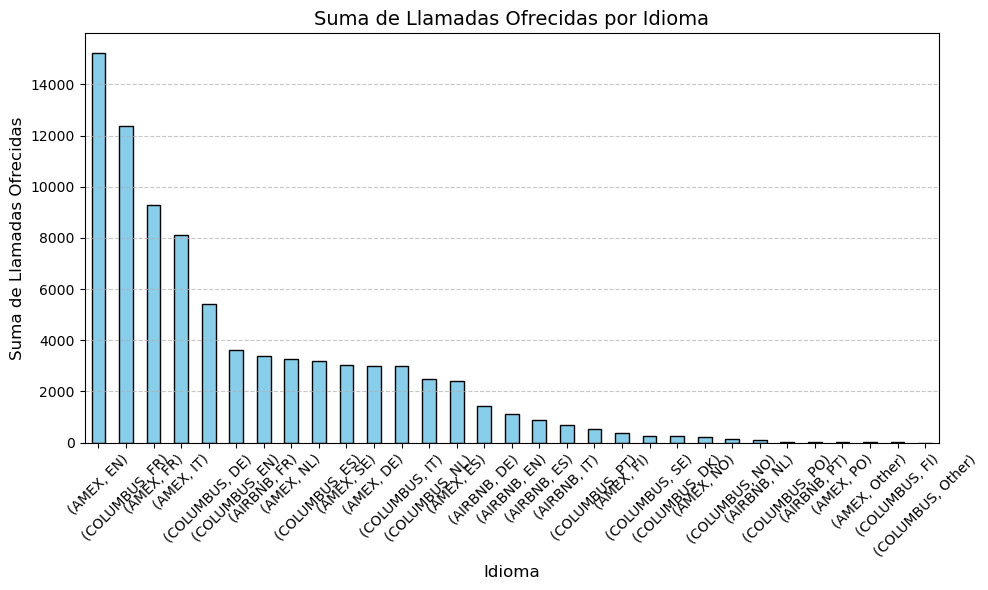

In [16]:
# Agrupar por idioma y sumar la columna 'Offered'
df_idioma = df.groupby(['cliente','idioma'])['Offered'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df_idioma.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Suma de Llamadas Ofrecidas por Idioma', fontsize=14)
plt.xlabel('Idioma', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

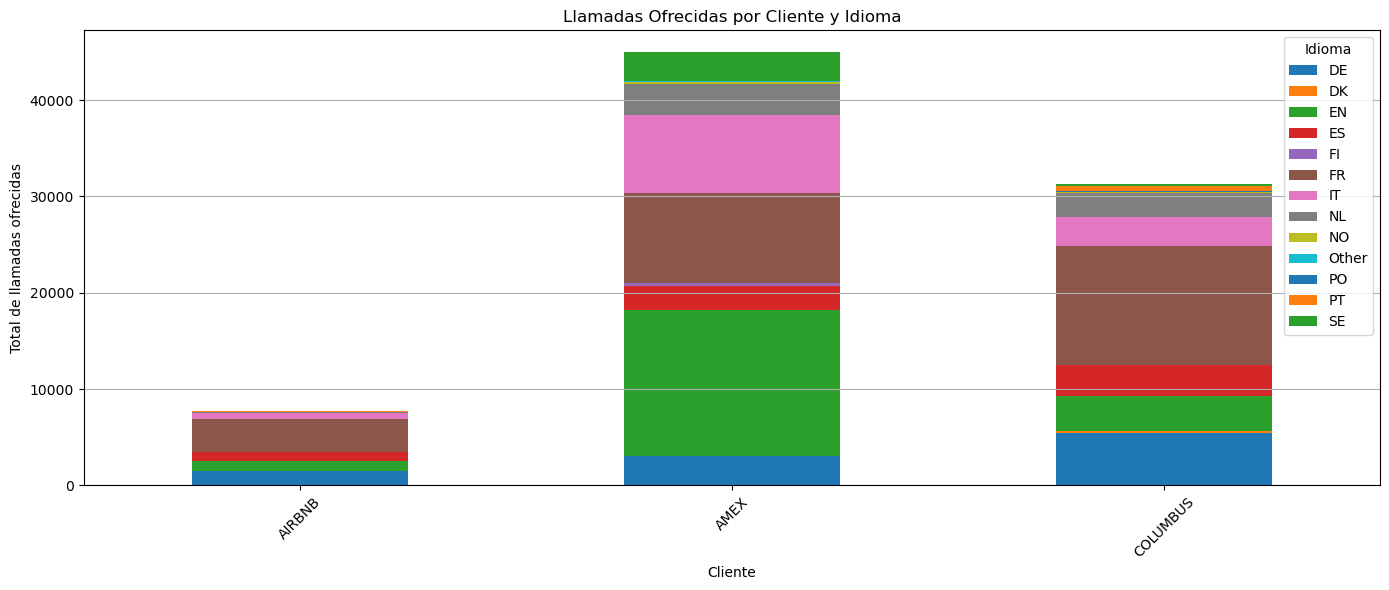

In [17]:
# Agrupar por cliente e idioma y sumar llamadas ofrecidas
df_cliente_idioma = df.groupby(['cliente', 'idioma'])['Offered'].sum().reset_index()

# Crear gráfico de barras agrupado por cliente y desglosado por idioma
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
pivot_data = df_cliente_idioma.pivot(index='cliente', columns='idioma', values='Offered').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 6))

plt.title('Llamadas Ofrecidas por Cliente y Idioma')
plt.xlabel('Cliente')
plt.ylabel('Total de llamadas ofrecidas')
plt.xticks(rotation=45)
plt.legend(title='Idioma')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


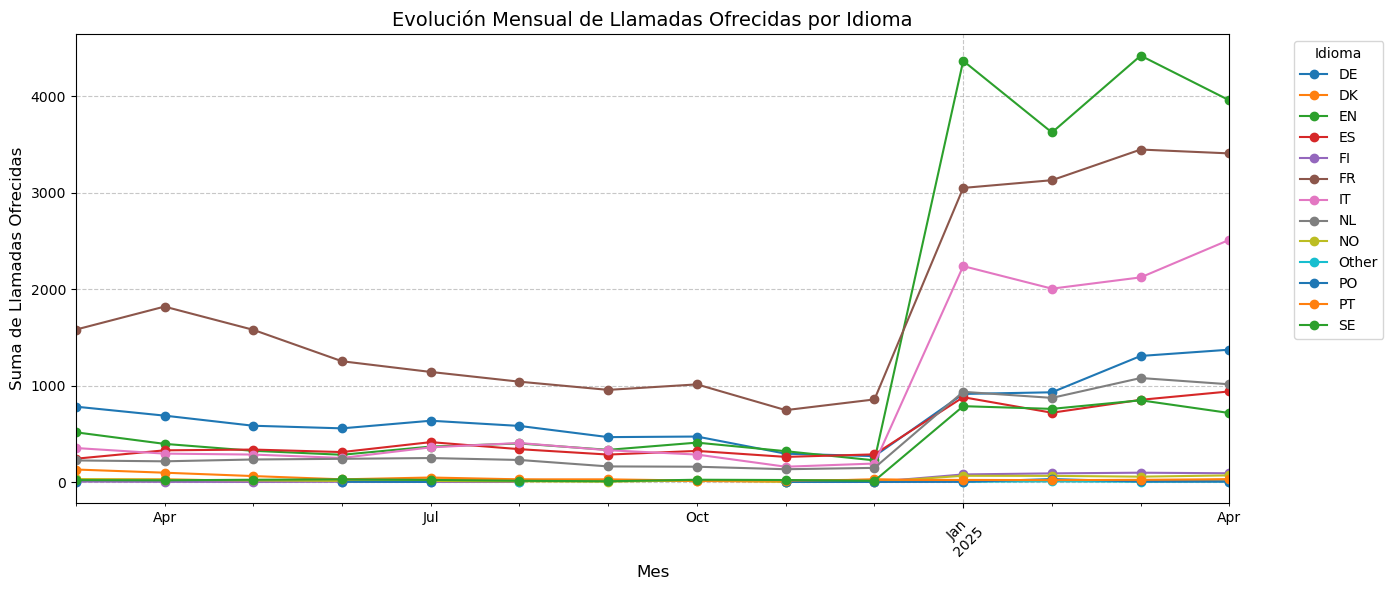

In [18]:
# Agrupar por mes y por idioma
df['Mes'] = pd.to_datetime(df['Fecha']).dt.to_period('M')  # Crear columna de mes
df_mes = df.groupby(['Mes', 'idioma'])['Offered'].sum().unstack()

# Gráfico de evolución mensual
plt.figure(figsize=(14, 6))
df_mes.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Mensual de Llamadas Ofrecidas por Idioma', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



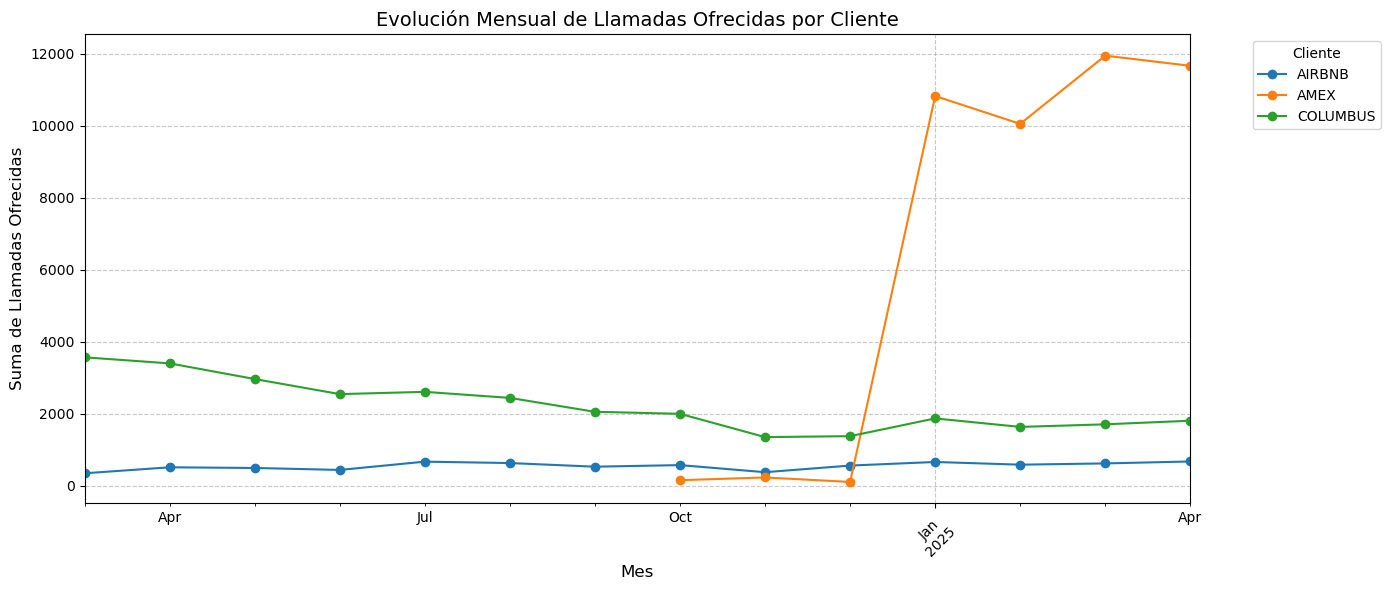

In [19]:
# Agrupar por mes y por cliente
df['Mes'] = pd.to_datetime(df['Fecha']).dt.to_period('M')  # Crear columna de mes
df_mes = df.groupby(['Mes', 'cliente'])['Offered'].sum().unstack()

# Gráfico de evolución mensual
plt.figure(figsize=(14, 6))
df_mes.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Mensual de Llamadas Ofrecidas por Cliente', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


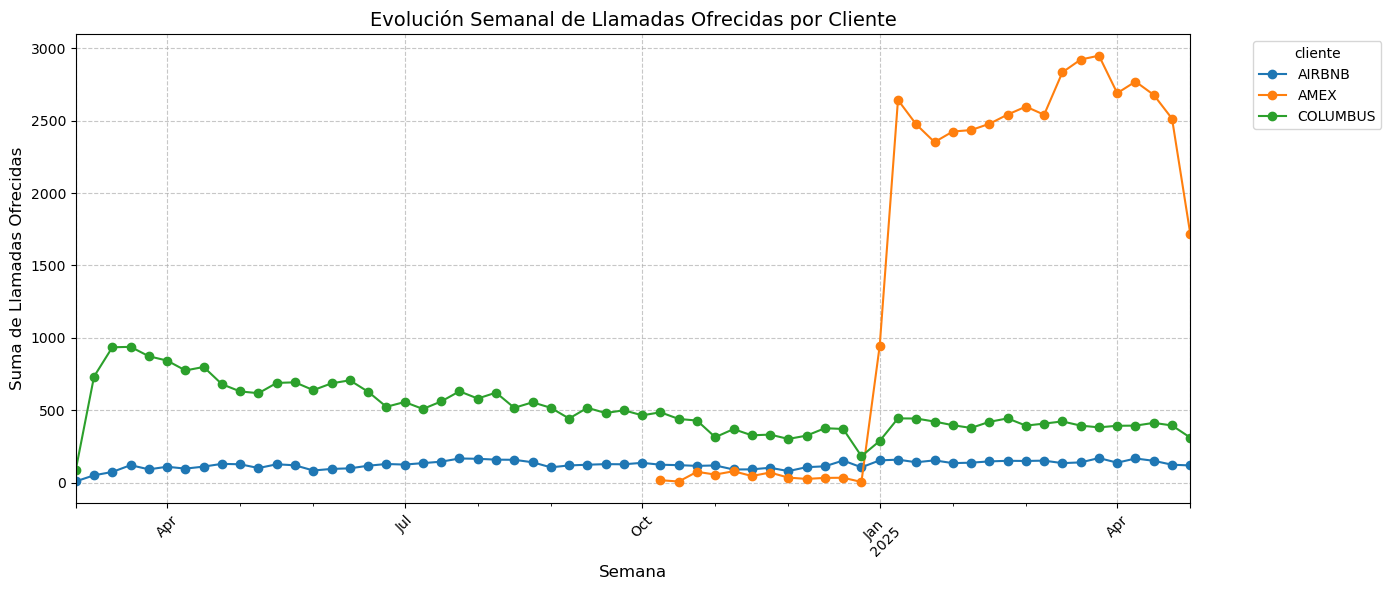

In [20]:
# Agrupar por semana y por idioma
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')  # Crear columna de semana
df_semana = df.groupby(['Semana', 'cliente'])['Offered'].sum().unstack()

# Gráfico de evolución semanal
plt.figure(figsize=(14, 6))
df_semana.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Semanal de Llamadas Ofrecidas por Cliente', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

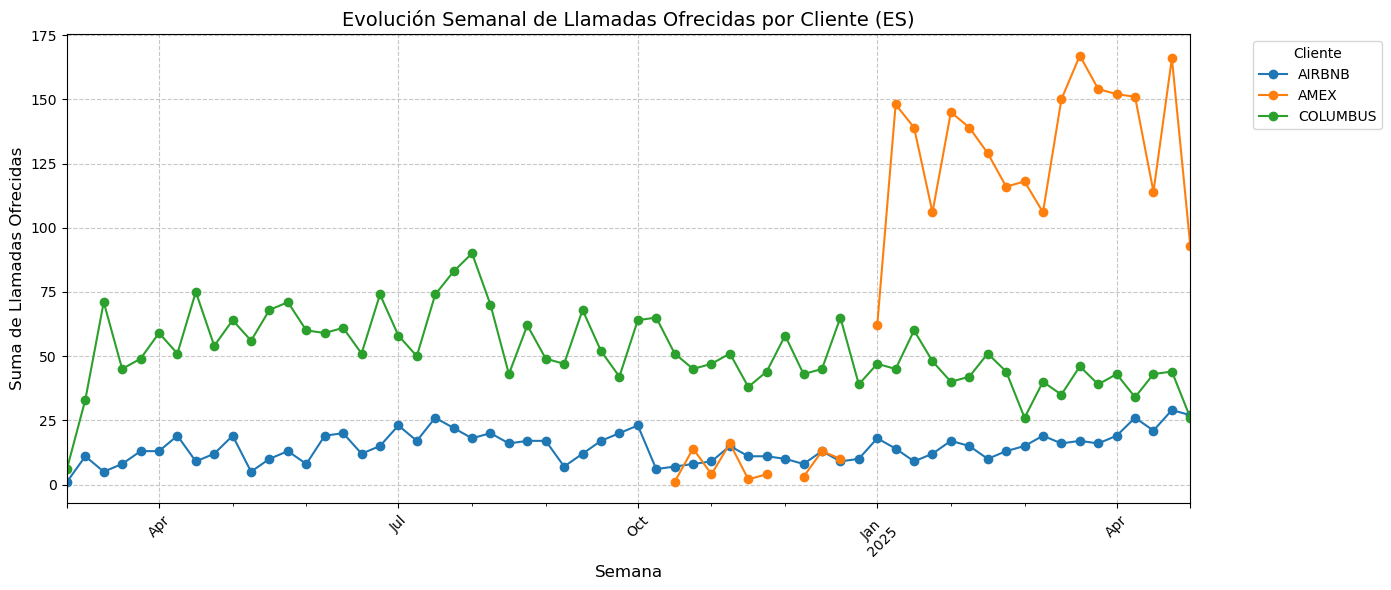

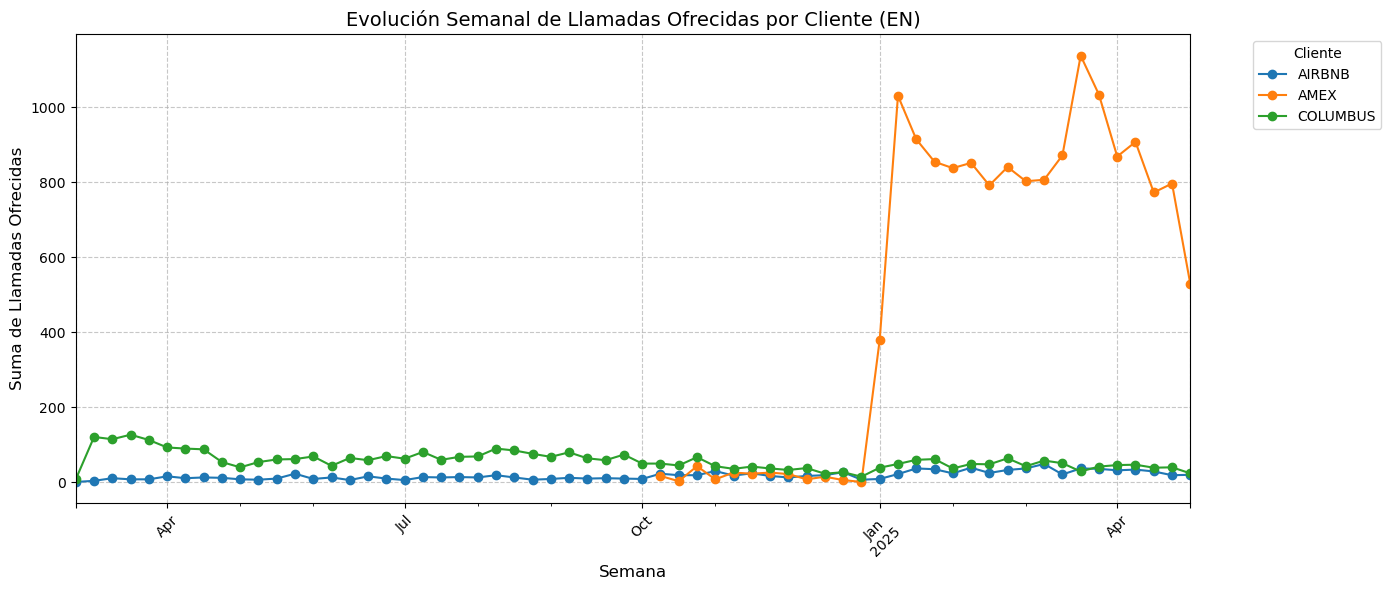

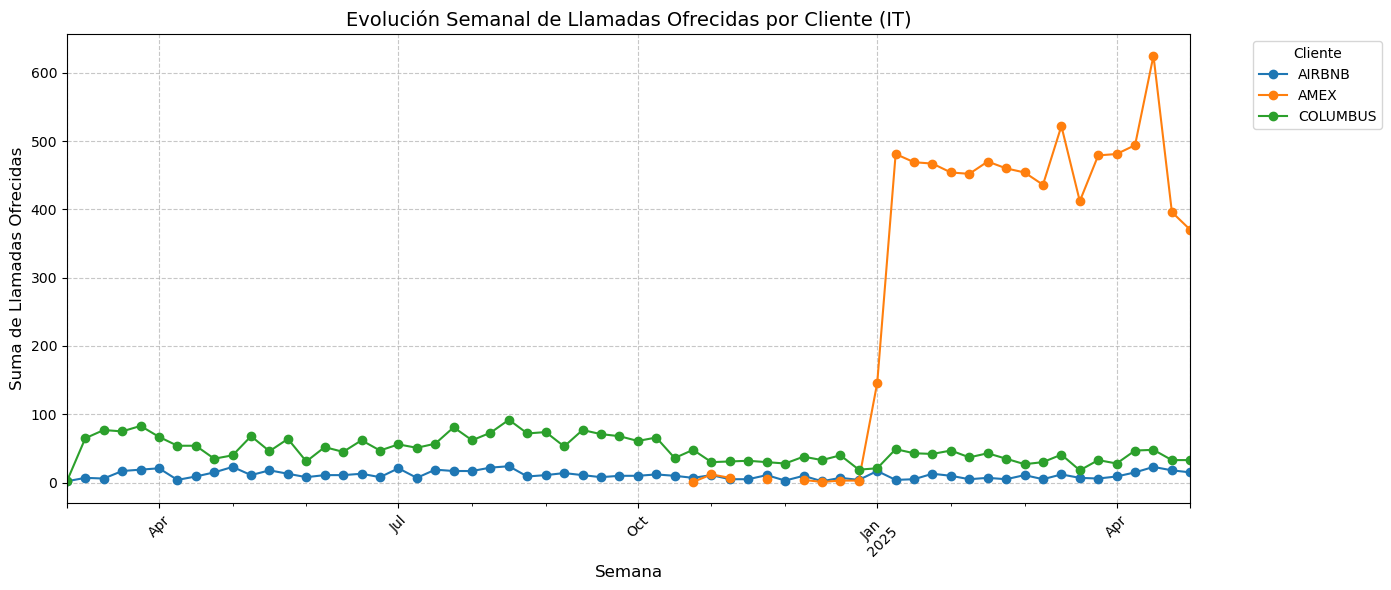

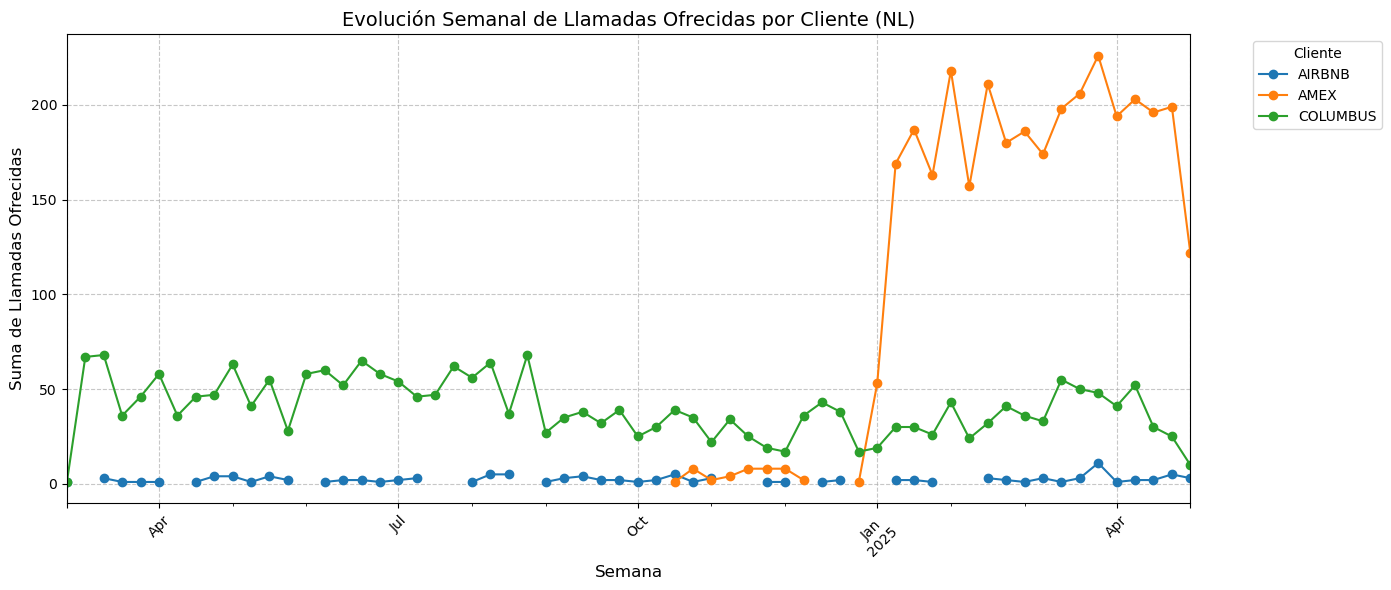

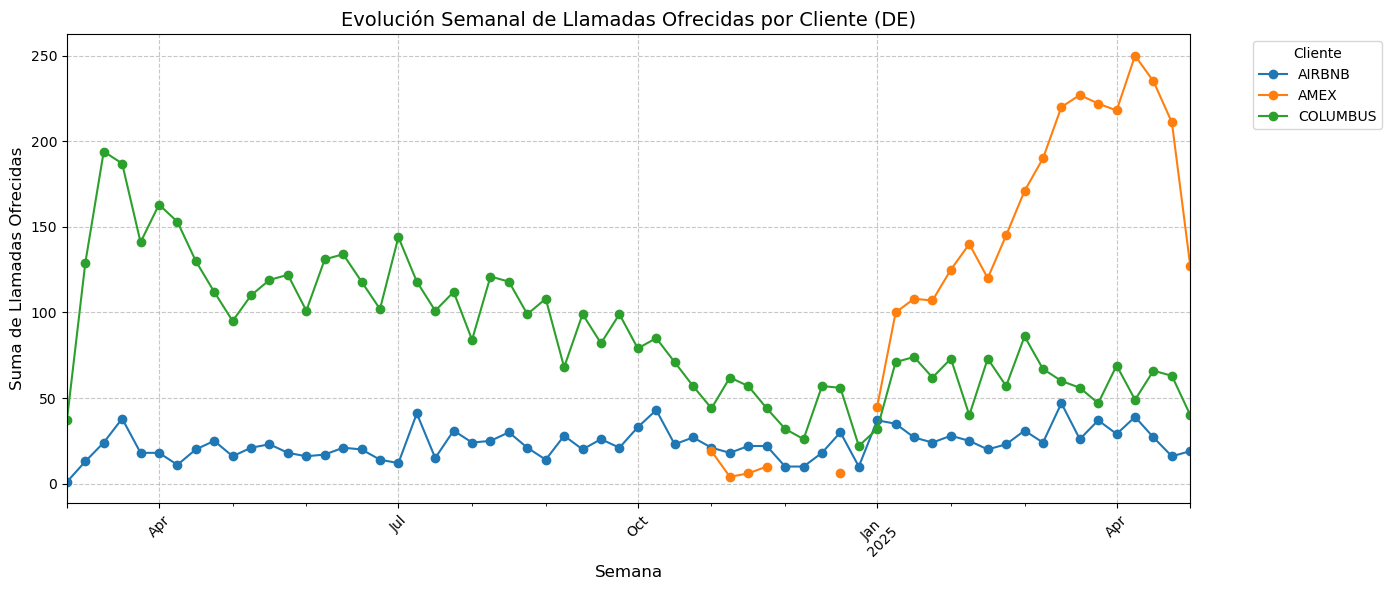

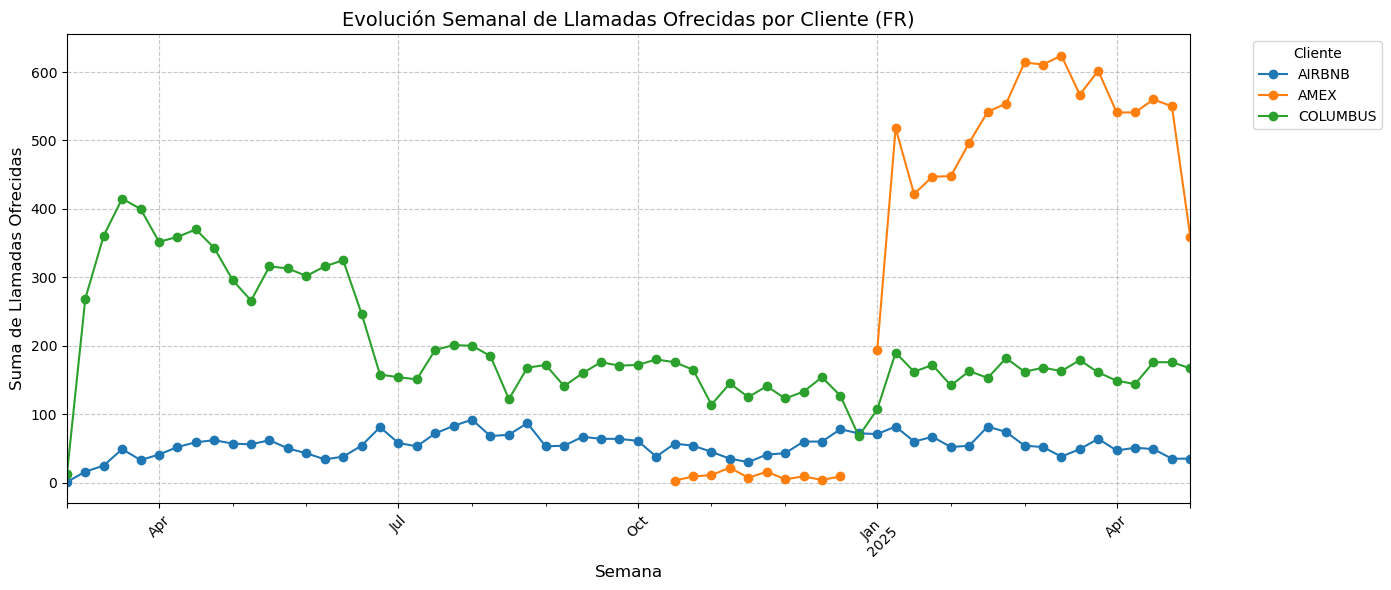

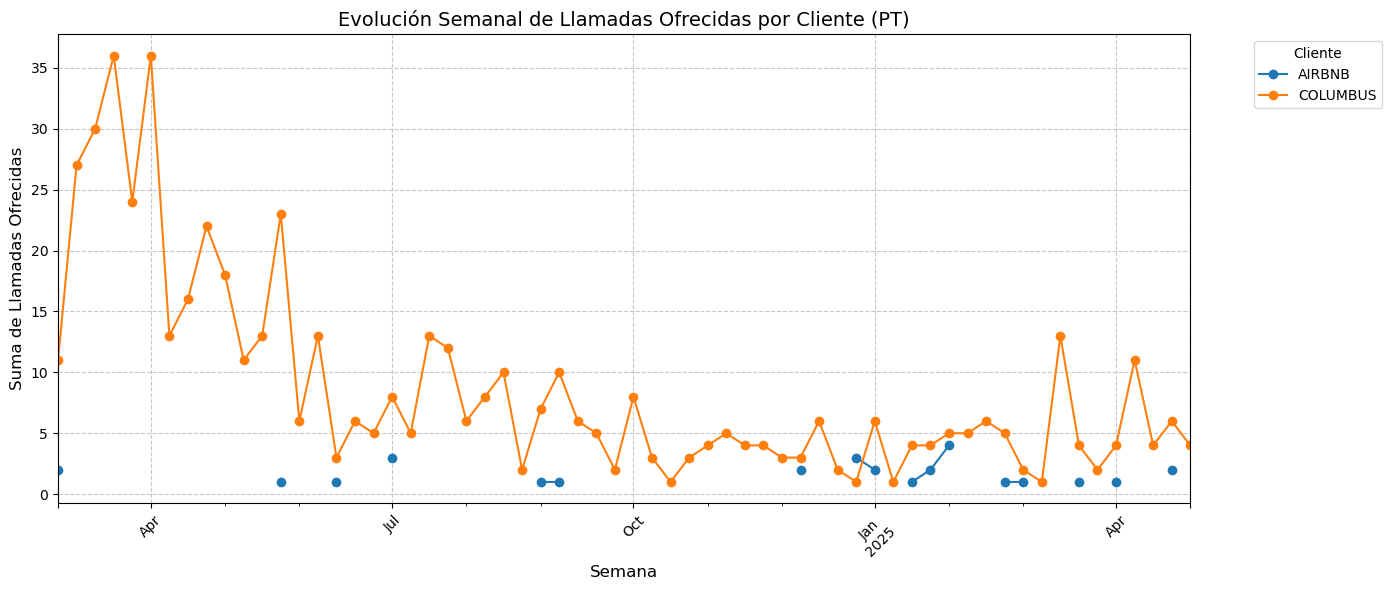

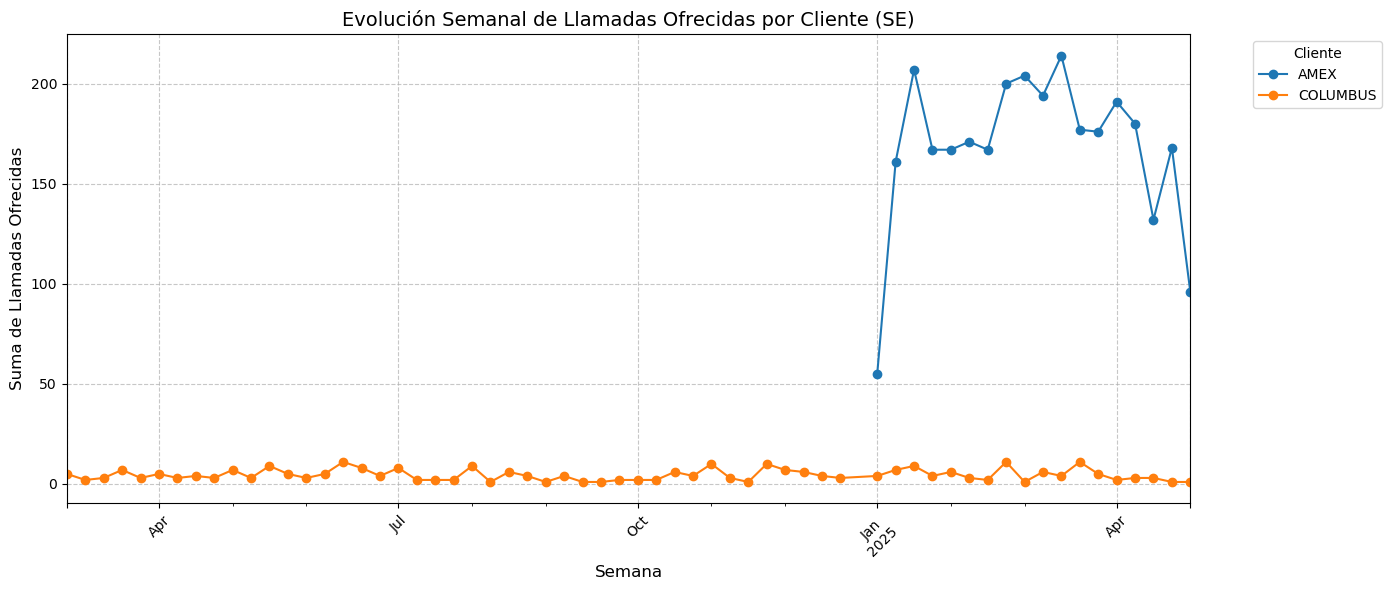

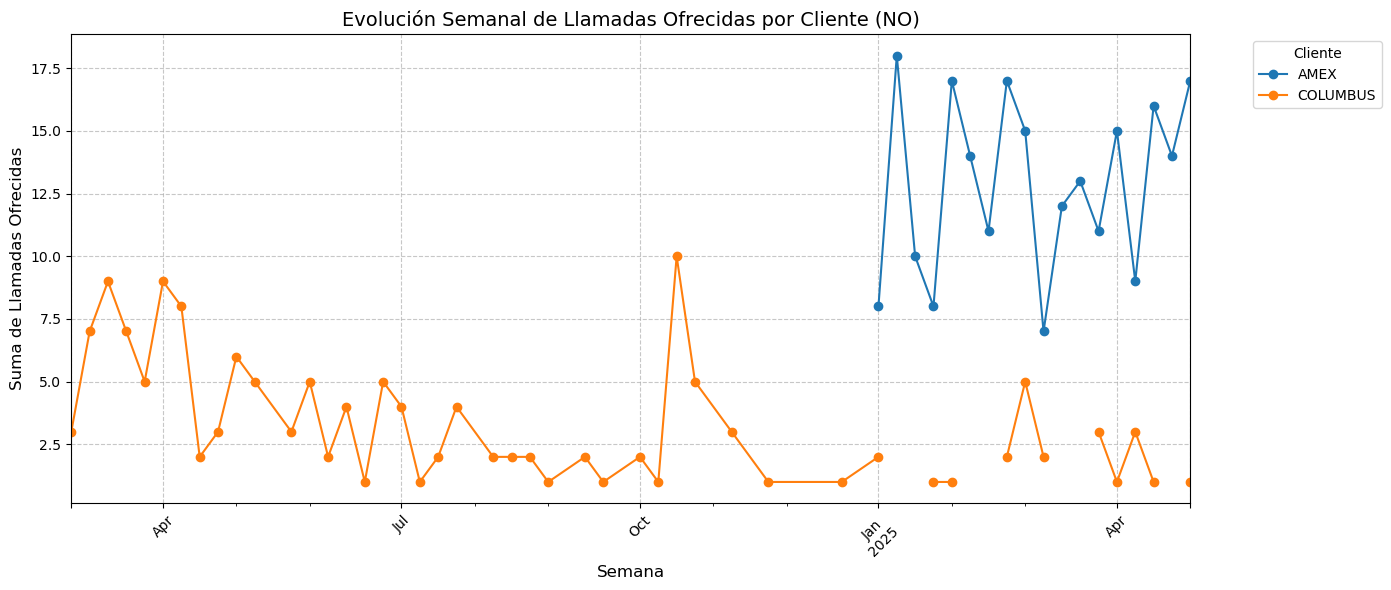

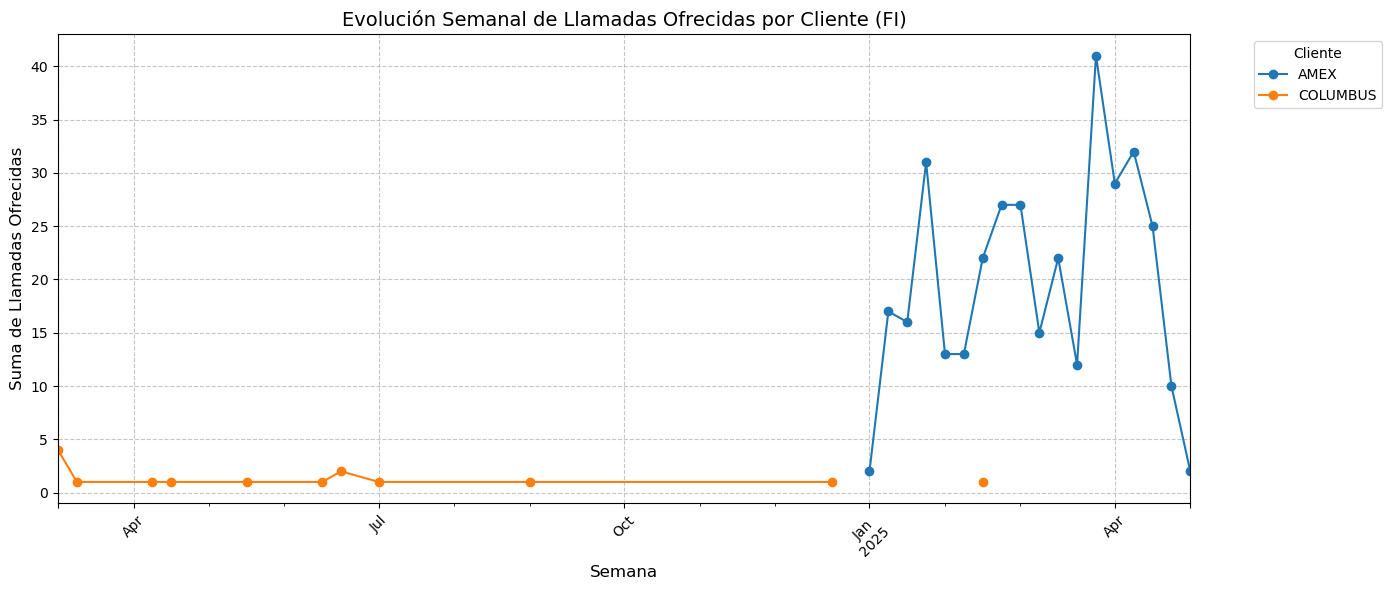

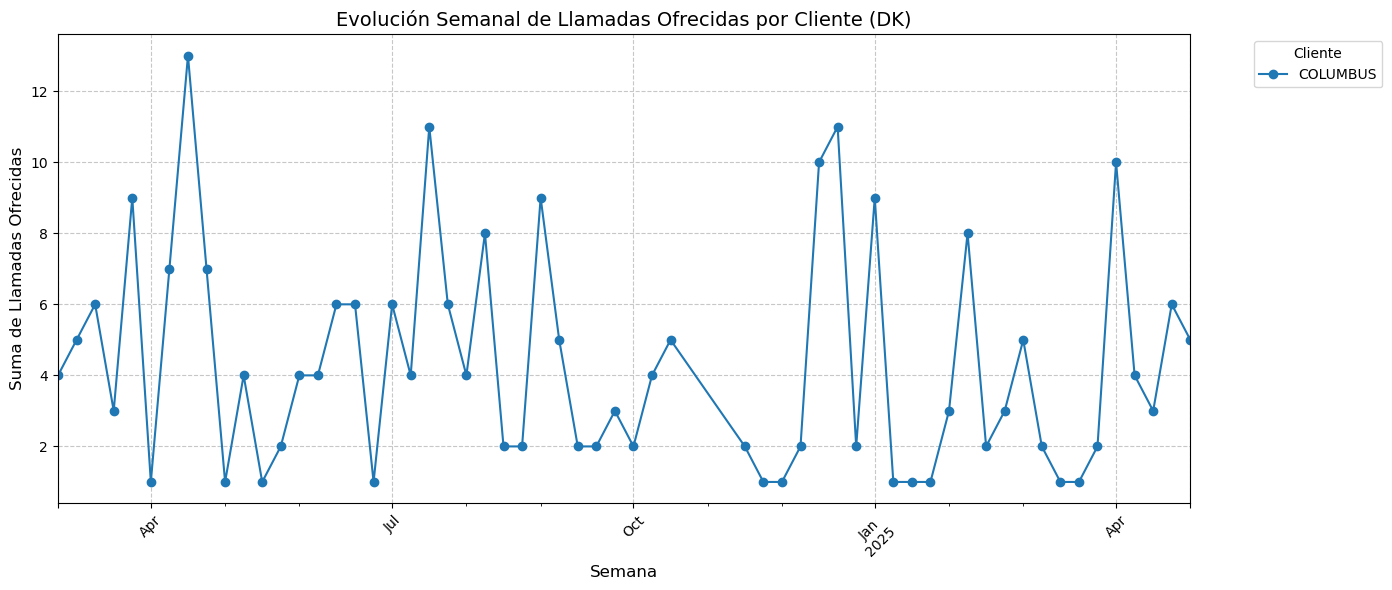

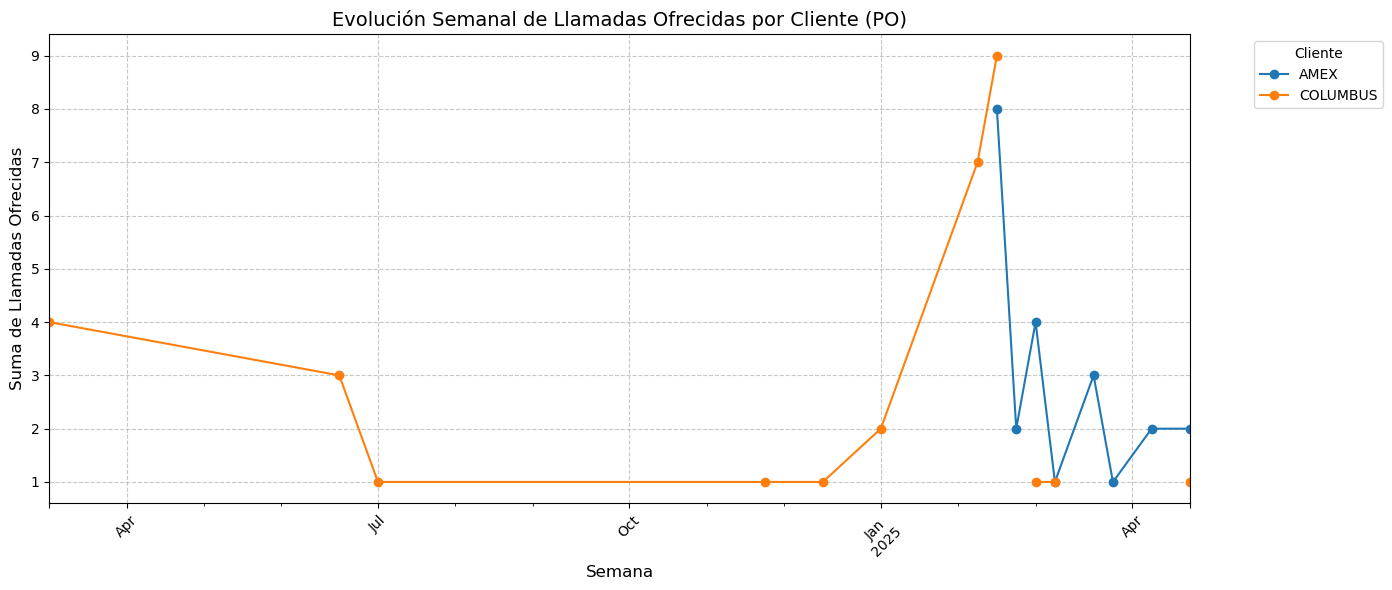

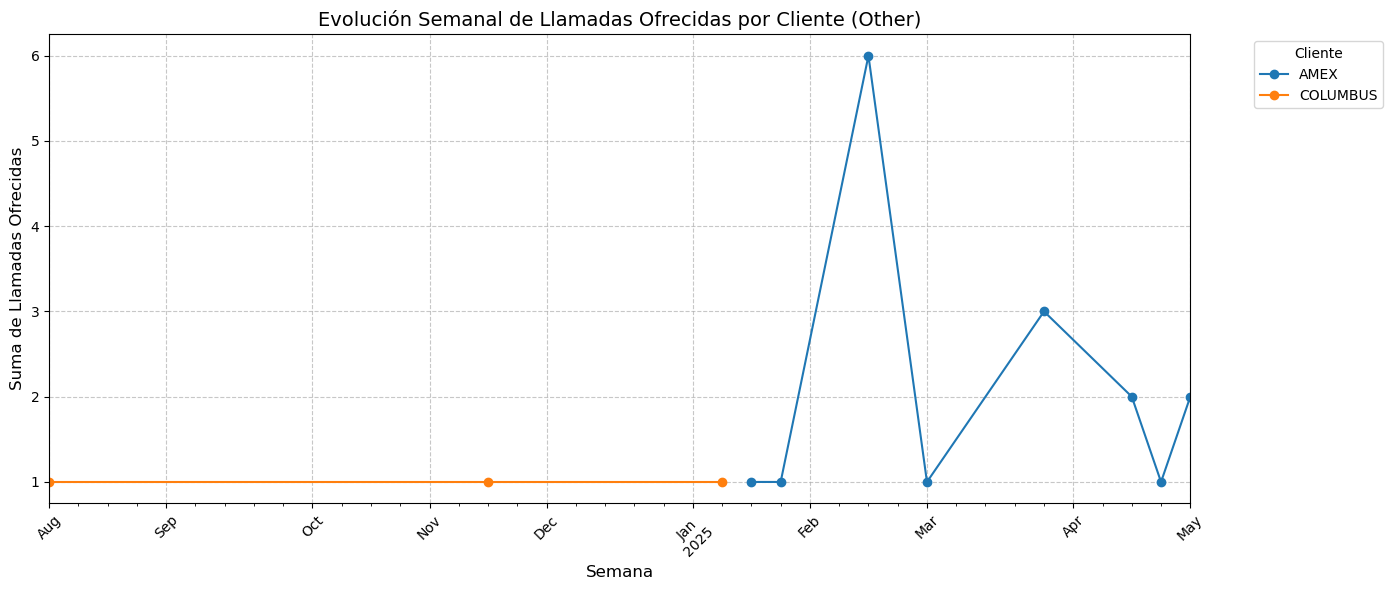

In [21]:
# Crear columna de semana
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')

# Agrupar por semana, idioma y cliente
df_semana = df.groupby(['Semana', 'idioma', 'cliente'])['Offered'].sum().reset_index()

# Obtener la lista de idiomas únicos
idiomas = df['idioma'].unique()

# Crear gráficos separados para cada idioma
for idioma in idiomas:
    plt.figure(figsize=(14, 6))
    df_idioma = df_semana[df_semana['idioma'] == idioma]  # Filtrar por idioma
    df_idioma_pivot = df_idioma.pivot(index='Semana', columns='cliente', values='Offered')  # Pivotear datos
    
    # Graficar evolución semanal por cliente
    df_idioma_pivot.plot(ax=plt.gca(), marker='o')
    plt.title(f'Evolución Semanal de Llamadas Ofrecidas por Cliente ({idioma})', fontsize=14)
    plt.xlabel('Semana', fontsize=12)
    plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


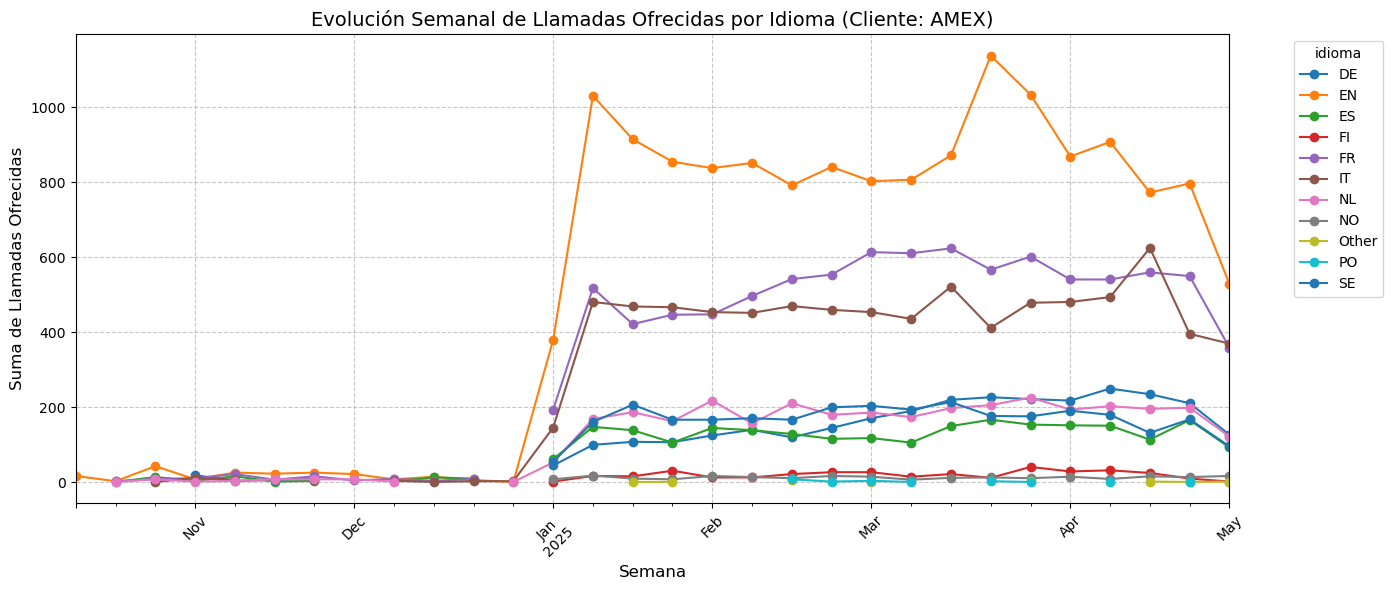

In [22]:
# Crear columna de semana
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')

# Filtrar los datos para el cliente AMEX
df_amex = df[df['cliente'] == 'AMEX']

# Agrupar por semana e idioma para el cliente AMEX
df_amex_semana = df_amex.groupby(['Semana', 'idioma'])['Offered'].sum().unstack()

# Gráfico de evolución semanal para AMEX por idioma
plt.figure(figsize=(14, 6))
df_amex_semana.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Semanal de Llamadas Ofrecidas por Idioma (Cliente: AMEX)', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

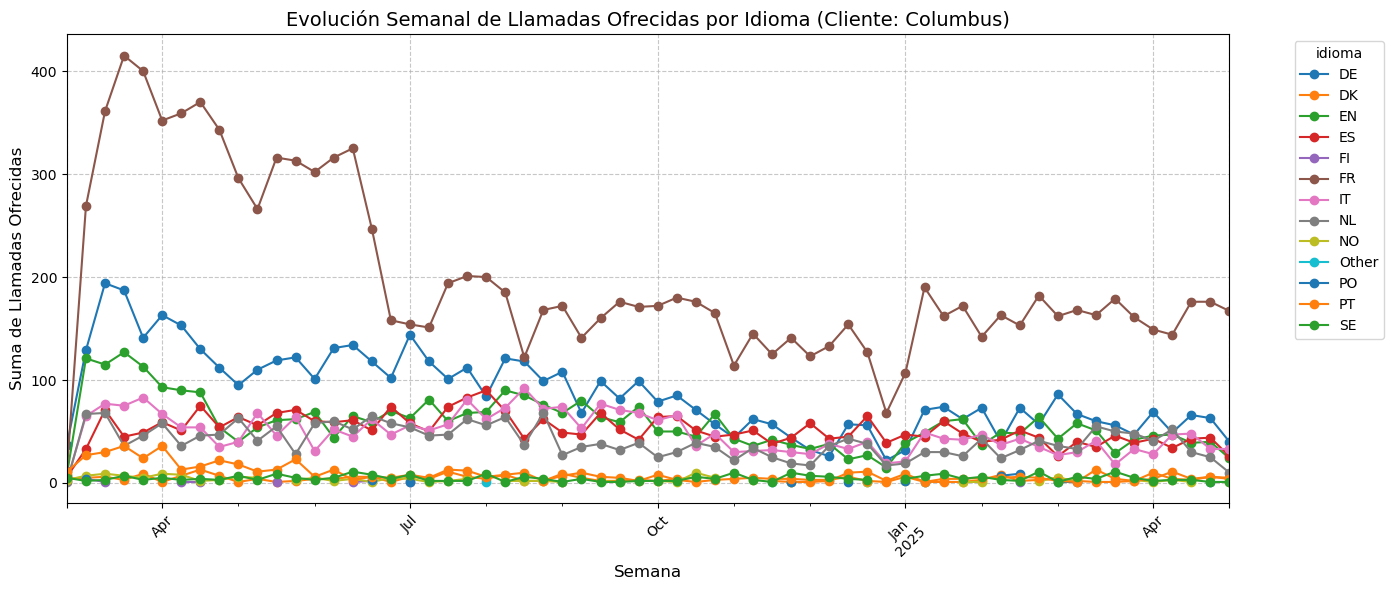

In [23]:
# Crear columna de semana
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')

# Filtrar los datos para el cliente AMEX
df_amex = df[df['cliente'] == 'COLUMBUS']

# Agrupar por semana e idioma para el cliente AMEX
df_amex_semana = df_amex.groupby(['Semana', 'idioma'])['Offered'].sum().unstack()

# Gráfico de evolución semanal para AMEX por idioma
plt.figure(figsize=(14, 6))
df_amex_semana.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Semanal de Llamadas Ofrecidas por Idioma (Cliente: Columbus)', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

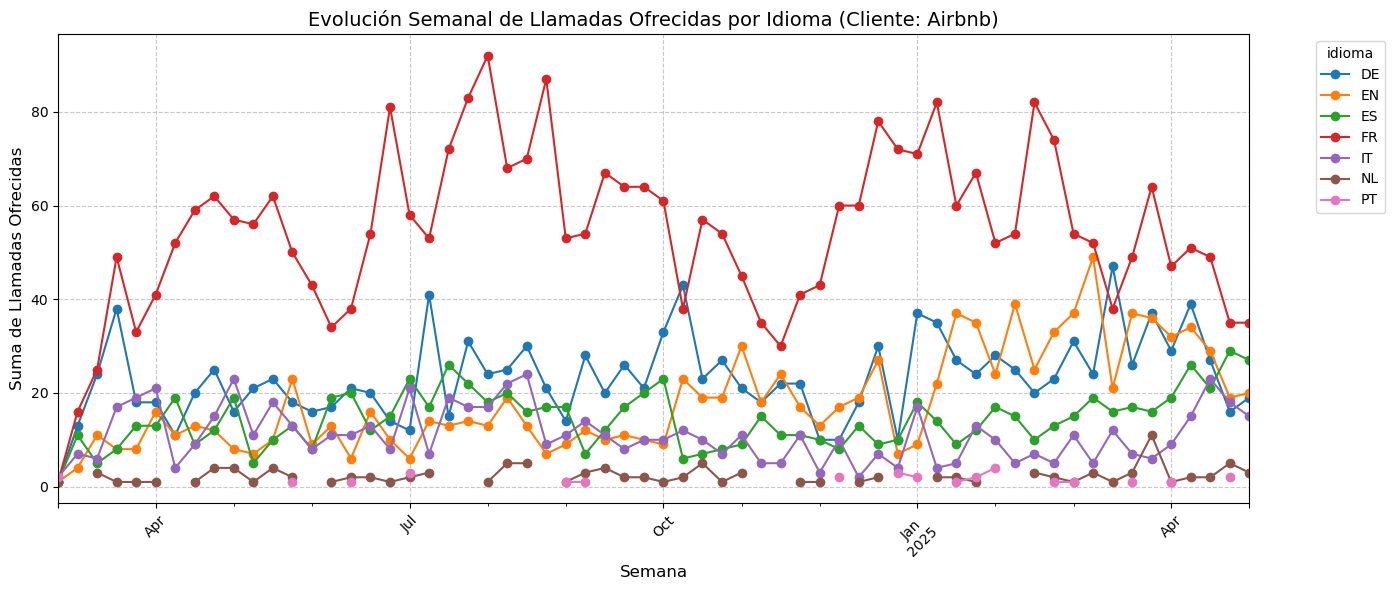

In [24]:
# Crear columna de semana
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')

# Filtrar los datos para el cliente AMEX
df_amex = df[df['cliente'] == 'AIRBNB']

# Agrupar por semana e idioma para el cliente AMEX
df_amex_semana = df_amex.groupby(['Semana', 'idioma'])['Offered'].sum().unstack()

# Gráfico de evolución semanal para AMEX por idioma
plt.figure(figsize=(14, 6))
df_amex_semana.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Semanal de Llamadas Ofrecidas por Idioma (Cliente: Airbnb)', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

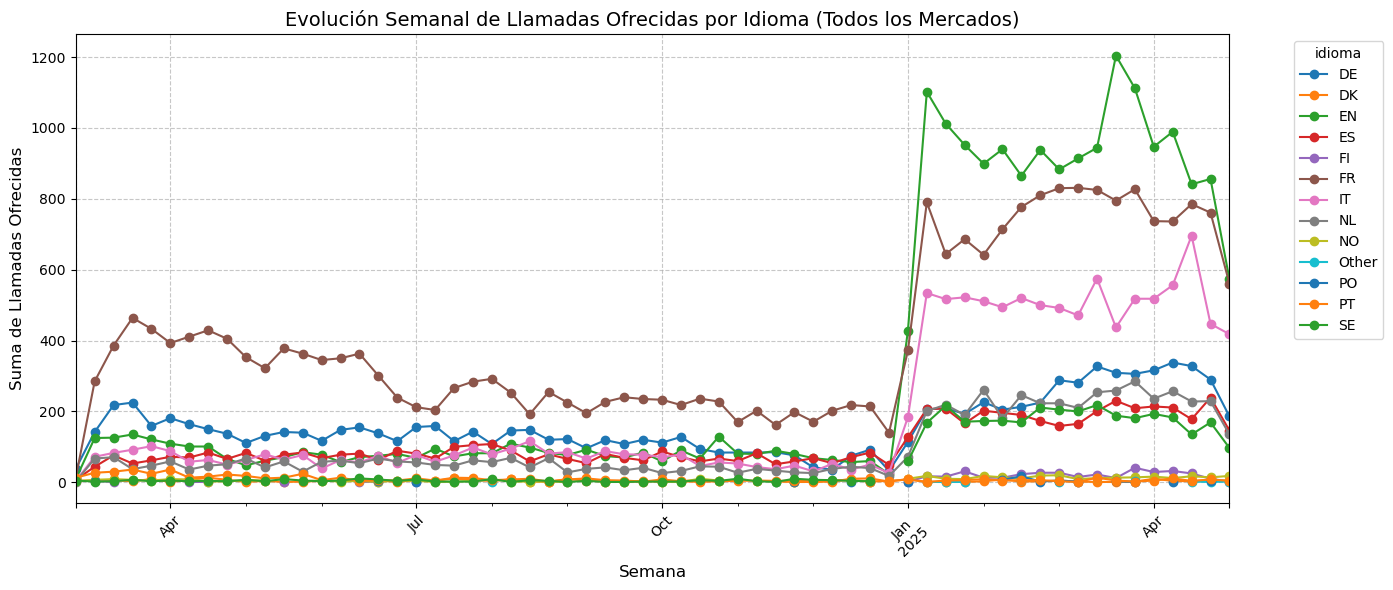

In [25]:
# Crear columna de semana
df['Semana'] = pd.to_datetime(df['Fecha']).dt.to_period('W')

# Agrupar por semana e idioma
df_semana_idioma = df.groupby(['Semana', 'idioma'])['Offered'].sum().unstack()

# Gráfico de evolución semanal por idioma
plt.figure(figsize=(14, 6))
df_semana_idioma.plot(ax=plt.gca(), marker='o')
plt.title('Evolución Semanal de Llamadas Ofrecidas por Idioma (Todos los Mercados)', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Suma de Llamadas Ofrecidas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Analisis de series temporales

##### Separamos la data en los 3 los clientes principales, dado que es muy dispar el volumen entre ellas

- Airbnb
- Columbus
- Amex



## Analisis AIRBNB
#### Series temporales - SARIMA

In [26]:
import pandas as pd

# Leer archivo
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')

# Filtrar solo AIRBNB
df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB'].copy()

# Asegurar formato datetime
df_airbnb['date_time'] = pd.to_datetime(df_airbnb['date_time'])

# Filtrar lunes a viernes de 9:00 a 17:59
df_airbnb['weekday'] = df_airbnb['date_time'].dt.weekday
df_airbnb['hour'] = df_airbnb['date_time'].dt.hour
df_airbnb_limpio = df_airbnb[
    (df_airbnb['weekday'] <= 4) &
    (df_airbnb['hour'] >= 9) &
    (df_airbnb['hour'] < 18)
].copy()

# Crear columna 'fecha' truncando a día
df_airbnb_limpio['fecha'] = df_airbnb_limpio['date_time'].dt.floor('D')

# Agrupar por día
serie_airbnb = df_airbnb_limpio.groupby('fecha')['Offered'].sum()

# Convertir a serie temporal con frecuencia diaria explícita
serie_airbnb = serie_airbnb.asfreq('D').fillna(0)




In [27]:
df_airbnb_limpio.shape

df.head(5)

conversation_id   cliente idioma      queue_name  \
0  00016c9a-59e4-459f-a935-d910388bf4f2      AMEX     ES  COL_AMX_CS_ESP   
1  00018279-8f9d-4373-8be5-82c7a01c27f4      AMEX     EN  COL_AMX_CS_ENG   
2  000282e3-a4bc-4b97-9293-28d9247684aa    AIRBNB     ES      AirBnB_ESP   
3  0002b0e9-d322-4156-bbc8-c89c9805508d      AMEX     EN  COL_AMX_CS_ENG   
4  0002e9e3-6b24-426d-bb8a-8f477b1e4ea3  COLUMBUS     IT    Columbus_ITA   

         weekday           date_time  Offered  Answered  \
0     5 - Friday 2025-04-04 11:15:00        1         1   
1    2 - Tuesday 2025-04-01 11:30:00        1         1   
2   4 - Thursday 2024-12-05 15:00:00        1         1   
3     1 - Monday 2025-02-03 14:45:00        1         1   
4  3 - Wednesday 2025-03-26 10:15:00        1         1   

   Service Level % 30 sec  % Abandon                     AHT  \
0                     1.0         0.0 0 days 00:07:22.881000   
1                     1.0         0.0 0 days 00:07:00.728000   
2                     1.0         0.0 0 days 00:05:00.119000   
3                     1.0         0.0 0 days 00:05:18.136000   
4                     0.0         0.0 0 days 00:06:11.451000   

              Talk (Avg)             hold (Avg)                    ACW  \
0 0 days 00:05:06.714000 0 days 00:01:36.167000        0 days 00:00:40   
1 0 days 00:06:20.728000                    NaT        0 days 00:00:40   
2 0 days 00:04:00.847000                    NaT 0 days 00:00:59.272000   
3 0 days 00:03:48.136000                    NaT        0 days 00:01:30   
4 0 days 00:05:04.951000                    NaT 0 days 00:01:06.500000   

        Fecha      Hora      Mes                 Semana  
0  2025-04-04  11:15:00  2025-04  2025-03-31/2025-04-06  
1  2025-04-01  11:30:00  2025-04  2025-03-31/2025-04-06  
2  2024-12-05  15:00:00  2024-12  2024-12-02/2024-12-08  
3  2025-02-03  14:45:00  2025-02  2025-02-03/2025-02-09  
4  2025-03-26  10:15:00  2025-03  2025-03-24/2025-03-30

<Figure size 2400x10000 with 0 Axes>

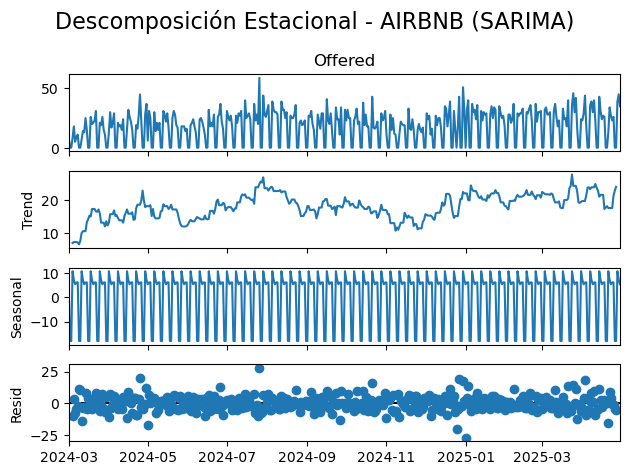

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición estacional con periodo semanal
decomposition = seasonal_decompose(serie_airbnb, model='additive', period=7)

# Visualización de los componentes
plt.figure(figsize=(24, 100))
decomposition.plot()
plt.suptitle('Descomposición Estacional - AIRBNB (SARIMA)', fontsize=16)
plt.tight_layout()
plt.show()


In [29]:
# analisis de outliers
# Calcular límites superior e inferior usando IQR
q1 = serie_airbnb.quantile(0.25)
q3 = serie_airbnb.quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Detectar outliers
outliers = serie_airbnb[(serie_airbnb < limite_inferior) | (serie_airbnb > limite_superior)]
print(f"Número de outliers detectados: {len(outliers)}")


Número de outliers detectados: 0


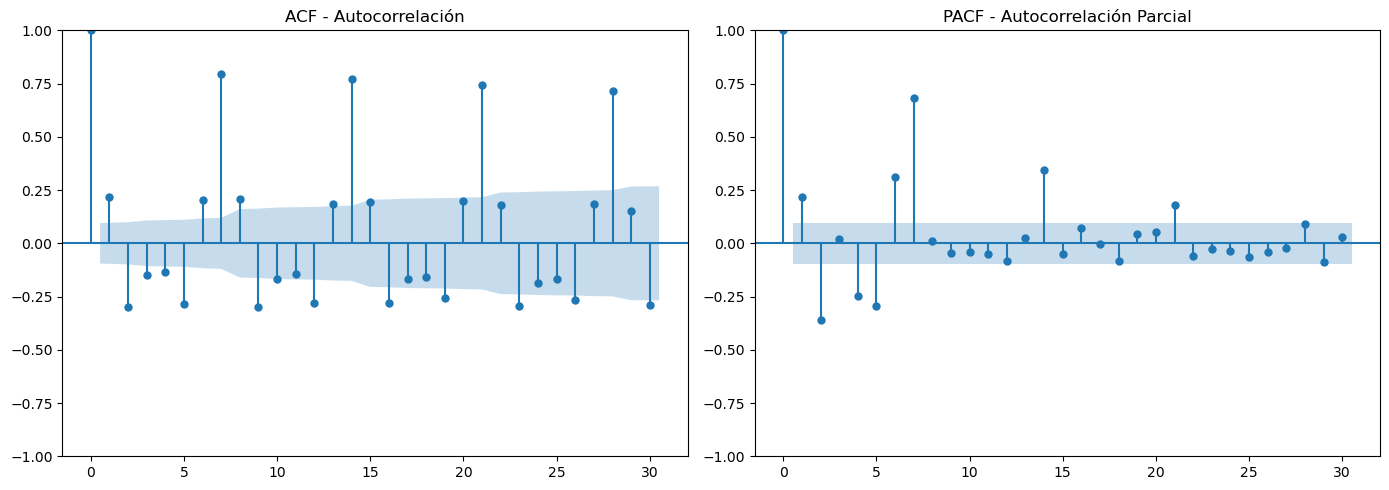

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Graficar ACF y PACF para determinar parámetros SARIMA
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(serie_airbnb, lags=30, ax=plt.gca())
plt.title('ACF - Autocorrelación')

plt.subplot(1, 2, 2)
plot_pacf(serie_airbnb, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF - Autocorrelación Parcial')

plt.tight_layout()
plt.show()


Las barras están todas dentro de la franja azul, lo que significa que no hay autocorrelación significativa en los residuos.
Esto es un excelente indicador: el modelo ha capturado la estructura temporal relevante.
Los residuos se comportan como ruido blanco, lo ideal para un modelo bien ajustado.
✅ Conclusión:
El modelo actual está estadísticamente bien especificado. No hay señales de mejora inmediata solo por la estructura de los residuos.

In [31]:
#A partir de los gráficos ACF y PACF, y la estacionalidad semanal detectada, empezaremos con algo conservador:

(p, d, q) = (1, 1, 1)  
(P, D, Q, s) = (1, 1, 1, 7)


🔢 1. Parte no estacional → (p, d, q)
Estos son los parámetros clásicos de ARIMA:

Parámetro	Significado
p	Número de términos autorregresivos (AR)
d	Número de veces que se debe diferenciar la serie para hacerla estacionaria
q	Número de términos de media móvil (MA)

En tu caso: (1, 1, 1)
p=1: el valor actual depende del valor anterior (t-1).

d=1: se usa la diferencia entre días para eliminar tendencia.

q=1: el valor actual también depende del error del día anterior.

🌀 2. Parte estacional → (P, D, Q, s)
Esto modela la estacionalidad, repitiéndose cada s pasos (por ejemplo, 7 días = semanal).

Parámetro	Significado
P	Términos autorregresivos estacionales (AR)
D	Diferencias estacionales para hacer la serie estacionaria en ciclos
Q	Términos de media móvil estacional (MA)
s	Periodicidad del ciclo estacional

En tu caso: (1, 1, 1, 7)
P=1: comportamiento semanal dependiente del valor de hace 7 días.

D=1: se aplica diferencia cada 7 días para remover estacionalidad.

Q=1: el error actual depende del error de hace 7 días.

s=7: estacionalidad semanal (cada 7 días)

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA
modelo = SARIMAX(serie_airbnb,
                 order=(1, 1, 1),
                 seasonal_order=(1, 1, 1, 7),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Mostrar resumen del modelo
print(resultado.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           Offered   No. Observations:                  426
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1359.255
Date:                           Sun, 18 May 2025   AIC                           2728.510
Time:                                   15:16:10   BIC                           2748.578
Sample:                               03-01-2024   HQIC                          2736.450
                                    - 04-30-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0059      0.052     -0.113      0.910      -0.107       0.095
ma.L1         -0.9364      0.021    -45.495

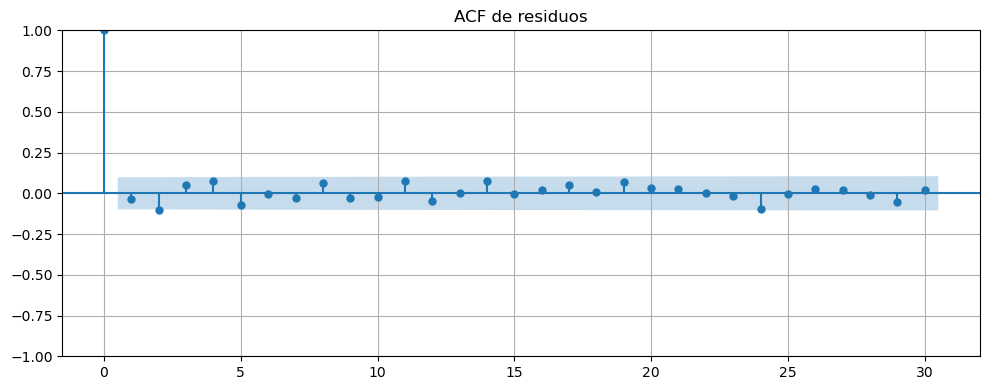

In [41]:
#analisis de residuos
residuos = resultado_april.resid

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plot_acf(residuos.dropna(), lags=30, ax=plt.gca())
plt.title("ACF de residuos")
plt.grid(True)
plt.tight_layout()
plt.show()


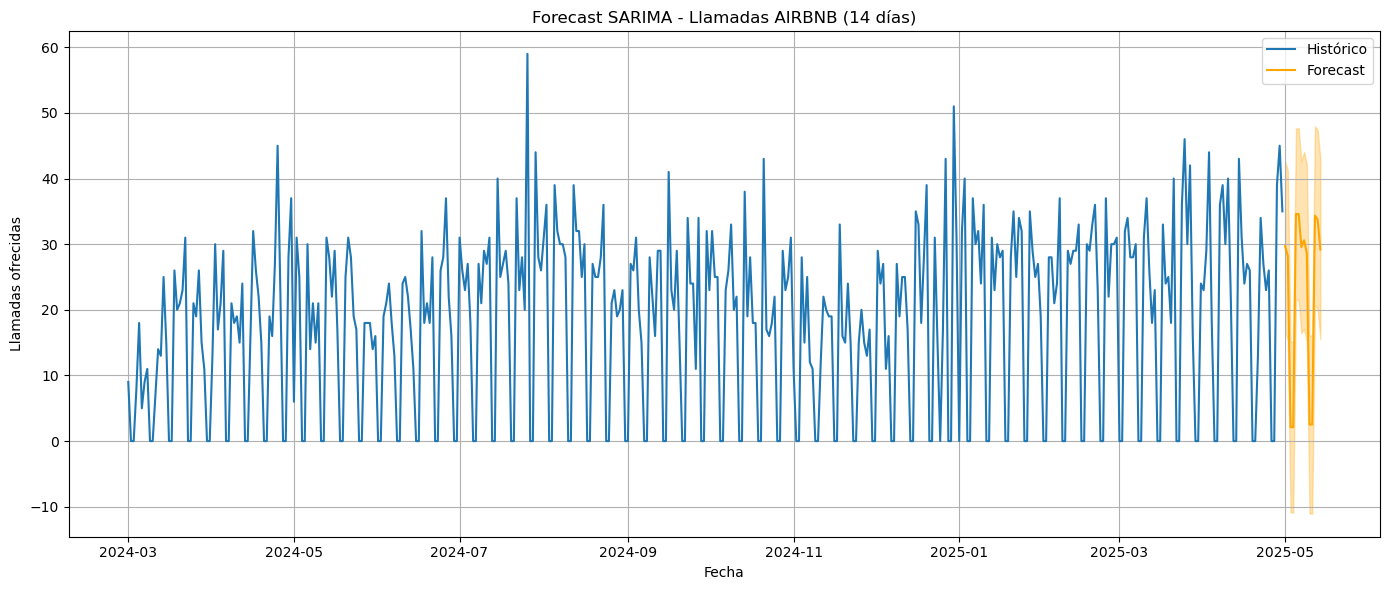

In [34]:
# Número de días a predecir
n_dias = 14

# Forecast
forecast = resultado.get_forecast(steps=n_dias)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualizar
plt.figure(figsize=(14, 6))
plt.plot(serie_airbnb, label='Histórico')
plt.plot(pred.index, pred, label='Forecast', color='orange')
plt.fill_between(pred.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='orange', alpha=0.3)
plt.title('Forecast SARIMA - Llamadas AIRBNB (14 días)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


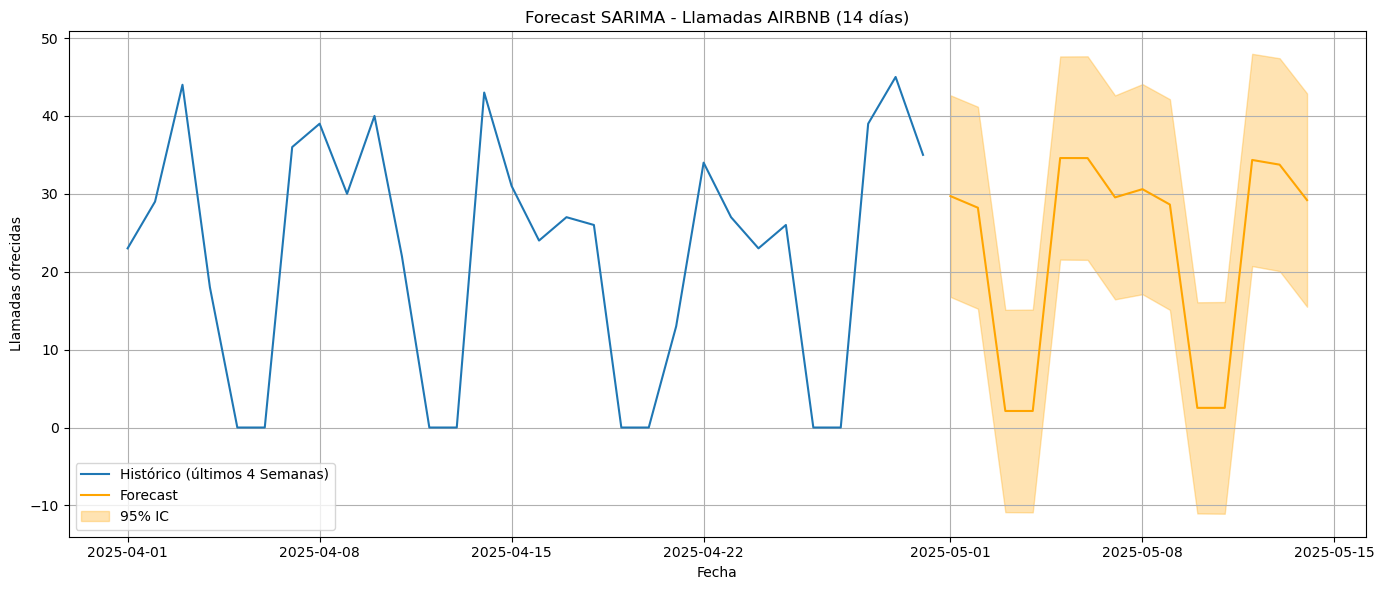

In [36]:
# Forecast con intervalo explícito al 95 % (default)
forecast = resultado.get_forecast(steps=n_dias)
pred = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)  # 0.05 = 95% confidence

# Cortar la serie histórica (últimos 4 Semanas)
historico_reciente = serie_airbnb[serie_airbnb.index >= pd.to_datetime(pred.index[0]) - pd.DateOffset(months=1)]

# Visualización
plt.figure(figsize=(14, 6))
plt.plot(historico_reciente, label='Histórico (últimos 4 Semanas)')
plt.plot(pred.index, pred, label='Forecast', color='orange')
plt.fill_between(pred.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast SARIMA - Llamadas AIRBNB (14 días)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



MAE abril 2025: 5.48
RMSE abril 2025: 7.30


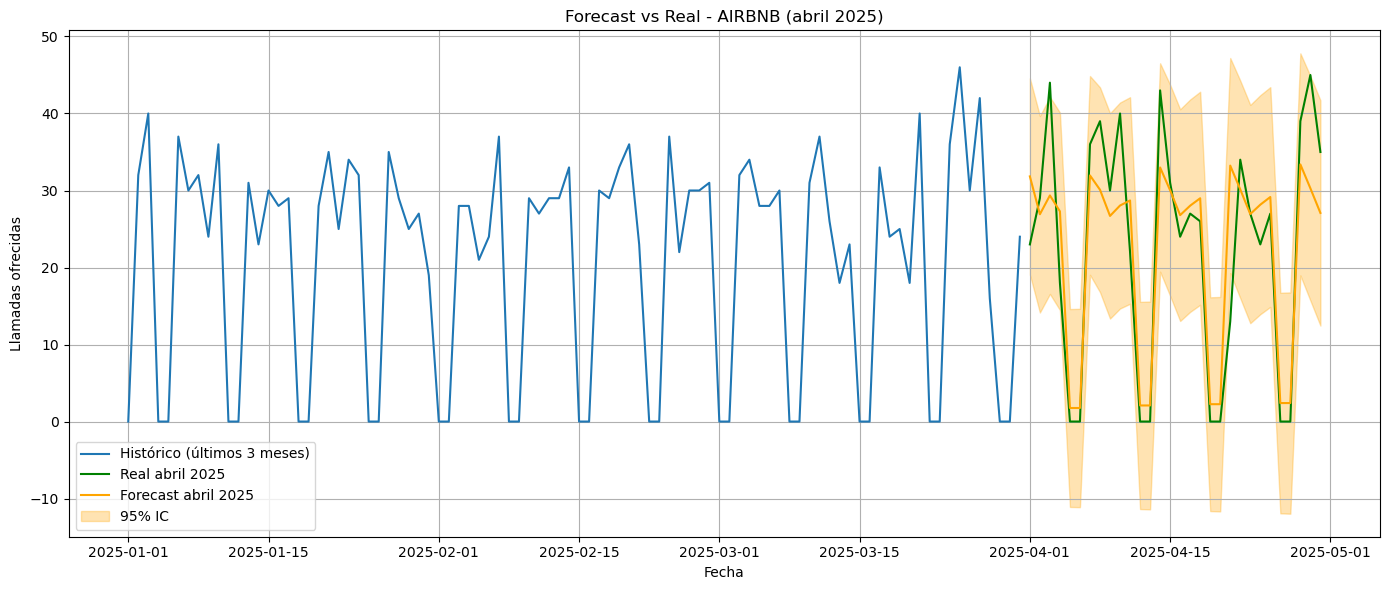

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB']
serie_airbnb = df_airbnb.groupby(df_airbnb['date_time'].dt.date)['Offered'].sum()
serie_airbnb = serie_airbnb.asfreq('D').fillna(0)
serie_airbnb.index = pd.to_datetime(serie_airbnb.index)

# 2. Dividir en entrenamiento y test
train_full = serie_airbnb[serie_airbnb.index <= '2025-03-31']
test_abril = serie_airbnb[(serie_airbnb.index >= '2025-04-01') & (serie_airbnb.index <= '2025-04-30')]

# 3. Ajustar modelo SARIMA
modelo_april = SARIMAX(train_full,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
resultado_april = modelo_april.fit(disp=False)

# 4. Forecast para abril
forecast_april = resultado_april.get_forecast(steps=len(test_abril))
pred_april = forecast_april.predicted_mean
conf_int_april = forecast_april.conf_int()

# 5. Evaluación
mae_april = mean_absolute_error(test_abril, pred_april)
rmse_april = np.sqrt(mean_squared_error(test_abril, pred_april))
print(f"MAE abril 2025: {mae_april:.2f}")
print(f"RMSE abril 2025: {rmse_april:.2f}")

# 6. Visualización
plt.figure(figsize=(14, 6))
plt.plot(train_full[-90:], label='Histórico (últimos 3 meses)')
plt.plot(test_abril.index, test_abril, label='Real abril 2025', color='green')
plt.plot(pred_april.index, pred_april, label='Forecast abril 2025', color='orange')
plt.fill_between(pred_april.index,
                 conf_int_april.iloc[:, 0],
                 conf_int_april.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast vs Real - AIRBNB (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Estadísticas básicas del conjunto de test (abril 2025)
print("Estadísticas de llamadas ofrecidas en abril 2025:")
print(f"📈 Máximo:  {test_abril.max()}")
print(f"📉 Mínimo:  {test_abril.min()}")
print(f"📊 Promedio: {test_abril.mean():.2f}")

# Evaluación del modelo
mae_april = mean_absolute_error(test_abril, pred_april)
rmse_april = np.sqrt(mean_squared_error(test_abril, pred_april))

# MAPE seguro (evita división por cero)
test_safe = test_abril.copy()
test_safe[test_safe == 0] = np.nan  # evitar división por cero
mape_april = np.mean(np.abs((test_abril - pred_april) / test_safe)) * 100

print(f"📉 MAPE abril 2025: {mape_april:.2f}%")
print(f"📊 MAE abril 2025: {mae_april:.2f}")
print(f"📈 RMSE abril 2025: {rmse_april:.2f}")


Estadísticas de llamadas ofrecidas en abril 2025:
📈 Máximo:  45.0
📉 Mínimo:  0.0
📊 Promedio: 22.50
📉 MAPE abril 2025: 25.30%
📊 MAE abril 2025: 5.48
📈 RMSE abril 2025: 7.30


📌 Interpretación:
En promedio, el modelo se equivoca por unas 5–8 llamadas por día, lo cual puede ser bastante aceptable dependiendo del volumen total diario.

Si hay días con picos grandes o fines de semana con poco tráfico, esto puede influir en el error.

MAE abril 2025: 5.46
RMSE abril 2025: 7.29


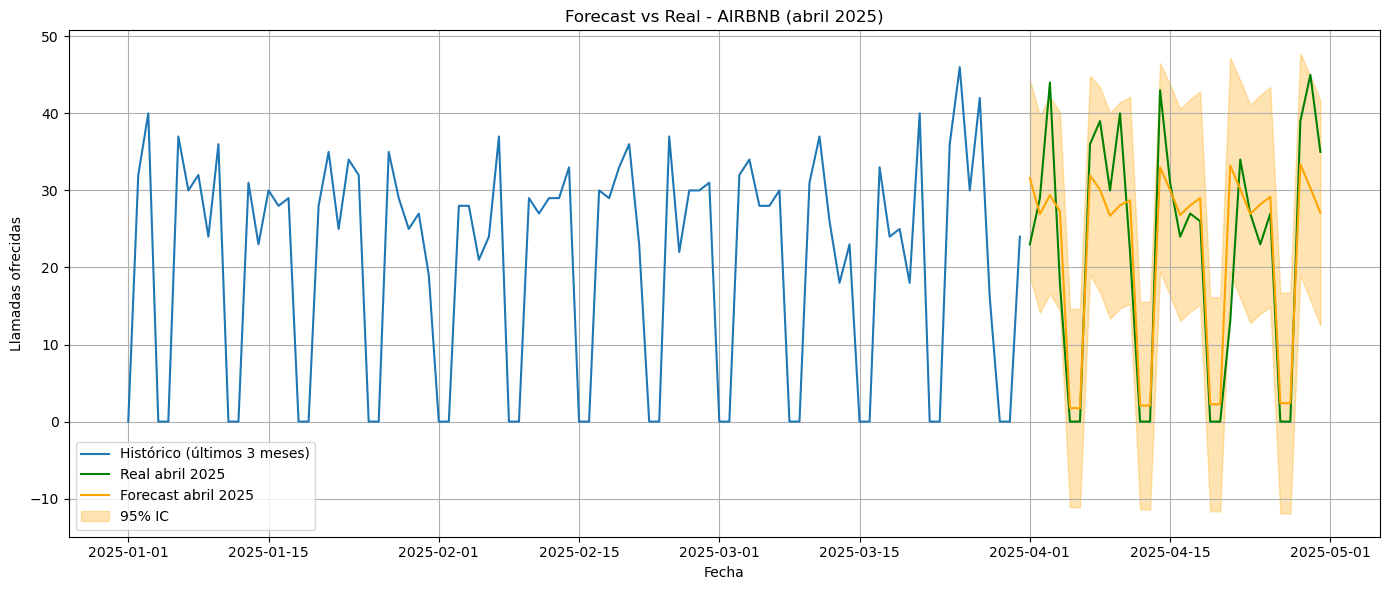

In [40]:
# cambios de parametros
# Ajustar el modelo SARIMA con nuevos parámetros


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB']
serie_airbnb = df_airbnb.groupby(df_airbnb['date_time'].dt.date)['Offered'].sum()
serie_airbnb = serie_airbnb.asfreq('D').fillna(0)
serie_airbnb.index = pd.to_datetime(serie_airbnb.index)

# 2. Dividir en entrenamiento y test
train_full = serie_airbnb[serie_airbnb.index <= '2025-03-31']
test_abril = serie_airbnb[(serie_airbnb.index >= '2025-04-01') & (serie_airbnb.index <= '2025-04-30')]

# 3. Ajustar modelo SARIMA
modelo_april = SARIMAX(train_full,
                       order=(0, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
resultado_april = modelo_april.fit(disp=False)

# 4. Forecast para abril
forecast_april = resultado_april.get_forecast(steps=len(test_abril))
pred_april = forecast_april.predicted_mean
conf_int_april = forecast_april.conf_int()

# 5. Evaluación
mae_april = mean_absolute_error(test_abril, pred_april)
rmse_april = np.sqrt(mean_squared_error(test_abril, pred_april))
print(f"MAE abril 2025: {mae_april:.2f}")
print(f"RMSE abril 2025: {rmse_april:.2f}")

# 6. Visualización
plt.figure(figsize=(14, 6))
plt.plot(train_full[-90:], label='Histórico (últimos 3 meses)')
plt.plot(test_abril.index, test_abril, label='Real abril 2025', color='green')
plt.plot(pred_april.index, pred_april, label='Forecast abril 2025', color='orange')
plt.fill_between(pred_april.index,
                 conf_int_april.iloc[:, 0],
                 conf_int_april.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast vs Real - AIRBNB (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### MONTECARLO


In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Preparar datos ---
# Asegúrate de tener 'serie_airbnb' con fechas en formato datetime
train_mc = serie_airbnb[serie_airbnb.index <= '2025-03-31']
test_mc = serie_airbnb[(serie_airbnb.index >= '2025-04-01') & (serie_airbnb.index <= '2025-04-30')]

# --- Calcular deltas diarios ---
deltas_mc = train_mc.diff().dropna()
ultimo_valor_mc = train_mc.iloc[-1]

# --- Simular trayectorias Monte Carlo ---
n_simulaciones = 10000
n_dias = len(test_mc)
simulaciones_mc = np.zeros((n_dias, n_simulaciones))

for i in range(n_simulaciones):
    cambios_simulados = np.random.choice(deltas_mc, size=n_dias)
    simulaciones_mc[:, i] = np.cumsum(cambios_simulados) + ultimo_valor_mc

# --- Calcular percentiles ---
p5_mc = np.percentile(simulaciones_mc, 5, axis=1)
p50_mc = np.percentile(simulaciones_mc, 50, axis=1)
p95_mc = np.percentile(simulaciones_mc, 95, axis=1)

# --- Evaluar forecast usando P50 ---
mae_mc = mean_absolute_error(test_mc, p50_mc)
rmse_mc = np.sqrt(mean_squared_error(test_mc, p50_mc))

print(f"Monte Carlo - MAE: {mae_mc:.2f}")
print(f"Monte Carlo - RMSE: {rmse_mc:.2f}")


Monte Carlo - MAE: 12.92
Monte Carlo - RMSE: 15.65


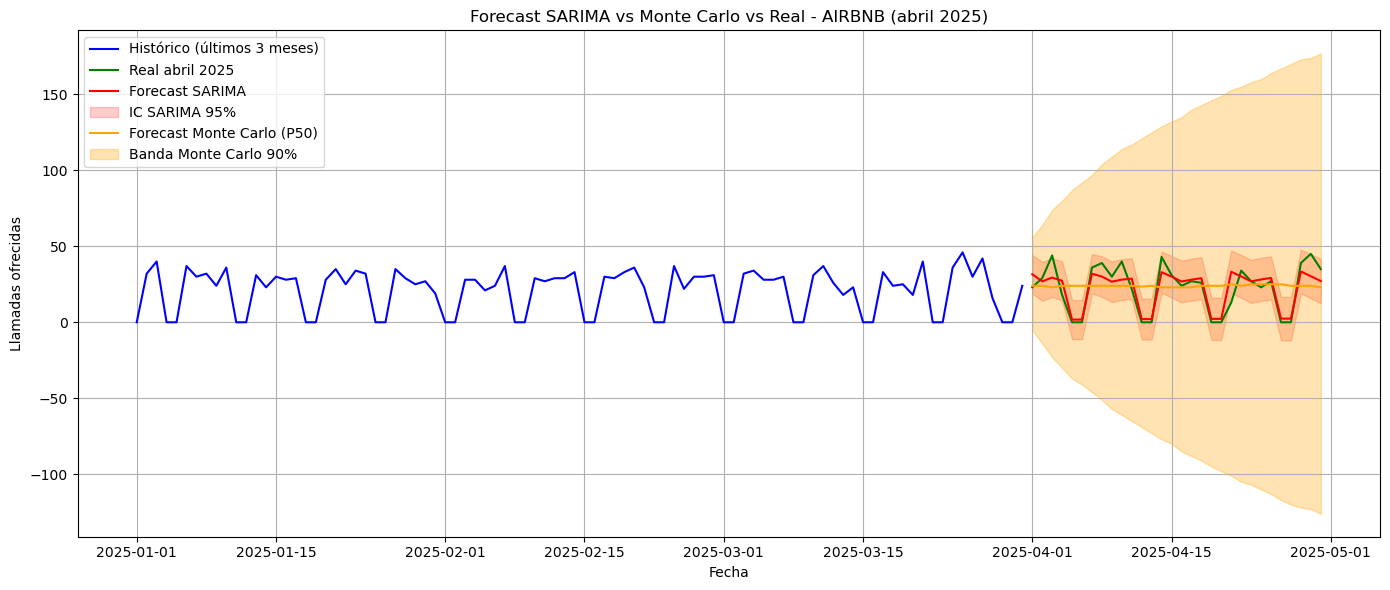

In [43]:
import matplotlib.pyplot as plt

# --- Visualización comparativa ---
plt.figure(figsize=(14, 6))

# Histórico
plt.plot(train_mc[-90:], label='Histórico (últimos 3 meses)', color='blue')

# Real abril
plt.plot(test_mc.index, test_mc, label='Real abril 2025', color='green')

# SARIMA
plt.plot(pred_april.index, pred_april, label='Forecast SARIMA', color='red')
plt.fill_between(pred_april.index,
                 conf_int_april.iloc[:, 0],
                 conf_int_april.iloc[:, 1],
                 color='red', alpha=0.2, label='IC SARIMA 95%')

# Monte Carlo
plt.plot(test_mc.index, p50_mc, label='Forecast Monte Carlo (P50)', color='orange')
plt.fill_between(test_mc.index,
                 p5_mc, p95_mc,
                 color='orange', alpha=0.3, label='Banda Monte Carlo 90%')

plt.title('Forecast SARIMA vs Monte Carlo vs Real - AIRBNB (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Analisis de Forecaste diario/tramos 15 minutos / SARIMA

In [44]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 2. Leer archivo Excel
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')

# 3. Filtrar solo AIRBNB y convertir a datetime
df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB'].copy()
df_airbnb['date_time'] = pd.to_datetime(df_airbnb['date_time'])

# 4. Filtrar lunes a viernes de 9:00 a 17:59
df_airbnb['weekday'] = df_airbnb['date_time'].dt.weekday
df_airbnb['hour'] = df_airbnb['date_time'].dt.hour
df_airbnb_limpio = df_airbnb[
    (df_airbnb['weekday'] <= 4) &
    (df_airbnb['hour'] >= 9) &
    (df_airbnb['hour'] < 18)
].copy()

# 5. Crear serie temporal en tramos de 15 minutos
serie_15min = df_airbnb_limpio.groupby('date_time')['Offered'].sum().asfreq('15T').fillna(0)

# 6. Separar datos de entrenamiento hasta el 31 de marzo
serie_train_15min = serie_15min[serie_15min.index <= '2025-03-31 17:45:00']

# 7. Ajustar modelo SARIMA con estacionalidad diaria (96 tramos = 1 día)
modelo_15min = SARIMAX(serie_train_15min,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 96),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
resultado_15min = modelo_15min.fit(disp=False)

# 8. Forecast para próximos 2 días (192 tramos de 15 minutos)
forecast_15min = resultado_15min.get_forecast(steps=192)
pred_15min = forecast_15min.predicted_mean
conf_int_15min = forecast_15min.conf_int()

# 9. Visualización
plt.figure(figsize=(14, 6))
plt.plot(serie_train_15min[-96*5:], label='Histórico (últimos 5 días)', color='blue')
plt.plot(pred_15min.index, pred_15min, label='Forecast (2 días)', color='orange')
plt.fill_between(pred_15min.index,
                 conf_int_15min.iloc[:, 0],
                 conf_int_15min.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast SARIMA - AIRBNB (15 min, próximos 2 días)')
plt.xlabel('Fecha y hora')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gcasc\AppData\Local\Temp\ipykernel_22120\3195038778.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  serie_15min = df_airbnb_limpio.groupby('date_time')['Offered'].sum().asfreq('15T').fillna(0)


KeyboardInterrupt: 

### Analisis de Forecaste diario/tramos 1 hora / SARIMA

C:\Users\gcasc\AppData\Local\Temp\ipykernel_22120\1642739991.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_1h = df_airbnb_limpio.groupby(pd.Grouper(key='date_time', freq='H'))['Offered'].sum().asfreq('H').fillna(0)


📊 Evaluación SARIMA (por hora):
MAE:  2.81
RMSE: 2.98
MAPE: 70.65%


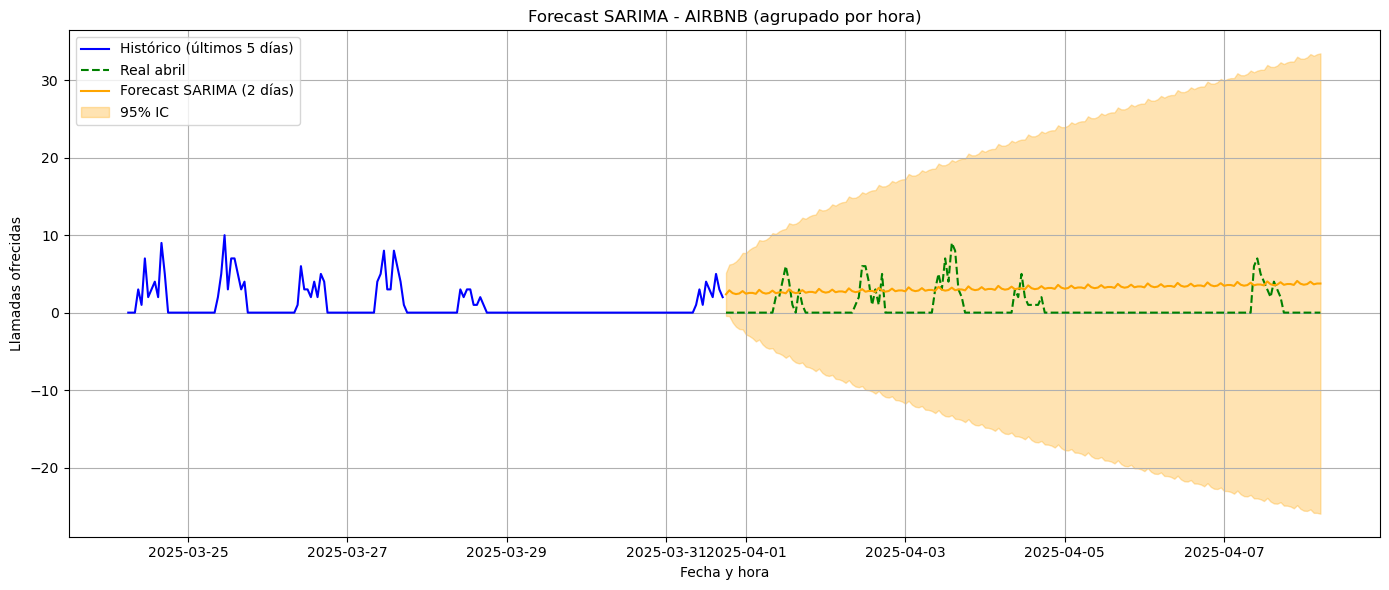

In [45]:
# 1. Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Filtrar AIRBNB y preparar
df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB'].copy()
df_airbnb['date_time'] = pd.to_datetime(df_airbnb['date_time'])
df_airbnb['weekday'] = df_airbnb['date_time'].dt.weekday
df_airbnb['hour'] = df_airbnb['date_time'].dt.hour

# 3. Filtrar solo lunes a viernes de 9:00 a 17:59
df_airbnb_limpio = df_airbnb[
    (df_airbnb['weekday'] <= 4) &
    (df_airbnb['hour'] >= 9) &
    (df_airbnb['hour'] < 18)
].copy()

# 4. Crear serie temporal con frecuencia horaria
serie_1h = df_airbnb_limpio.groupby(pd.Grouper(key='date_time', freq='H'))['Offered'].sum().asfreq('H').fillna(0)

# 5. Entrenamiento: últimas 2 semanas de marzo
serie_train_1h = serie_1h[(serie_1h.index >= '2025-03-17') & (serie_1h.index <= '2025-03-31 17:00:00')]
serie_test_1h = serie_1h[serie_1h.index > '2025-03-31 17:00:00']  # abril

# 6. Ajustar modelo SARIMA ligero (9 horas/día laborales)
modelo_1h = SARIMAX(serie_train_1h,
                    order=(0, 1, 1),
                    seasonal_order=(0, 1, 1, 9),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
resultado_1h = modelo_1h.fit(disp=False, maxiter=50)

# 7. Forecast para 2 días hábiles (45 pasos)
forecast_1h = resultado_1h.get_forecast(steps=180)
pred_1h = forecast_1h.predicted_mean
conf_int_1h = forecast_1h.conf_int()

# 8. Evaluación
real_1h = serie_test_1h.head(180)
mae = mean_absolute_error(real_1h, pred_1h)
rmse = np.sqrt(mean_squared_error(real_1h, pred_1h))
mape = np.mean(np.abs((real_1h - pred_1h) / real_1h.replace(0, np.nan))) * 100

print("📊 Evaluación SARIMA (por hora):")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 9. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(serie_train_1h[-9*20:], label='Histórico (últimos 5 días)', color='blue')
plt.plot(real_1h.index, real_1h.values, label='Real abril', color='green', linestyle='dashed')
plt.plot(pred_1h.index, pred_1h.values, label='Forecast SARIMA (2 días)', color='orange')
plt.fill_between(pred_1h.index,
                 conf_int_1h.iloc[:, 0],
                 conf_int_1h.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast SARIMA - AIRBNB (agrupado por hora)')
plt.xlabel('Fecha y hora')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Forecaste tramos 15 minutos / Prophet

C:\Users\gcasc\AppData\Local\Temp\ipykernel_22176\2510493361.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  serie_15min = df_airbnb_limpio.groupby('date_time')['Offered'].sum().asfreq('15T').fillna(0)
01:01:51 - cmdstanpy - INFO - Chain [1] start processing
01:02:00 - cmdstanpy - INFO - Chain [1] done processing


📊 Evaluación del modelo Prophet (abril 2025, 15 min)
MAE:  0.35
RMSE: 0.54
MAPE: 52.28%


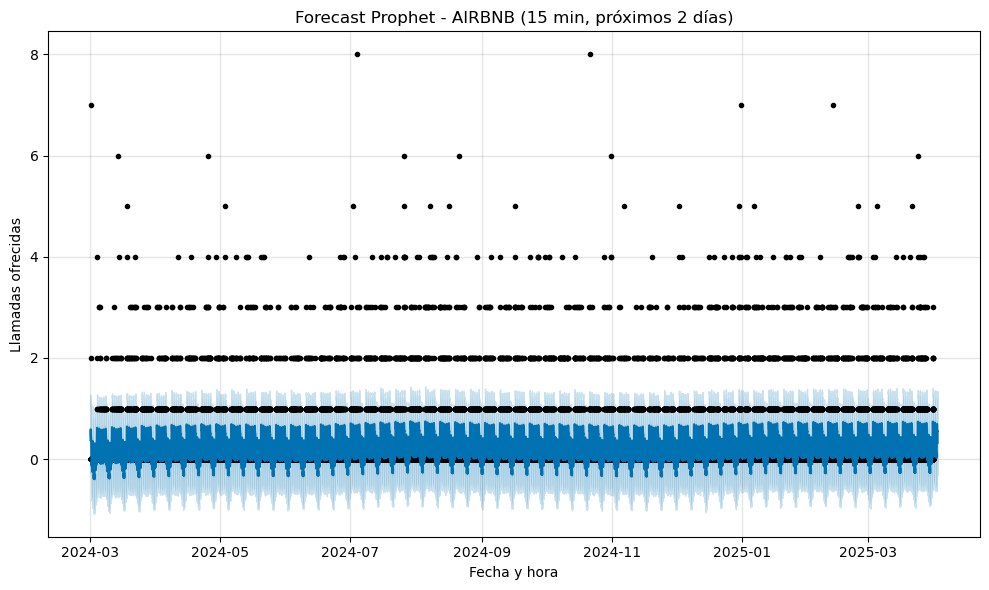

In [ ]:
# 1. Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Preparar serie en tramos de 15 minutos (AIRBNB, días hábiles, 9-18hs)
df_airbnb = df_llamadas[df_llamadas['cliente'] == 'AIRBNB'].copy()
df_airbnb['date_time'] = pd.to_datetime(df_airbnb['date_time'])
df_airbnb['weekday'] = df_airbnb['date_time'].dt.weekday
df_airbnb['hour'] = df_airbnb['date_time'].dt.hour
df_airbnb_limpio = df_airbnb[
    (df_airbnb['weekday'] <= 4) &
    (df_airbnb['hour'] >= 9) &
    (df_airbnb['hour'] < 18)
].copy()

# 3. Crear serie con frecuencia de 15 minutos
serie_15min = df_airbnb_limpio.groupby('date_time')['Offered'].sum().asfreq('15T').fillna(0)

# 4. Entrenamiento hasta marzo 2025
serie_train_15min = serie_15min[serie_15min.index <= '2025-03-31 17:45:00']
serie_test_15min = serie_15min[serie_15min.index > '2025-03-31 17:45:00']  # abril

# 5. Crear DataFrame para Prophet
df_prophet = serie_train_15min.reset_index()
df_prophet.columns = ['ds', 'y']

# 6. Ajustar modelo Prophet
modelo = Prophet()
modelo.fit(df_prophet)

# 7. Forecast: próximos 192 tramos (2 días hábiles de 15 min)
future = modelo.make_future_dataframe(periods=192, freq='15min')
forecast = modelo.predict(future)

# 8. Extraer predicción solo para abril (últimos 192)
pred_abril = forecast.tail(192).set_index('ds')['yhat']
real_abril = serie_test_15min.head(192)

# 9. Evaluación del modelo
mae = mean_absolute_error(real_abril, pred_abril)
rmse = np.sqrt(mean_squared_error(real_abril, pred_abril))
mape = np.mean(np.abs((real_abril - pred_abril) / real_abril.replace(0, np.nan))) * 100

print(f"📊 Evaluación del modelo Prophet (abril 2025, 15 min)")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 10. Visualización
fig = modelo.plot(forecast)
plt.title('Forecast Prophet - AIRBNB (15 min, próximos 2 días)')
plt.xlabel('Fecha y hora')
plt.ylabel('Llamadas ofrecidas')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'real_abril' is not defined

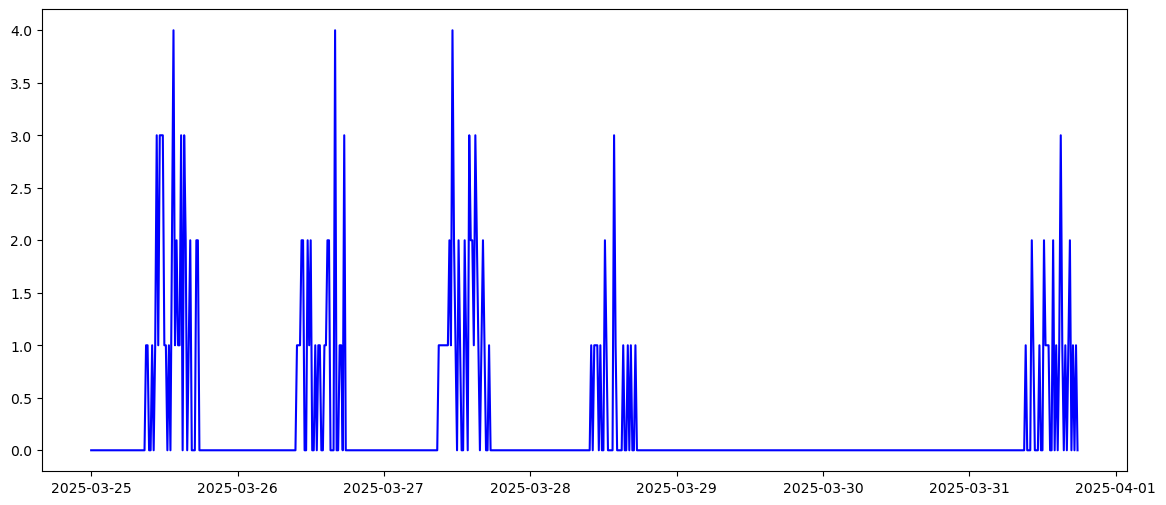

In [46]:
import matplotlib.pyplot as plt

# --- 1. Recortar serie real y predicción ---
# Última semana de entrenamiento
historico = serie_train_15min[serie_train_15min.index >= '2025-03-25']

# Predicción de Prophet ya está en pred_abril
# Serie real de abril ya está en real_abril (192 tramos)

# --- 2. Graficar ---
plt.figure(figsize=(14, 6))

# Línea azul: últimos días reales del entrenamiento
plt.plot(historico.index, historico.values, label='Histórico (última semana)', color='blue')

# Línea verde: valores reales de abril (ground truth)
plt.plot(real_abril.index, real_abril.values, label='Real Abril (15 min)', color='green', linestyle='dashed')

# Línea naranja: predicción Prophet
plt.plot(pred_abril.index, pred_abril.values, label='Forecast Prophet', color='orange')

plt.title('Forecast Prophet - AIRBNB (última semana + abril)')
plt.xlabel('Fecha y hora')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Forecast diario - Cliente COLUMBUS - SARIMA

In [48]:
# cambios de parametros
# Ajustar el modelo SARIMA con nuevos parámetros


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

df_columbus = df_llamadas[df_llamadas['cliente'] == 'COLUMBUS']
serie_columbus = df_columbus.groupby(df_columbus['date_time'].dt.date)['Offered'].sum()
serie_columbus = serie_columbus.asfreq('D').fillna(0)
serie_columbus.index = pd.to_datetime(serie_columbus.index)

# 2. Dividir en entrenamiento y test
train_full_columbus = serie_columbus[serie_columbus.index <= '2025-03-31']
test_abril_columbus = serie_columbus[(serie_columbus.index >= '2025-04-01') & (serie_columbus.index <= '2025-04-30')]

# 3. Ajustar modelo SARIMA
modelo_april_columbus = SARIMAX(train_full_columbus,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
resultado_april_columbus = modelo_april_columbus.fit(disp=False)

# 4. Forecast para abril
#forecast_april_columbus = resultado_april_columbus.get_forecast(steps=len(test_abril_columbus))

forecast_60d_columbus = resultado_april_columbus.get_forecast(steps=60)
pred_60d_columbus = forecast_60d_columbus.predicted_mean
conf_int_60d_columbus = forecast_60d_columbus.conf_int()

pred_april_columbus = forecast_april_columbus.predicted_mean
conf_int_april_columbus = forecast_april_columbus.conf_int()

# 5. Evaluación
mae_april_columbus = mean_absolute_error(test_abril_columbus, pred_april_columbus)
rmse_april_columbus = np.sqrt(mean_squared_error(test_abril_columbus, pred_april_columbus))

# MAPE seguro (evita división por cero)
test_safe_columbus = test_abril_columbus.copy()
test_safe_columbus[test_safe_columbus == 0] = np.nan  # evitar división por cero
mape_april_columbus = np.mean(np.abs((test_abril_columbus - pred_april_columbus) / test_safe_columbus)) * 100

print(f"📉 MAPE abril 2025: {mape_april_columbus:.2f}%")
print(f"📊 MAE abril 2025: {mae_april_columbus:.2f}")
print(f"📈 RMSE abril 2025: {rmse_april_columbus:.2f}")



# 6. Visualización
plt.figure(figsize=(14, 6))
plt.plot(train_full_columbus[-90:], label='Histórico (últimos 3 meses)')
plt.plot(test_abril_columbus.index, test_abril_columbus, label='Real abril 2025', color='green')
plt.plot(pred_april_columbus.index, pred_april_columbus, label='Forecast abril 2025', color='orange')
plt.fill_between(pred_april_columbus.index,
                 conf_int_april_columbus.iloc[:, 0],
                 conf_int_april_columbus.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast vs Real - Columbus (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#7 forecast 60 dias
plt.figure(figsize=(14, 6))
plt.plot(train_full_columbus[-90:], label='Histórico (últimos 3 meses)')
plt.plot(serie_columbus['2025-04-01':'2025-04-30'], label='Real abril 2025', color='green')
plt.plot(pred_60d_columbus.index, pred_60d_columbus, label='Forecast 60 días', color='orange')
plt.fill_between(pred_60d_columbus.index,
                 conf_int_60d_columbus.iloc[:, 0],
                 conf_int_60d_columbus.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario - Columbus (abril + mayo 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'forecast_april_columbus' is not defined

<Figure size 2400x10000 with 0 Axes>

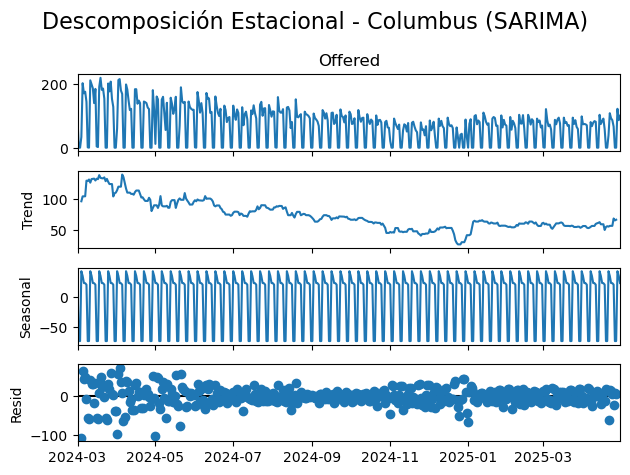

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición estacional con periodo semanal
decomposition = seasonal_decompose(serie_columbus, model='additive', period=7) 

# Visualización de los componentes
plt.figure(figsize=(24, 100))
decomposition.plot()
plt.suptitle('Descomposición Estacional - Columbus (SARIMA)', fontsize=16)
plt.tight_layout()
plt.show()


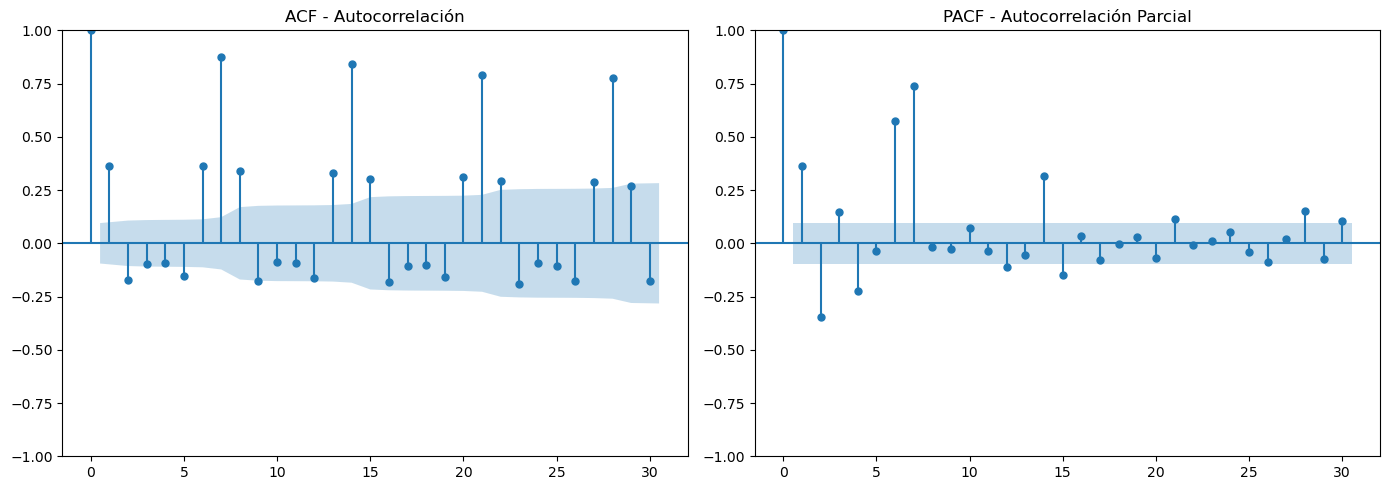

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Graficar ACF y PACF para determinar parámetros SARIMA
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(serie_columbus, lags=30, ax=plt.gca())
plt.title('ACF - Autocorrelación')

plt.subplot(1, 2, 2)
plot_pacf(serie_columbus, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF - Autocorrelación Parcial')

plt.tight_layout()
plt.show()

In [51]:
# analisis de outliers
# Calcular límites superior e inferior usando IQR
q1 = serie_columbus.quantile(0.25)
q3 = serie_columbus.quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Detectar outliers
outliers = serie_columbus[(serie_columbus < limite_inferior) | (serie_columbus > limite_superior)]
print(f"Número de outliers detectados: {len(outliers)}")


Número de outliers detectados: 0


### Metodo Holt-winters - Columbus - diario

📉 MAPE abril 2025: 19.17%
📊 MAE abril 2025: 11.50
📈 RMSE abril 2025: 16.64


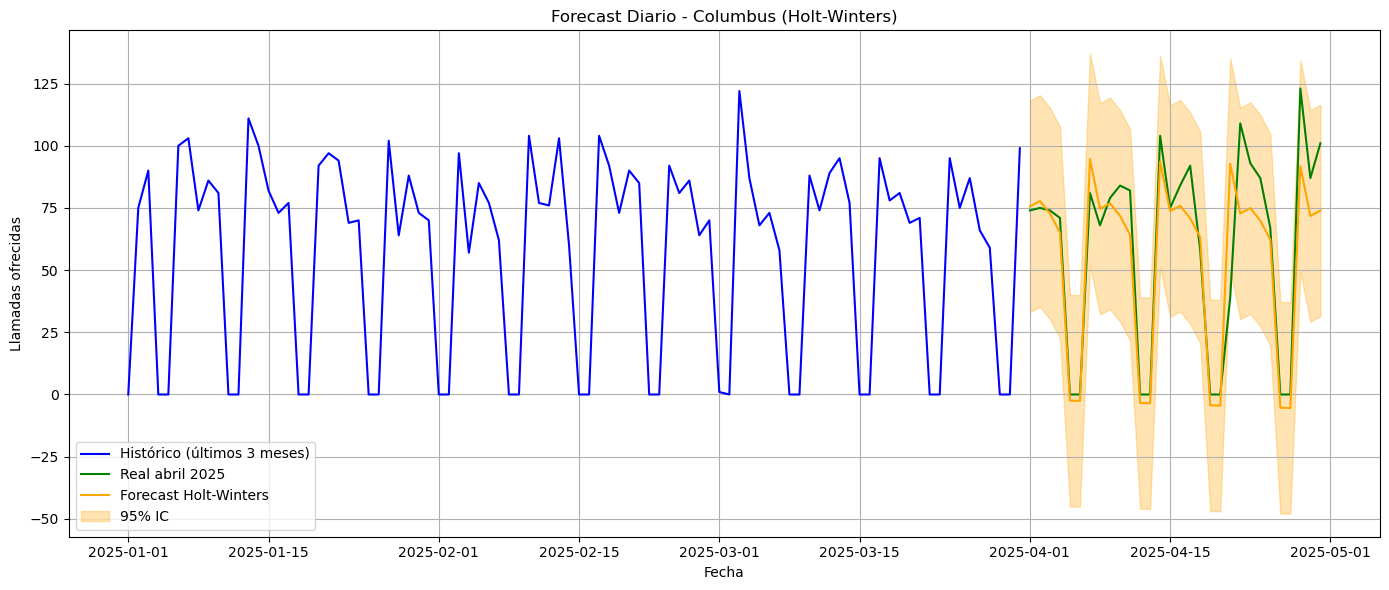

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

# 2. Filtrar COLUMBUS y crear serie diaria
df_columbus = df_llamadas[df_llamadas['cliente'] == 'COLUMBUS']
serie_columbus = df_columbus.groupby(df_columbus['date_time'].dt.date)['Offered'].sum()
serie_columbus = serie_columbus.asfreq('D').fillna(0)
serie_columbus.index = pd.to_datetime(serie_columbus.index)

# 3. Entrenamiento y test
train = serie_columbus[serie_columbus.index <= '2025-03-31']
test = serie_columbus[(serie_columbus.index >= '2025-04-01') & (serie_columbus.index <= '2025-04-30')]

# 4. Modelo Holt-Winters (aditivo con estacionalidad semanal)
modelo_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7)
fit_hw = modelo_hw.fit()
forecast_hw = fit_hw.forecast(steps=len(test))

# 5. Intervalo de confianza 95%
std_error = np.std(fit_hw.resid)
ci_upper = forecast_hw + 1.96 * std_error
ci_lower = forecast_hw - 1.96 * std_error

# 6. Evaluación
mae = mean_absolute_error(test, forecast_hw)
rmse = np.sqrt(mean_squared_error(test, forecast_hw))
mape = np.mean(np.abs((test - forecast_hw) / test.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025: {mape:.2f}%")
print(f"📊 MAE abril 2025: {mae:.2f}")
print(f"📈 RMSE abril 2025: {rmse:.2f}")

# 7. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast Holt-Winters', color='orange')
plt.fill_between(forecast_hw.index, ci_lower, ci_upper, color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario - Columbus (Holt-Winters)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Metodo descompsicion estacional - Columbus 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

# 2. Filtrar COLUMBUS y crear serie diaria
df_columbus = df_llamadas[df_llamadas['cliente'] == 'COLUMBUS']
serie_columbus = df_columbus.groupby(df_columbus['date_time'].dt.date)['Offered'].sum()
serie_columbus = serie_columbus.asfreq('B').fillna(0)
serie_columbus.index = pd.to_datetime(serie_columbus.index)

# 3. Entrenamiento y test
train = serie_columbus[serie_columbus.index <= '2025-03-31']
test = serie_columbus[(serie_columbus.index >= '2025-04-01') & (serie_columbus.index <= '2025-04-30')]

# 4. Descomposición aditiva semanal
result = seasonal_decompose(train, model='additive', period=7)

# 5. Forecast por componentes (30 días)
# Últimos valores de tendencia (relleno si hay menos de 30)
trend_vals = result.trend.dropna().iloc[-30:]
if len(trend_vals) < 30:
    trend_forecast = np.pad(trend_vals, (30 - len(trend_vals), 0), mode='edge')
else:
    trend_forecast = trend_vals.values

# Repetir estacionalidad semanal para 30 días
seasonality_vals = result.seasonal[:7].values
seasonality_forecast = np.tile(seasonality_vals, 5)[:30]

# Predicción: tendencia + estacionalidad
predictions_decomp = trend_forecast + seasonality_forecast

# Intervalo de confianza del 95%
std_error_decomp = np.std(result.resid.dropna())
ci_upper = predictions_decomp + 1.96 * std_error_decomp
ci_lower = predictions_decomp - 1.96 * std_error_decomp

# 6. Evaluación
real = test.head(30)
mae = mean_absolute_error(real, predictions_decomp)
rmse = np.sqrt(mean_squared_error(real, predictions_decomp))
mape = np.mean(np.abs((real - predictions_decomp) / real.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025 (Descomposición): {mape:.2f}%")
print(f"📊 MAE abril 2025: {mae:.2f}")
print(f"📈 RMSE abril 2025: {rmse:.2f}")

# 7. Gráfico
fechas_forecast = pd.date_range(start='2025-04-01', periods=30, freq='D')

plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(real.index, real, label='Real abril 2025', color='green')
plt.plot(fechas_forecast, predictions_decomp, label='Forecast Descomposición', color='purple')
plt.fill_between(fechas_forecast, ci_lower, ci_upper, color='purple', alpha=0.3, label='95% IC')
plt.title('Forecast Diario - Columbus (por descomposición)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [22, 30]

## Comparativa modelos de Forecast diarios para Columbus - 1

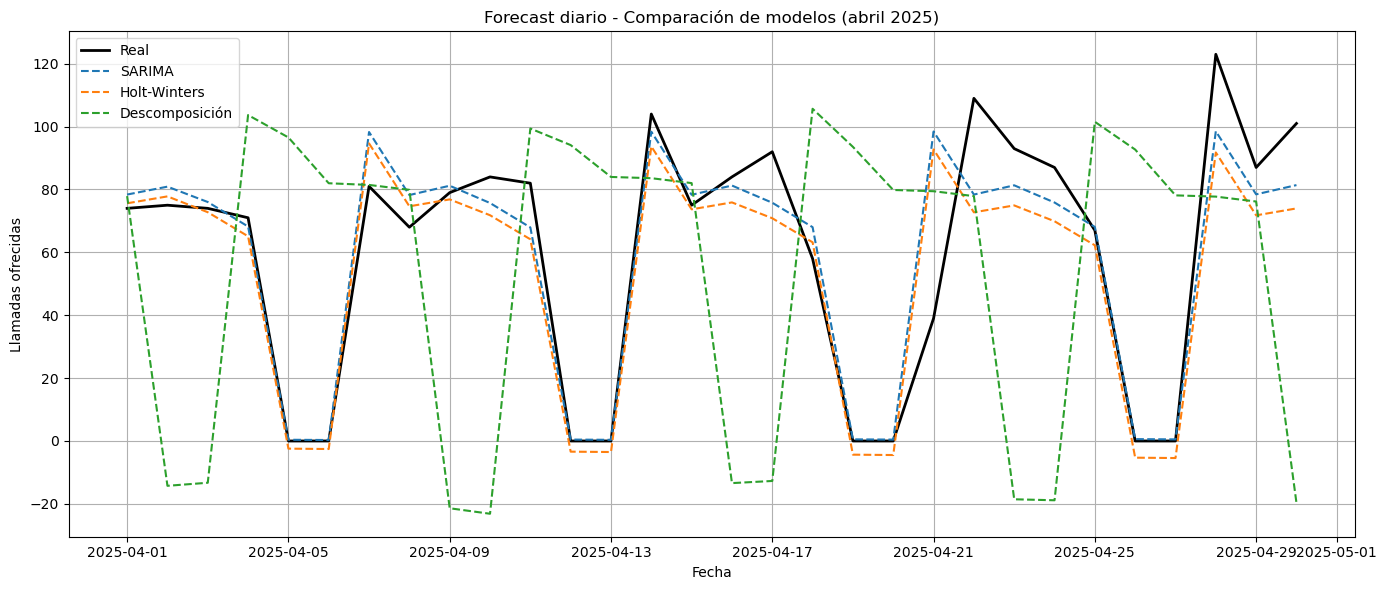

📊 Comparación de métricas por modelo (abril 2025):


Modelo    MAE   RMSE   MAPE
0          SARIMA   9.17  15.22  17.78
1    Holt-Winters  11.50  16.64  19.17
2  Descomposición  64.29  74.79  68.97

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asegurar consistencia de fechas y longitud
fechas = pd.date_range(start='2025-04-01', periods=30, freq='D')
real_abril = test.head(30)

# Crear DataFrame consolidado sin Prophet
df_comparacion = pd.DataFrame({
    'Real': real_abril.values,
    'SARIMA': pred_april_columbus[:30].values,
    'Holt-Winters': forecast_hw[:30].values,
    'Descomposición': predictions_decomp[:30]
}, index=fechas)

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(df_comparacion.index, df_comparacion['Real'], label='Real', color='black', linewidth=2)
plt.plot(df_comparacion.index, df_comparacion['SARIMA'], label='SARIMA', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Holt-Winters'], label='Holt-Winters', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Descomposición'], label='Descomposición', linestyle='--')
plt.title('Forecast diario - Comparación de modelos (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Asegurar que las predicciones y el conjunto real estén alineados
real = test.head(30)
pred_sarima = pred_april_columbus[:30]
pred_hw = forecast_hw[:30]
pred_decomp = predictions_decomp[:30]

# Calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.nan))) * 100
    return mae, rmse, mape

# Aplicar a cada modelo
mae_sarima, rmse_sarima, mape_sarima = calcular_metricas(real, pred_sarima)
mae_hw, rmse_hw, mape_hw = calcular_metricas(real, pred_hw)
mae_decomp, rmse_decomp, mape_decomp = calcular_metricas(real, pred_decomp)

# Crear DataFrame resumen
resultados_modelos = pd.DataFrame({
    'Modelo': ['SARIMA', 'Holt-Winters', 'Descomposición'],
    'MAE': [mae_sarima, mae_hw, mae_decomp],
    'RMSE': [rmse_sarima, rmse_hw, rmse_decomp],
    'MAPE': [mape_sarima, mape_hw, mape_decomp]
})

# Mostrar tabla ordenada
print("📊 Comparación de métricas por modelo (abril 2025):")
display(resultados_modelos.round(2))



## Anlisis conjunto Columbus + Airbnb

Luego de las reuniones con el equipo de Front se llega a la conclusion que se puede unificar los volumnenes de llamadas de ambos cluster de clientes, dado que los agentes son los mismos, en cambio para el cluster de Amex el equipo de front es otro distintos

In [56]:
import pandas as pd

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas['date_time'] = pd.to_datetime(df_llamadas['date_time'])

# 2. Filtrar solo AIRBNB y COLUMBUS
df_filtrado = df_llamadas[df_llamadas['cliente'].isin(['AIRBNB', 'COLUMBUS'])].copy()

# 3. Eliminar sábados (5) y domingos (6)
df_filtrado['weekday'] = df_filtrado['date_time'].dt.weekday  # 0=Lunes, 6=Domingo
df_limpio = df_filtrado[df_filtrado['weekday'] < 5].copy()  # Solo lunes a viernes

# 4. (Opcional) Crear columnas útiles adicionales
df_limpio['fecha'] = df_limpio['date_time'].dt.date
df_limpio['hora'] = df_limpio['date_time'].dt.time

# 5. Verificar resultados
print(df_limpio[['date_time', 'cliente', 'weekday', 'Offered']].head())
print(f"\nNúmero total de registros: {len(df_limpio)}")


             date_time   cliente  weekday  Offered
2  2024-12-05 15:00:00    AIRBNB        3        1
4  2025-03-26 10:15:00  COLUMBUS        2        1
7  2024-05-02 16:45:00  COLUMBUS        3        1
9  2025-01-21 12:15:00  COLUMBUS        1        1
11 2024-04-01 10:15:00  COLUMBUS        0        1

Número total de registros: 40081


In [57]:
# 1. Agrupar por fecha y sumar las llamadas ofrecidas
serie_diaria = df_limpio.groupby(df_limpio['date_time'].dt.date)['Offered'].sum()

# 2. Convertir a índice datetime
serie_diaria.index = pd.to_datetime(serie_diaria.index)

# 3. Asegurar frecuencia diaria y rellenar huecos con 0
serie_diaria = serie_diaria.asfreq('D')
serie_diaria = serie_diaria[serie_diaria.index.weekday < 5]  # Solo lunes a viernes
serie_diaria = serie_diaria.fillna(0)

# 4. Mostrar resumen
print(serie_diaria.head())
print(f"Rango de fechas: {serie_diaria.index.min()} a {serie_diaria.index.max()}")


# Dividir la serie diaria en conjunto de entrenamiento y test
train = serie_diaria[serie_diaria.index <= '2025-03-31']
test = serie_diaria[(serie_diaria.index >= '2025-04-01') & (serie_diaria.index <= '2025-04-30')]

# Verificar tamaños y fechas
print(f"Entrenamiento: {train.index.min()} → {train.index.max()} ({len(train)} días)")
print(f"Test: {test.index.min()} → {test.index.max()} ({len(test)} días)")

date_time
2024-03-01     98.0
2024-03-04     42.0
2024-03-05    222.0
2024-03-06    177.0
2024-03-07    186.0
Name: Offered, dtype: float64
Rango de fechas: 2024-03-01 00:00:00 a 2025-04-30 00:00:00
Entrenamiento: 2024-03-01 00:00:00 → 2025-03-31 00:00:00 (282 días)
Test: 2025-04-01 00:00:00 → 2025-04-30 00:00:00 (22 días)


<Figure size 1400x800 with 0 Axes>

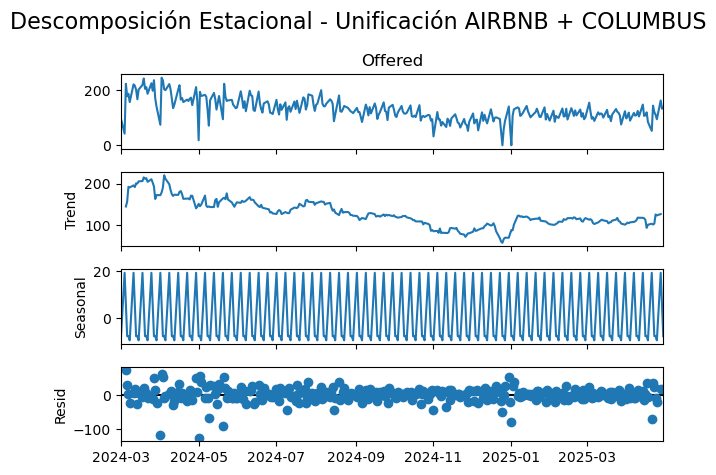

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición estacional con periodo semanal (5 días hábiles por semana)
decomposition = seasonal_decompose(serie_diaria, model='additive', period=5)

# Visualización de los componentes
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Descomposición Estacional - Unificación AIRBNB + COLUMBUS', fontsize=16)
plt.tight_layout()
plt.show()


✅ Observaciones clave
1. Tendencia (Trend)
Claramente visible: empieza en valores altos (~200) y va bajando con oscilaciones suaves.

Esto indica que incluir un componente de tendencia en el modelo (como en SARIMA con d=1) es justificado.

2. Estacionalidad (Seasonal)
Es muy marcada y regular, con un ciclo de 5 días — perfectamente compatible con una estacionalidad semanal laboral (lunes a viernes).

Confirma que tiene sentido usar seasonal_order=(P,D,Q,5) en SARIMA.

3. Residuos (Resid)
No muestran un patrón visible ni una tendencia clara: buena señal.

Distribución bastante dispersa, con algunos outliers, pero sin autocorrelación visible a simple vista (podríamos confirmarlo con un ACF si querés).

### Modelo Sarima - Columbus + Airbnb - diaria

c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


📊 MAE: 18.72
📉 RMSE: 25.04
📈 MAPE: 18.88%


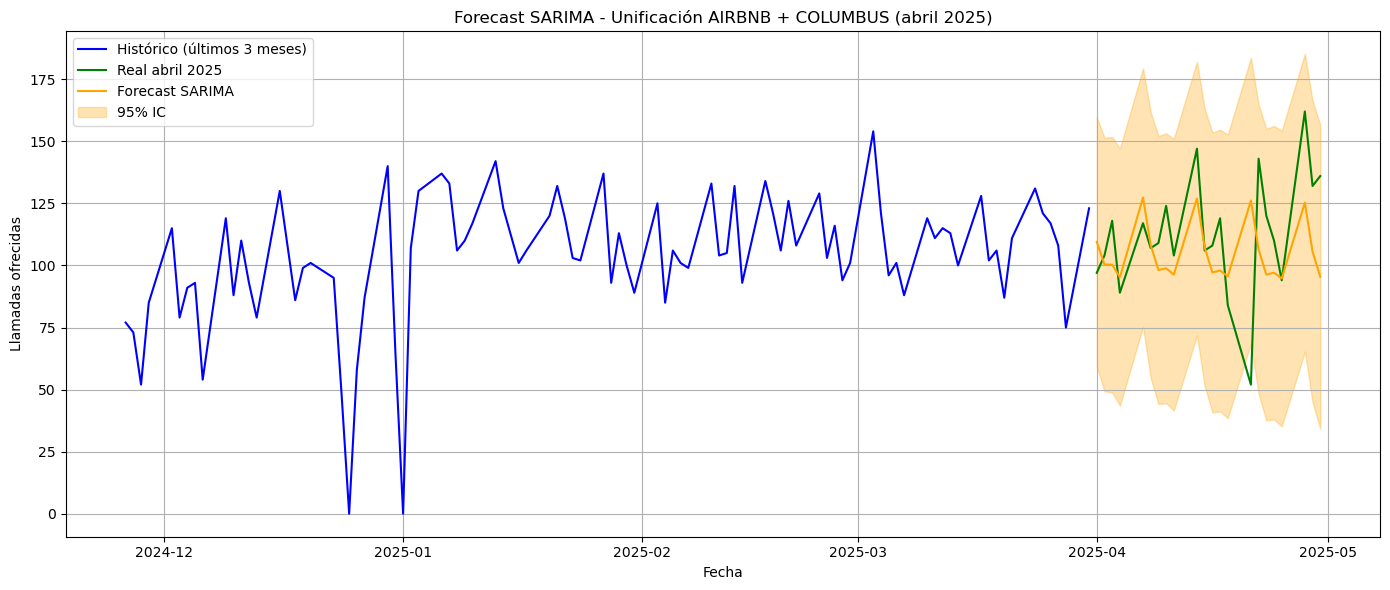

In [59]:
# 5. Ajustar modelo SARIMA
modelo_sarima = SARIMAX(train,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
resultado_sarima = modelo_sarima.fit(disp=False)

# 6. Forecast
forecast_sarima = resultado_sarima.get_forecast(steps=len(test))
pred_sarima = forecast_sarima.predicted_mean
conf_int_sarima = forecast_sarima.conf_int()

# 7. Evaluación
mae = mean_absolute_error(test, pred_sarima)
rmse = np.sqrt(mean_squared_error(test, pred_sarima))
mape = np.mean(np.abs((test - pred_sarima) / test.replace(0, np.nan))) * 100

print(f"📊 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 MAPE: {mape:.2f}%")

# 8. Gráfico con intervalo corregido
lower_bound = conf_int_sarima.iloc[:, 0].astype(float)
upper_bound = conf_int_sarima.iloc[:, 1].astype(float)

plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(pred_sarima.index, pred_sarima, label='Forecast SARIMA', color='orange')
plt.fill_between(pred_sarima.index, lower_bound, upper_bound,
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast SARIMA - Unificación AIRBNB + COLUMBUS (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Modelo Holt-Winters - Columbus + Airbnb - diaria

c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


📉 MAPE abril 2025: 19.40%
📊 MAE abril 2025: 19.52
📈 RMSE abril 2025: 25.10


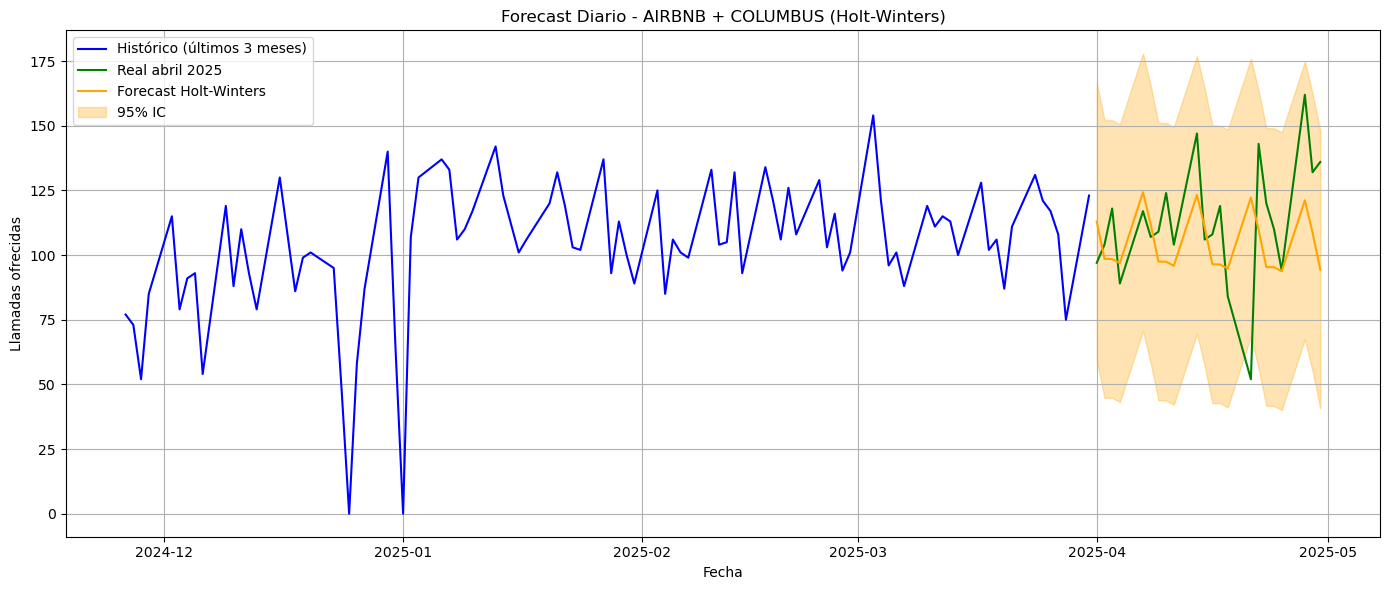

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Ajustar modelo Holt-Winters (5 días laborales)
modelo_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=5)
fit_hw = modelo_hw.fit()
forecast_hw = fit_hw.forecast(steps=len(test))

# 2. Índice para el forecast
forecast_hw.index = test.index

# 3. Intervalo de confianza (convertido a float)
std_error = np.std(fit_hw.resid)
ci_upper = (forecast_hw + 1.96 * std_error).astype(float)
ci_lower = (forecast_hw - 1.96 * std_error).astype(float)

# 4. Evaluación
mae_hw = mean_absolute_error(test, forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test, forecast_hw))
mape_hw = np.mean(np.abs((test - forecast_hw) / test.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025: {mape_hw:.2f}%")
print(f"📊 MAE abril 2025: {mae_hw:.2f}")
print(f"📈 RMSE abril 2025: {rmse_hw:.2f}")

# 5. Visualización
plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast Holt-Winters', color='orange')
plt.fill_between(forecast_hw.index, ci_lower, ci_upper, color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario - AIRBNB + COLUMBUS (Holt-Winters)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Modelo Seasonal descompose - Columbus + Airbnb - diaria

📉 MAPE abril 2025 (Descomposición): 17.28%
📊 MAE abril 2025: 18.37
📈 RMSE abril 2025: 24.24


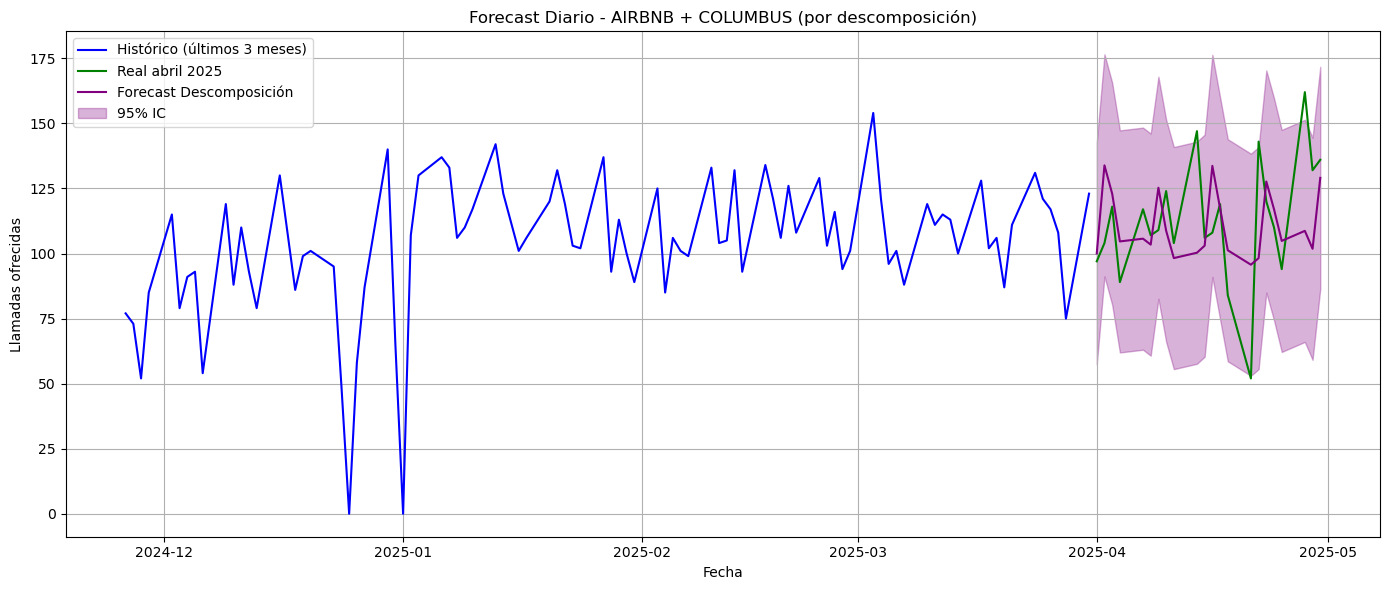

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición aditiva semanal laboral
result = seasonal_decompose(train, model='additive', period=5)

# Forecast de igual tamaño al test
n_dias = len(test)

# Últimos valores de la tendencia
trend_vals = result.trend.dropna().iloc[-n_dias:]
if len(trend_vals) < n_dias:
    trend_forecast = np.pad(trend_vals, (n_dias - len(trend_vals), 0), mode='edge')
else:
    trend_forecast = trend_vals.values

# Estacionalidad repetida
seasonality_vals = result.seasonal[:5].values
seasonality_forecast = np.tile(seasonality_vals, n_dias // 5 + 1)[:n_dias]

# Predicción = tendencia + estacionalidad
predictions_decomp = trend_forecast + seasonality_forecast

# Intervalo de confianza 95%
std_error_decomp = np.std(result.resid.dropna())
ci_upper = predictions_decomp + 1.96 * std_error_decomp
ci_lower = predictions_decomp - 1.96 * std_error_decomp

# Evaluación
real = test
mae_decomp = mean_absolute_error(real, predictions_decomp)
rmse_decomp = np.sqrt(mean_squared_error(real, predictions_decomp))
mape_decomp = np.mean(np.abs((real - predictions_decomp) / real.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025 (Descomposición): {mape_decomp:.2f}%")
print(f"📊 MAE abril 2025: {mae_decomp:.2f}")
print(f"📈 RMSE abril 2025: {rmse_decomp:.2f}")

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(real.index, real, label='Real abril 2025', color='green')
plt.plot(real.index, predictions_decomp, label='Forecast Descomposición', color='purple')
plt.fill_between(real.index, ci_lower, ci_upper, color='purple', alpha=0.3, label='95% IC')
plt.title('Forecast Diario - AIRBNB + COLUMBUS (por descomposición)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Comparativa modelos de Forecast diarios para Columbus - 2

📊 Comparación de métricas por modelo:
           Modelo    MAE   RMSE   MAPE
0          SARIMA  18.72  25.04  18.88
1    Holt-Winters  19.52  25.10  19.40
2  Descomposición  18.37  24.24  17.28


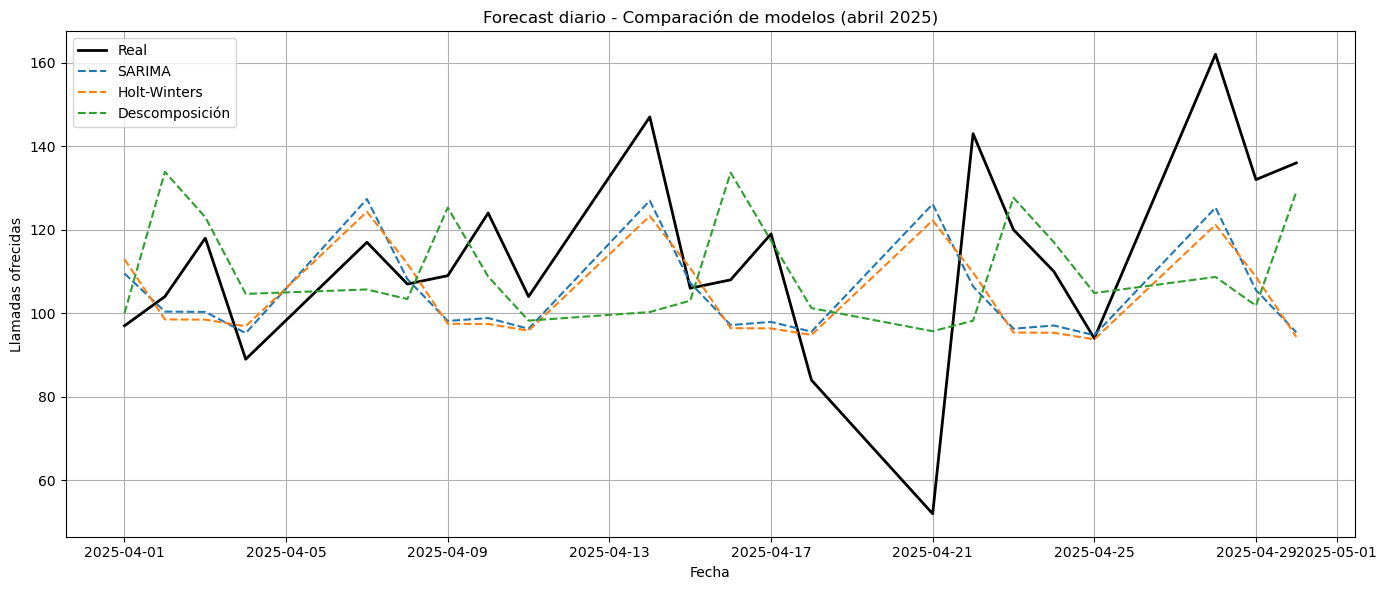

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Consolidar resultados en un DataFrame
df_comparacion = pd.DataFrame({
    'Real': test.values,
    'SARIMA': pred_sarima.values,
    'Holt-Winters': forecast_hw.values,
    'Descomposición': predictions_decomp[:len(test)]
}, index=test.index)

# 2. Función para métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.nan))) * 100
    return mae, rmse, mape

# 3. Calcular métricas para cada modelo
mae_sarima, rmse_sarima, mape_sarima = calcular_metricas(df_comparacion['Real'], df_comparacion['SARIMA'])
mae_hw, rmse_hw, mape_hw = calcular_metricas(df_comparacion['Real'], df_comparacion['Holt-Winters'])
mae_decomp, rmse_decomp, mape_decomp = calcular_metricas(df_comparacion['Real'], df_comparacion['Descomposición'])

# 4. Crear tabla resumen
resultados_modelos = pd.DataFrame({
    'Modelo': ['SARIMA', 'Holt-Winters', 'Descomposición'],
    'MAE': [mae_sarima, mae_hw, mae_decomp],
    'RMSE': [rmse_sarima, rmse_hw, rmse_decomp],
    'MAPE': [mape_sarima, mape_hw, mape_decomp]
}).round(2)

print("📊 Comparación de métricas por modelo:")
print(resultados_modelos)

# 5. Gráfico comparativo
plt.figure(figsize=(14, 6))
plt.plot(df_comparacion.index, df_comparacion['Real'], label='Real', color='black', linewidth=2)
plt.plot(df_comparacion.index, df_comparacion['SARIMA'], label='SARIMA', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Holt-Winters'], label='Holt-Winters', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Descomposición'], label='Descomposición', linestyle='--')
plt.title('Forecast diario - Comparación de modelos (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


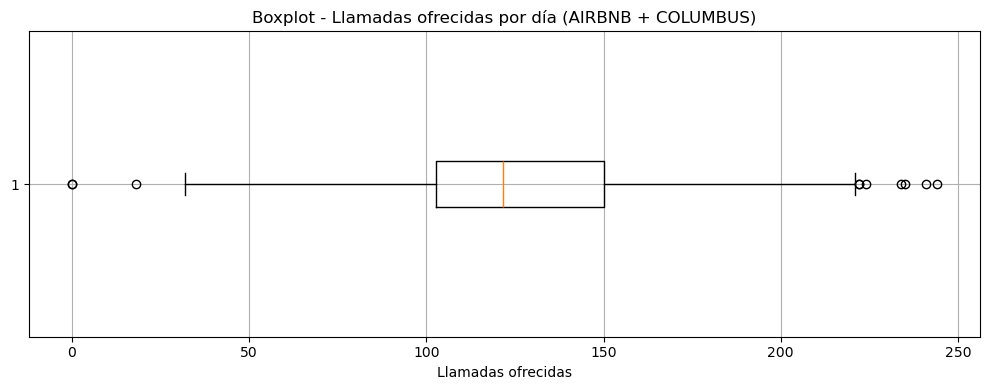

📌 Total de outliers detectados: 10

📆 Días con valores atípicos (top 10):
date_time
2024-04-02    244.0
2024-03-19    241.0
2024-03-27    235.0
2024-04-03    234.0
2024-03-25    224.0
2024-03-05    222.0
2024-05-21    222.0
2024-05-01     18.0
2024-12-25      0.0
2025-01-01      0.0
Name: Offered, dtype: float64


In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Visualización con boxplot
plt.figure(figsize=(10, 4))
plt.boxplot(serie_diaria.values, vert=False)
plt.title("Boxplot - Llamadas ofrecidas por día (AIRBNB + COLUMBUS)")
plt.xlabel("Llamadas ofrecidas")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Detección de outliers usando IQR
q1 = serie_diaria.quantile(0.25)
q3 = serie_diaria.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 3. Identificar valores atípicos
outliers = serie_diaria[(serie_diaria < lower_bound) | (serie_diaria > upper_bound)]

# 4. Mostrar resultados
print(f"📌 Total de outliers detectados: {outliers.count()}")
print("\n📆 Días con valores atípicos (top 10):")
print(outliers.sort_values(ascending=False).head(10))


### Forecaste con outliers suaviados con media movil 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Reemplazo de outliers con media móvil ---

# Cálculo de IQR
q1 = serie_diaria.quantile(0.25)
q3 = serie_diaria.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Máscara de outliers
outliers_mask = (serie_diaria < lower_bound) | (serie_diaria > upper_bound)

# Media móvil centrada
rolling_mean = serie_diaria.rolling(window=3, center=True, min_periods=1).mean()

# Serie suavizada
serie_suavizada = serie_diaria.copy()
serie_suavizada[outliers_mask] = rolling_mean[outliers_mask]

# --- 2. División en entrenamiento y test ---
train = serie_suavizada[serie_suavizada.index <= '2025-03-31']
test = serie_suavizada[(serie_suavizada.index >= '2025-04-01') & (serie_suavizada.index <= '2025-04-30')]

# --- 3. Modelo SARIMA ---
modelo_sarima = SARIMAX(train,
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
resultado_sarima = modelo_sarima.fit(disp=False)
forecast_sarima = resultado_sarima.get_forecast(steps=len(test))
pred_sarima = forecast_sarima.predicted_mean

# --- 4. Modelo Holt-Winters ---
modelo_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=5)
fit_hw = modelo_hw.fit()
forecast_hw = fit_hw.forecast(steps=len(test))
forecast_hw.index = test.index

# --- 5. Descomposición ---
result = seasonal_decompose(train, model='additive', period=5)
n_dias = len(test)
trend_vals = result.trend.dropna().iloc[-n_dias:]
if len(trend_vals) < n_dias:
    trend_forecast = np.pad(trend_vals, (n_dias - len(trend_vals), 0), mode='edge')
else:
    trend_forecast = trend_vals.values

seasonality_vals = result.seasonal[:5].values
seasonality_forecast = np.tile(seasonality_vals, n_dias // 5 + 1)[:n_dias]
predictions_decomp = trend_forecast + seasonality_forecast

# --- 6. Función de evaluación ---
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.nan))) * 100
    return mae, rmse, mape

# Evaluar modelos
mae_sarima, rmse_sarima, mape_sarima = calcular_metricas(test, pred_sarima)
mae_hw, rmse_hw, mape_hw = calcular_metricas(test, forecast_hw)
mae_decomp, rmse_decomp, mape_decomp = calcular_metricas(test, predictions_decomp)

# --- 7. Crear tabla de resultados ---
resultados = pd.DataFrame({
    'Modelo': ['SARIMA', 'Holt-Winters', 'Descomposición'],
    'MAE': [mae_sarima, mae_hw, mae_decomp],
    'RMSE': [rmse_sarima, rmse_hw, rmse_decomp],
    'MAPE': [mape_sarima, mape_hw, mape_decomp]
}).round(2)

# Mostrar resultados
print("📊 Comparación de métricas con serie suavizada (sin outliers):")
display(resultados)


c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


📊 Comparación de métricas con serie suavizada (sin outliers):


c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Modelo    MAE   RMSE   MAPE
0          SARIMA  17.62  24.30  18.05
1    Holt-Winters  18.45  24.57  18.50
2  Descomposición  18.57  24.48  17.56

### Modelo Auto_arima -> busca la mejor combinacion para el modelo ARIMA

In [65]:
import sys
print (sys.executable)

c:\Users\gcasc\miniconda3\envs\proyecto_telefonia\python.exe


In [66]:
from pmdarima import auto_arima
print("✅ pmdarima importado correctamente")



✅ pmdarima importado correctamente


In [67]:
from pmdarima import auto_arima
import warnings

# Silenciar warnings
warnings.filterwarnings("ignore")

# Ajustar auto_arima con estacionalidad semanal laboral (5 días)
modelo_auto = auto_arima(train,
                         seasonal=True,
                         m=5,  # Estacionalidad semanal laboral
                         trace=True,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action='ignore')

# Ver resumen del modelo
print(modelo_auto.summary())

# Forecast con modelo auto_arima
forecast_auto = modelo_auto.predict(n_periods=len(test))
forecast_auto = pd.Series(forecast_auto, index=test.index)

# Evaluación
mae_auto = mean_absolute_error(test, forecast_auto)
rmse_auto = np.sqrt(mean_squared_error(test, forecast_auto))
mape_auto = np.mean(np.abs((test - forecast_auto) / test.replace(0, np.nan))) * 100

print(f"\n📊 Evaluación auto_arima (abril 2025):")
print(f"MAE: {mae_auto:.2f}")
print(f"RMSE: {rmse_auto:.2f}")
print(f"MAPE: {mape_auto:.2f}%")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=2734.804, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=2692.241, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=2633.206, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=2732.807, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=2640.902, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=2603.222, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=2631.130, Time=0.10 sec
 ARIMA(0,1,1)(2,0,1)[5] intercept   : AIC=2605.049, Time=0.36 sec
 ARIMA(0,1,1)(1,0,2)[5] intercept   : AIC=2605.001, Time=0.40 sec
 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=2632.786, Time=0.19 sec
 ARIMA(0,1,1)(2,0,0)[5] intercept   : AIC=2630.647, Time=0.16 sec
 ARIMA(0,1,1)(2,0,2)[5] intercept   : AIC=2607.033, Time=0.57 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=2683.373, Time=0.13 sec
 ARIMA(1,1,1)(1,0,1)[5] intercept   : 

✅ Mejor modelo elegido: ARIMA(2,1,1)(1,0,1)[5]
🔢 ¿Qué significa esto?
Parte	Valor	Interpretación
(2,1,1)	ARIMA	- 2 rezagos autoregresivos (p=2)
- 1 diferencia para estacionar la serie (d=1)
- 1 componente de media móvil (q=1)
(1,0,1)[5]	Estacionalidad SARIMA	- 1 rezago estacional AR (P=1)
- 0 diferencias estacionales (D=0)
- 1 término de media móvil estacional (Q=1)
- s=5: periodicidad semanal laboral (lunes a viernes)

📈 Coeficientes destacados
Parámetro	Valor	Significado
ar.L1	+0.2598	Primer término autoregresivo (significativo)
ma.L1	-0.8587	Componente de media móvil fuerte
ar.S.L5	+0.9866	Estacionalidad semanal muy fuerte y persistente
ma.S.L5	-0.9235	Corrección estacional (MA) también importante

🔎 Todos los coeficientes estacionales son altamente significativos (p < 0.01), lo cual confirma la estacionalidad semanal en tus datos.

📊 Métricas del modelo
Indicador	Valor	Interpretación
Log Likelihood	-1289.08	Más alto es mejor (menos negativo = mejor ajuste)
AIC	2590.16	Criterio de Akaike: menor = mejor
BIC	2611.99	Criterio bayesiano: penaliza modelos complejos
Jarque-Bera	62.49	Distribución de residuos no es perfectamente normal
Heteroskedasticidad (H)	0.28	Indica varianza no constante en los residuos (común)

📊 Evaluación SARIMA(2,1,1)(1,0,1)[5] (abril 2025):
MAE: 18.89
RMSE: 25.28
MAPE: 18.90%


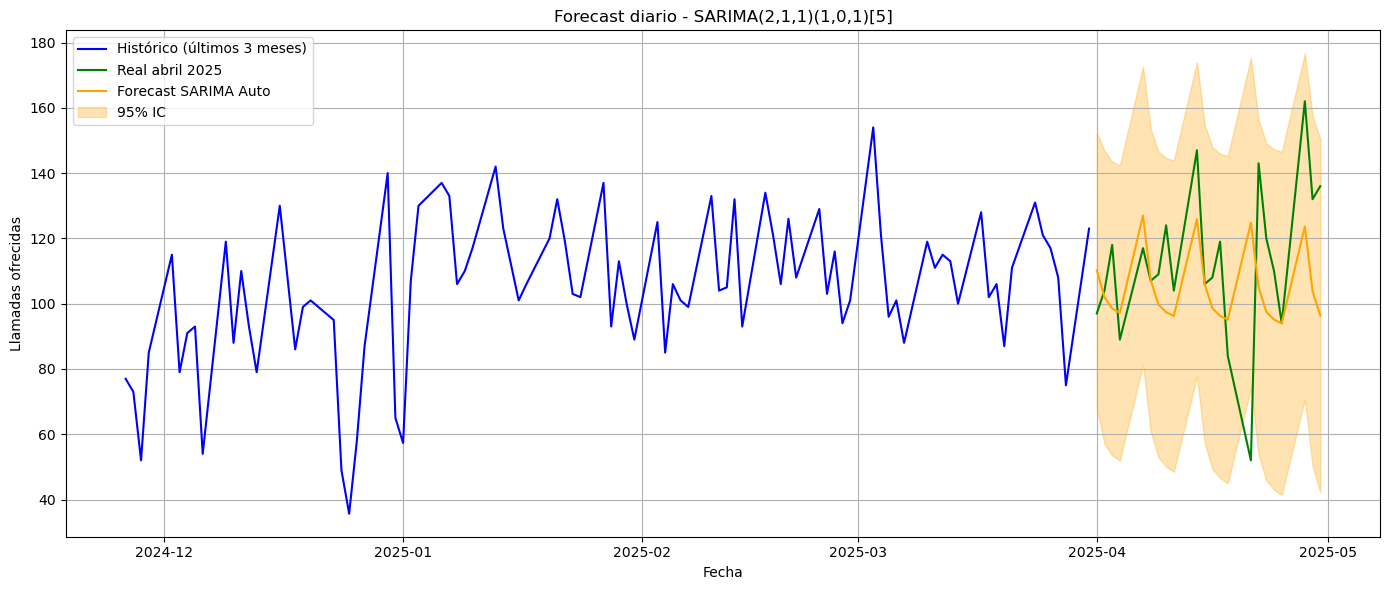

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ajustar el modelo SARIMA con parámetros de auto_arima
modelo_auto_sarima = SARIMAX(train,
                             order=(2, 1, 1),
                             seasonal_order=(1, 0, 1, 5),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
resultado_auto_sarima = modelo_auto_sarima.fit(disp=False)

# 2. Forecast
forecast_auto_sarima = resultado_auto_sarima.get_forecast(steps=len(test))
pred_auto_sarima = forecast_auto_sarima.predicted_mean
conf_int_auto_sarima = forecast_auto_sarima.conf_int()

# 3. Evaluación
mae = mean_absolute_error(test, pred_auto_sarima)
rmse = np.sqrt(mean_squared_error(test, pred_auto_sarima))
mape = np.mean(np.abs((test - pred_auto_sarima) / test.replace(0, np.nan))) * 100

print(f"📊 Evaluación SARIMA(2,1,1)(1,0,1)[5] (abril 2025):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# 4. Visualización
plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico (últimos 3 meses)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(pred_auto_sarima.index, pred_auto_sarima, label='Forecast SARIMA Auto', color='orange')
plt.fill_between(pred_auto_sarima.index,
                 conf_int_auto_sarima.iloc[:, 0],
                 conf_int_auto_sarima.iloc[:, 1],
                 color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast diario - SARIMA(2,1,1)(1,0,1)[5]')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Forecast - Columbus- Modelo XGBoost con lags y var temporales - dia de la semana y fin de mes

📊 Evaluación modelo XGBoost:
MAE: 15.97
RMSE: 22.23
MAPE: 16.67%


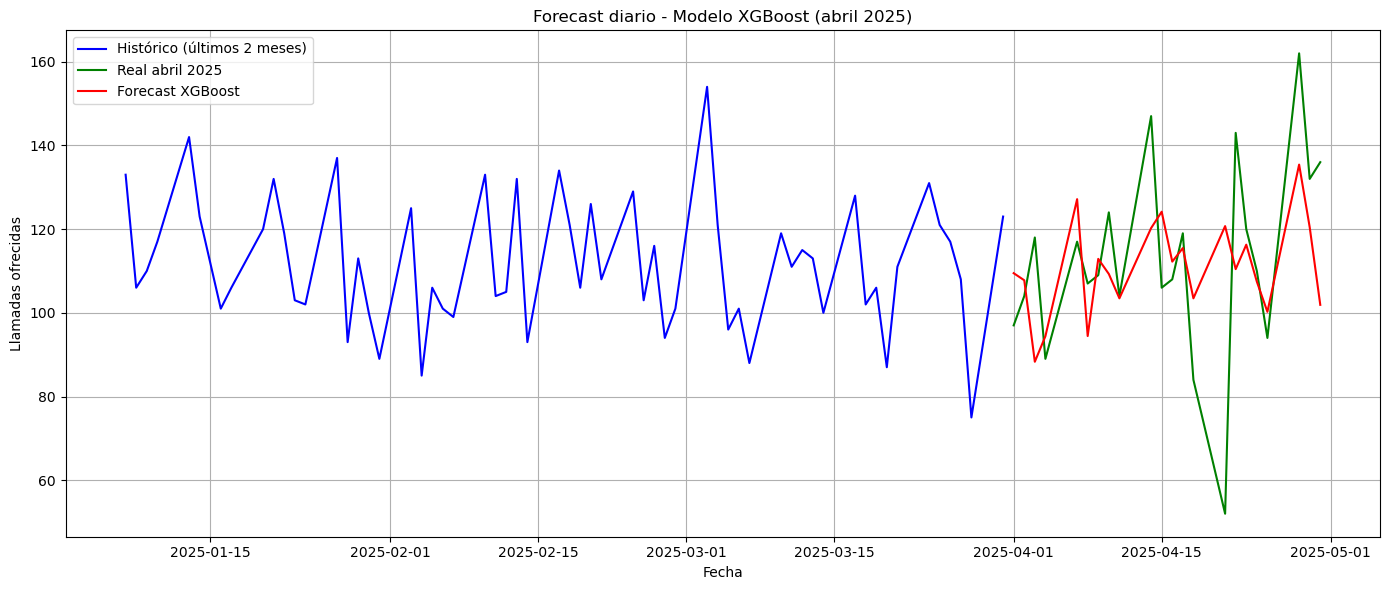

In [69]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Dataset base (serie_suavizada) debe estar definido previamente
# Filtrar últimos 3 meses del entrenamiento
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

# Crear dataset con variables derivadas
df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# Crear lags
for lag in [1, 2, 3]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# Eliminar filas con NaN (por los lags)
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

# Separar entre entrenamiento y test
X = df_features.drop(columns='y')
y = df_features['y']
X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# Ajustar modelo XGBoost (más liviano)
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predecir
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)

# Métricas
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape_xgb = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

print("📊 Evaluación modelo XGBoost:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.title('Forecast diario - Modelo XGBoost (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Se ve un outlier el dia 21/04/2025 en el set de pureba, esto se da al lunes festivo en varios paises europeos, por lo que se suaviza el dataframe de prueba




In [70]:
# Suavizar el valor del 21 de abril de 2025 en el test set
fecha_outlier = pd.Timestamp('2025-04-21')

if fecha_outlier in test.index:
    # Tomar media de los días anteriores y posteriores (usamos una ventana de 3 días)
    entorno = test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    test.loc[fecha_outlier] = entorno.mean()

    print(f"✅ Valor suavizado para {fecha_outlier.date()}: {test.loc[fecha_outlier]:.2f}")
else:
    print("⚠️ La fecha 2025-04-21 no está en el índice del test set.")

✅ Valor suavizado para 2025-04-21: 111.14


📊 Evaluación modelo XGBoost (outlier suavizado):
MAE: 13.28
RMSE: 16.84
MAPE: 11.05%


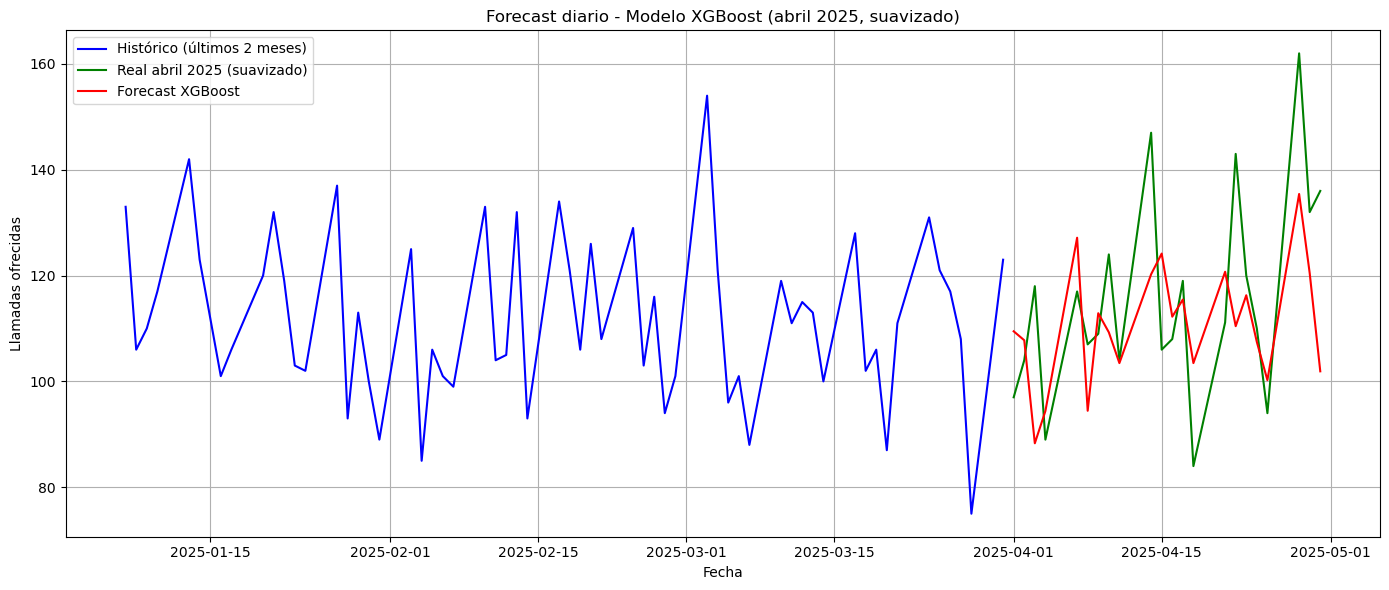

In [71]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Dataset base (serie_suavizada) debe estar definido previamente
# Filtrar últimos 3 meses del entrenamiento
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

# Crear dataset con variables derivadas
df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# Crear lags
for lag in [1, 2, 3]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# Eliminar filas con NaN (por los lags)
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

# Separar entre entrenamiento y test
X = df_features.drop(columns='y')
y = df_features['y']
X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# ✅ Suavizar outlier del 21/04/2025 en y_test
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in y_test.index:
    entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    y_test.loc[fecha_outlier] = entorno.mean()

# Ajustar modelo XGBoost (más liviano)
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predecir
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)

# Métricas
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape_xgb = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

print("📊 Evaluación modelo XGBoost (outlier suavizado):")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025 (suavizado)', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.title('Forecast diario - Modelo XGBoost (abril 2025, suavizado)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Evaluación modelo XGBoost + is_monday + is_friday:
MAE: 13.28
RMSE: 16.84
MAPE: 11.05%


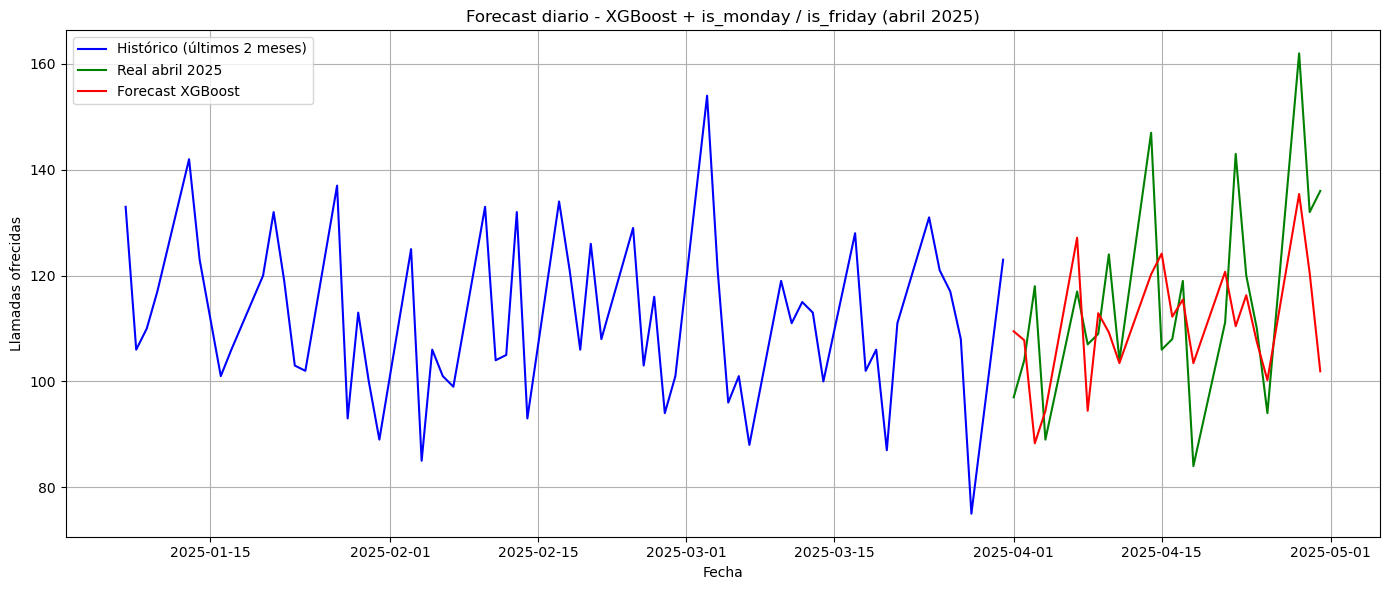

In [72]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Filtrar últimos 3 meses del entrenamiento
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

# Crear dataset con variables derivadas
df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)
df_features['is_monday'] = (df_features['dayofweek'] == 0).astype(int)
df_features['is_friday'] = (df_features['dayofweek'] == 4).astype(int)

# Crear lags
for lag in [1, 2, 3]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# Eliminar filas con NaN (por los lags)
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

# Separar entre entrenamiento y test
X = df_features.drop(columns='y')
y = df_features['y']
X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# Suavizar outlier del 21/04/2025
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in y_test.index:
    entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    y_test.loc[fecha_outlier] = entorno.mean()

# Entrenar modelo XGBoost
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predecir
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)

# Métricas
mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape_xgb = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

print("📊 Evaluación modelo XGBoost + is_monday + is_friday:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.title('Forecast diario - XGBoost + is_monday / is_friday (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


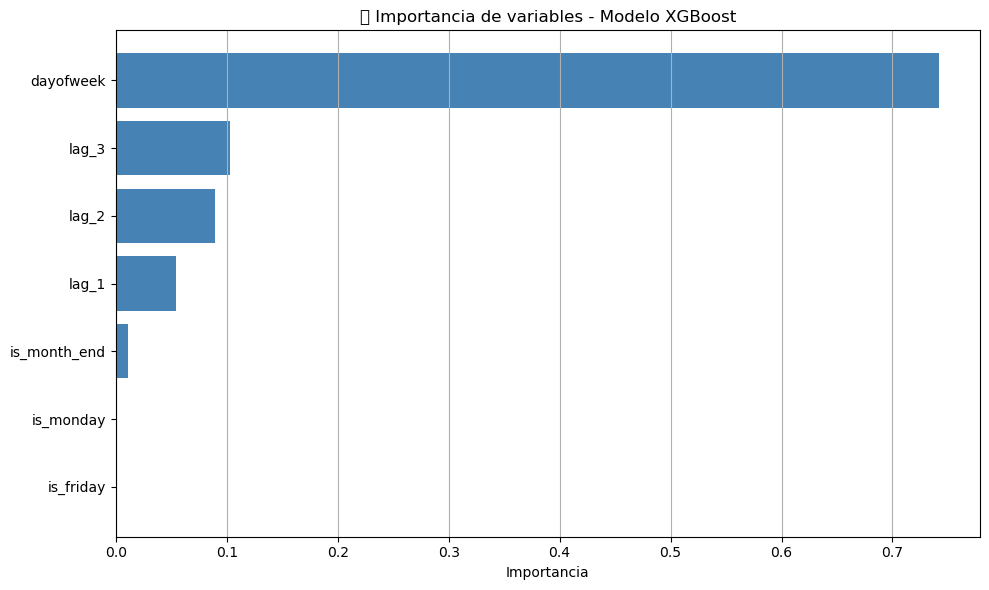

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer la importancia de cada variable del modelo XGBoost
importances = model_xgb.feature_importances_
features = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    'Feature': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='steelblue')
plt.title('📊 Importancia de variables - Modelo XGBoost')
plt.xlabel('Importancia')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


✅ Interpretación variable por variable:
Variable	Importancia	Interpretación
dayofweek	🟦 Muy alta (~75%)	Es la más influyente. El modelo aprendió que el día de la semana (lunes a viernes) es clave para predecir llamadas.
lag_3	Alta	El valor de hace 3 días también tiene bastante peso. Puede reflejar patrones de comportamiento semanal.
lag_2	Moderada	Aporta, pero menos que lag_3. Es posible que haya más ruido o irregularidad.
lag_1	Baja	El día anterior no fue tan determinante. Esto sugiere que el patrón inmediato no siempre es fuerte.
is_month_end	Muy baja	Casi irrelevante. El hecho de que un día sea fin de mes no influye mucho en las llamadas.
is_monday / is_friday	Casi 0	No aportaron nada porque esa info ya estaba codificada en dayofweek. El modelo lo aprendió directamente de ahí.

📊 Evaluación modelo XGBoost con lag_5:
MAE: 13.30
RMSE: 16.97
MAPE: 11.07%


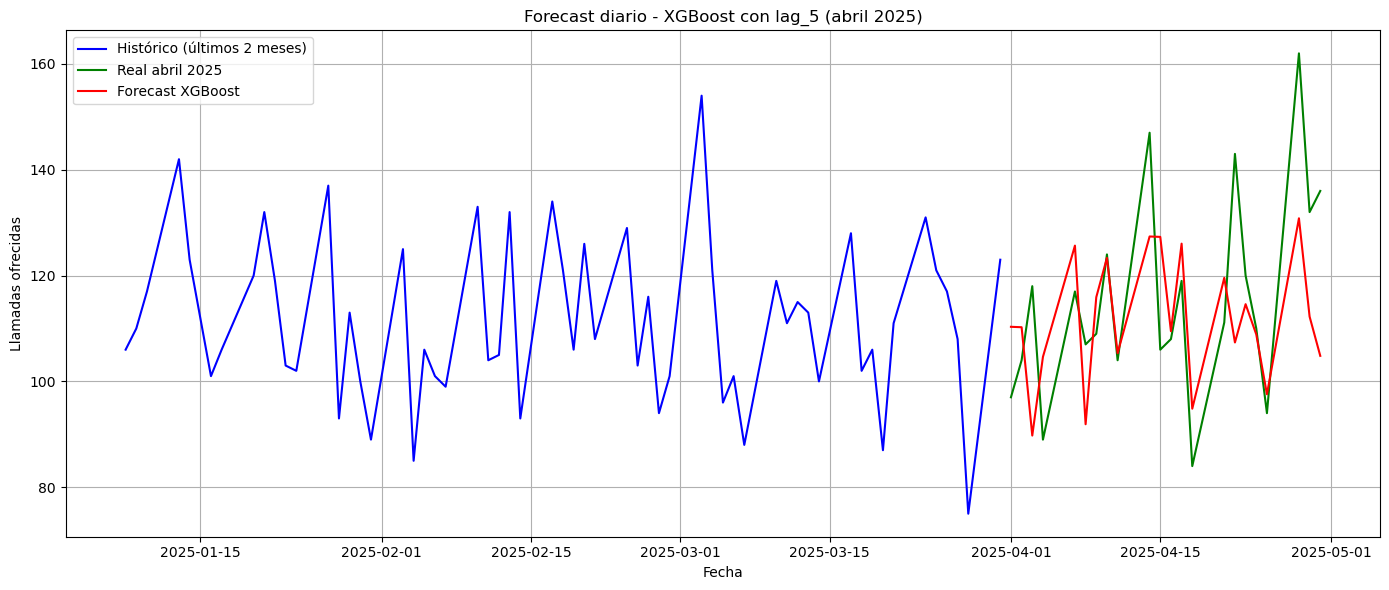

In [74]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- 1. Preparar dataset base (serie_suavizada debe estar creado) ---
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# --- 2. Crear variables lag ---
for lag in [1, 2, 3, 5]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# --- 3. Preparar dataset final ---
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

X = df_features.drop(columns='y')
y = df_features['y']

X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# --- 4. Suavizar outlier del 21/04/2025 ---
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in y_test.index:
    entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    y_test.loc[fecha_outlier] = entorno.mean()

# --- 5. Entrenar modelo ---
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# --- 6. Predecir y evaluar ---
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)
mae = mean_absolute_error(y_test, pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

print("📊 Evaluación modelo XGBoost con lag_5:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# --- 7. Visualización ---
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.title('Forecast diario - XGBoost con lag_5 (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Evaluación modelo XGBoost con lag_5:
MAE: 13.00
RMSE: 16.36
MAPE: 10.94%


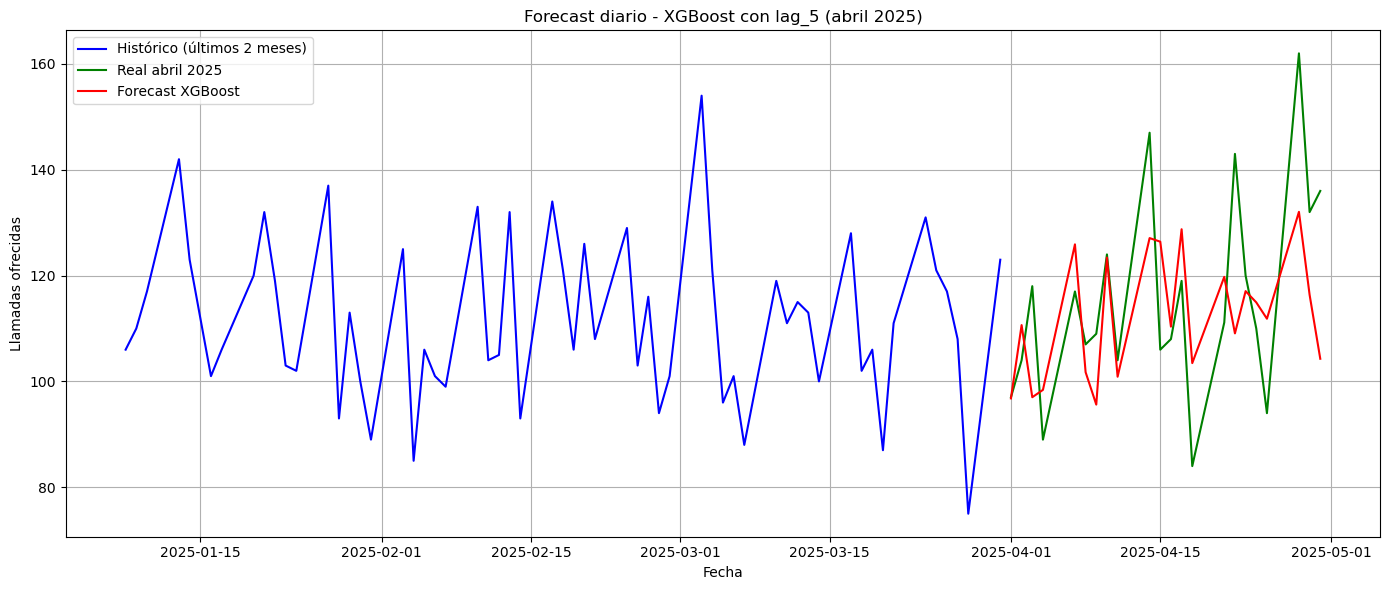

In [75]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- 1. Preparar dataset base (serie_suavizada debe estar creado) ---
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# --- 2. Crear variables lag ---
for lag in [1, 2, 3, 4, 5]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# --- 3. Preparar dataset final ---
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

X = df_features.drop(columns='y')
y = df_features['y']

X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# --- 4. Suavizar outlier del 21/04/2025 ---
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in y_test.index:
    entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    y_test.loc[fecha_outlier] = entorno.mean()

# --- 5. Entrenar modelo ---
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# --- 6. Predecir y evaluar ---
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)
mae = mean_absolute_error(y_test, pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

print("📊 Evaluación modelo XGBoost con lag_5:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# --- 7. Visualización ---
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.title('Forecast diario - XGBoost con lag_5 (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



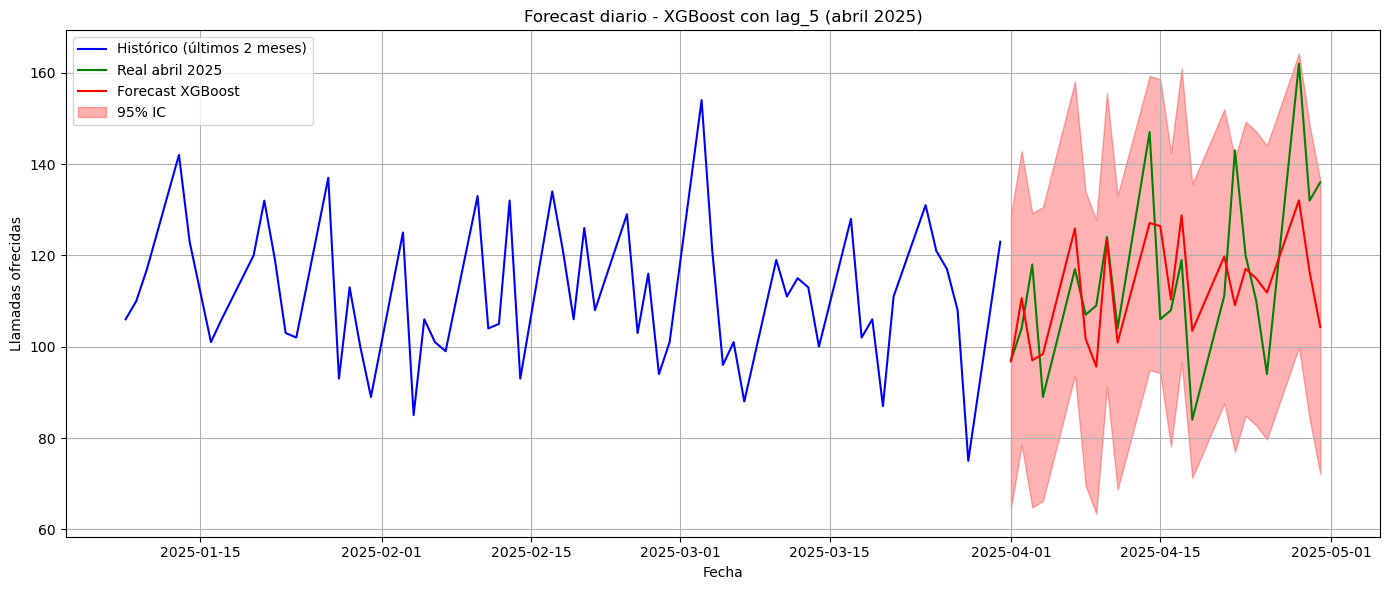

📊 Evaluación modelo XGBoost con lag_5:
MAE: 13.00
RMSE: 16.36
MAPE: 10.94%


In [76]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# --- 1. Preparar dataset base ---
serie_ultimos_3m = serie_suavizada[serie_suavizada.index >= '2025-01-01']

df_features = serie_ultimos_3m.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# --- 2. Crear variables lag ---
for lag in [1, 2, 3, 4, 5]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# --- 3. Preparar dataset final ---
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

X = df_features.drop(columns='y')
y = df_features['y']

X_train = X[X.index <= '2025-03-31']
X_test = X[(X.index >= '2025-04-01') & (X.index <= '2025-04-30')]
y_train = y[y.index <= '2025-03-31']
y_test = y[(y.index >= '2025-04-01') & (y.index <= '2025-04-30')]

# --- 4. Suavizar outlier del 21/04/2025 ---
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in y_test.index:
    entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    y_test.loc[fecha_outlier] = entorno.mean()

# --- 5. Entrenar modelo ---
model_xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# --- 6. Predecir y evaluar ---
pred_xgb = pd.Series(model_xgb.predict(X_test), index=X_test.index)
mae = mean_absolute_error(y_test, pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
mape = np.mean(np.abs((y_test - pred_xgb) / y_test.replace(0, np.nan))) * 100

# --- 7. Intervalo de confianza del 95% ---
residuos = y_test - pred_xgb
std_error = residuos.std()
ci_upper = pred_xgb + 1.96 * std_error
ci_lower = pred_xgb - 1.96 * std_error

# --- 8. Visualización ---
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico (últimos 2 meses)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(pred_xgb.index, pred_xgb, label='Forecast XGBoost', color='red')
plt.fill_between(pred_xgb.index, ci_lower, ci_upper, color='red', alpha=0.3, label='95% IC')
plt.title('Forecast diario - XGBoost con lag_5 (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 9. Métricas ---
print("📊 Evaluación modelo XGBoost con lag_5:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


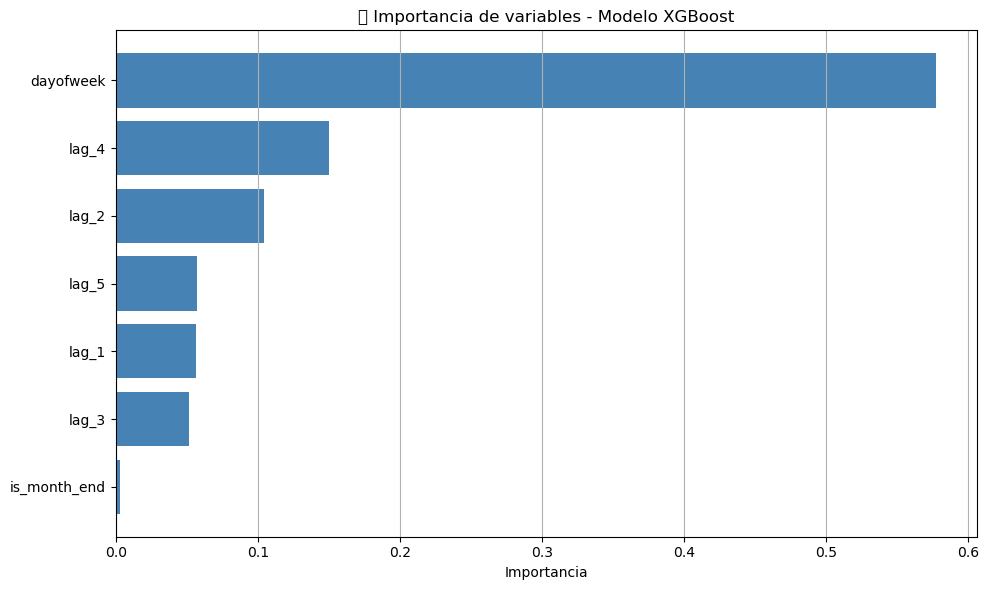

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer la importancia de cada variable del modelo XGBoost
importances = model_xgb.feature_importances_
features = X_train.columns

# Crear DataFrame ordenado
importancia_df = pd.DataFrame({
    'Feature': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
plt.barh(importancia_df['Feature'], importancia_df['Importancia'], color='steelblue')
plt.title('📊 Importancia de variables - Modelo XGBoost')
plt.xlabel('Importancia')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

📊 Comparación de métricas por modelo:
                 Modelo    MAE   RMSE   MAPE
0                SARIMA  14.93  18.53  12.12
1          Holt-Winters  15.76  19.48  12.76
2        Descomposición  17.25  22.83  14.32
3  XGBoost (Optimizado)  13.00  16.36  10.94


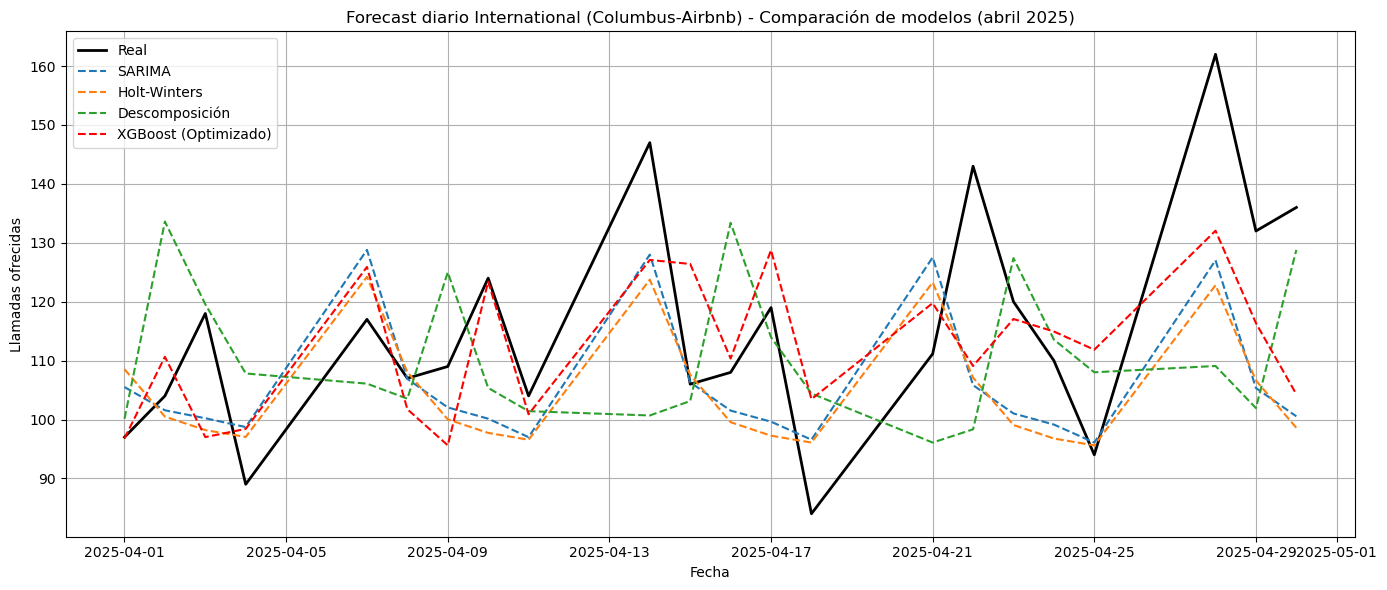

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Consolidar resultados en un DataFrame
df_comparacion = pd.DataFrame({
    'Real': test.values,
    'SARIMA': pred_sarima.values,
    'Holt-Winters': forecast_hw.values,
    'Descomposición': predictions_decomp[:len(test)],
    'XGBoost': pred_xgb[:len(test)]
}, index=test.index)

# 2. Función para métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true.replace(0, np.nan))) * 100
    return mae, rmse, mape

# 3. Calcular métricas para cada modelo
mae_sarima, rmse_sarima, mape_sarima = calcular_metricas(df_comparacion['Real'], df_comparacion['SARIMA'])
mae_hw, rmse_hw, mape_hw = calcular_metricas(df_comparacion['Real'], df_comparacion['Holt-Winters'])
mae_decomp, rmse_decomp, mape_decomp = calcular_metricas(df_comparacion['Real'], df_comparacion['Descomposición'])
mae_xgb, rmse_xgb, mape_xgb = calcular_metricas(df_comparacion['Real'], df_comparacion['XGBoost'])

# 4. Crear tabla resumen
resultados_modelos = pd.DataFrame({
    'Modelo': ['SARIMA', 'Holt-Winters', 'Descomposición', 'XGBoost (Optimizado)'],
    'MAE': [mae_sarima, mae_hw, mae_decomp, mae_xgb],
    'RMSE': [rmse_sarima, rmse_hw, rmse_decomp, rmse_xgb],
    'MAPE': [mape_sarima, mape_hw, mape_decomp, mape_xgb]
}).round(2)

print("📊 Comparación de métricas por modelo:")
print(resultados_modelos)

# 5. Gráfico comparativo
plt.figure(figsize=(14, 6))
plt.plot(df_comparacion.index, df_comparacion['Real'], label='Real', color='black', linewidth=2)
plt.plot(df_comparacion.index, df_comparacion['SARIMA'], label='SARIMA', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Holt-Winters'], label='Holt-Winters', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['Descomposición'], label='Descomposición', linestyle='--')
plt.plot(df_comparacion.index, df_comparacion['XGBoost'], label='XGBoost (Optimizado)', linestyle='--', color='red')
plt.title('Forecast diario International (Columbus-Airbnb) - Comparación de modelos (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
std_pct = test.std() / test.mean() * 100
print(f"📉 Desviación típica relativa: {std_pct:.2f}%")
print(f"📊 MAPE del modelo (XGBoost): {mape_xgb:.2f}%")


📉 Desviación típica relativa: 16.67%
📊 MAPE del modelo (XGBoost): 10.94%


### Forecast futuro con XGBoost (hasta fin de 2025)

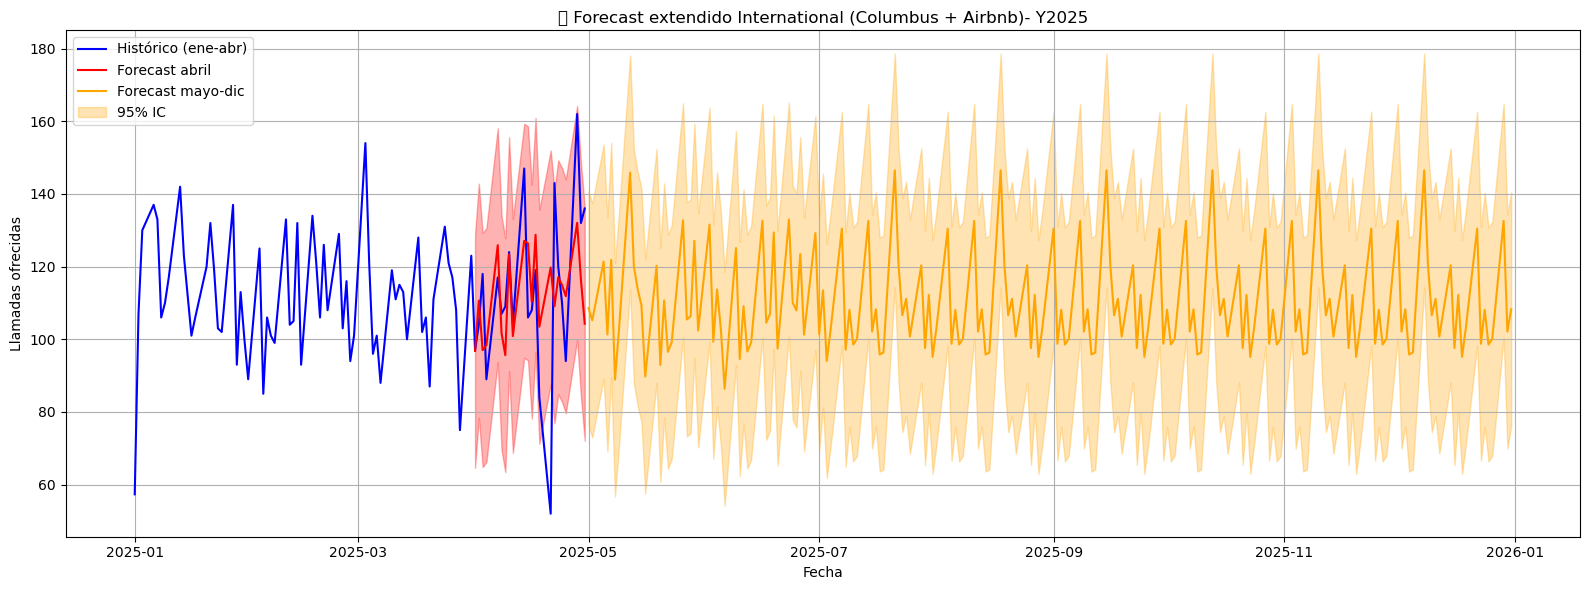

In [ ]:
# --- Forecast extendido XGBoost hasta diciembre 2025 con IC 95% ---

# 1. Base para fechas futuras
# future_dates = pd.date_range(start='2025-05-01', end='2025-12-31', freq='D') # tomas los dias de lunes a domingo 
future_dates = pd.date_range(start='2025-05-01', end='2025-12-31', freq='B')  # Solo business days (lunes a viernes)

future_df = pd.DataFrame(index=future_dates)
future_df['dayofweek'] = future_df.index.dayofweek
future_df['is_month_end'] = future_df.index.is_month_end.astype(int)

# 2. Usar la serie 'y' original como base para los lags
lag_base = y.copy()
future_preds = []

# 3. Generar predicciones en cascada día por día
for fecha in future_df.index:
    lags = [lag_base[-i] for i in [1, 2, 3, 4, 5]]
    input_data = pd.DataFrame({
        'lag_1': [lags[0]],
        'lag_2': [lags[1]],
        'lag_3': [lags[2]],
        'lag_4': [lags[3]],
        'lag_5': [lags[4]],
        'dayofweek': [fecha.dayofweek],
        'is_month_end': [int(fecha.is_month_end)]
    }, index=[fecha])

    # 🔧 Reordenar columnas según el orden original de entrenamiento
    input_data = input_data[X_train.columns]

    pred = model_xgb.predict(input_data)[0]
    future_preds.append(pred)
    lag_base.loc[fecha] = pred

# 4. Intervalo de confianza
residuos = y_test - model_xgb.predict(X_test)
std_error = residuos.std()
forecast_array = np.array(future_preds)
ci_upper = forecast_array + 1.96 * std_error
ci_lower = forecast_array - 1.96 * std_error

# 5. Consolidar en DataFrame
df_forecast_extendido = pd.DataFrame({
    'forecast': forecast_array,
    'ci_upper': ci_upper,
    'ci_lower': ci_lower
}, index=future_dates)

# 6. Gráfico
plt.figure(figsize=(16, 6))
plt.plot(serie_suavizada.loc['2025-01-01':'2025-04-30'], label='Histórico (ene-abr)', color='blue')
plt.plot(y_test.index, model_xgb.predict(X_test), label='Forecast abril', color='red')
plt.fill_between(y_test.index,
                 model_xgb.predict(X_test) - 1.96 * std_error,
                 model_xgb.predict(X_test) + 1.96 * std_error,
                 color='red', alpha=0.3)

plt.plot(df_forecast_extendido.index, df_forecast_extendido['forecast'], label='Forecast mayo-dic', color='orange')
plt.fill_between(df_forecast_extendido.index,
                 df_forecast_extendido['ci_lower'],
                 df_forecast_extendido['ci_upper'],
                 color='orange', alpha=0.3, label='95% IC')

plt.title('📈 Forecast extendido International (Columbus + Airbnb)- Y2025')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [129]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display
import matplotlib.pyplot as plt

# --- 1. Rango de fechas para predicción: solo días hábiles ---
future_df = pd.date_range(start='2025-05-01', end='2025-12-31', freq='B')  # Business days

# --- 2. Crear base inicial con la última parte del histórico suavizado ---
lag_base = serie_suavizada.copy()

# --- 3. Hacer predicciones iterativas ---
future_preds = []

for fecha in future_df:
    # Obtener lags más recientes
    lags = [lag_base[-i] for i in [1, 2, 3, 4, 5]]
    
    # Crear input con variables derivadas
    input_data = pd.DataFrame({
        'lag_1': [lags[0]],
        'lag_2': [lags[1]],
        'lag_3': [lags[2]],
        'lag_4': [lags[3]],
        'lag_5': [lags[4]],
        'dayofweek': [fecha.dayofweek],
        'is_month_end': [int(fecha.is_month_end)]
    }, index=[fecha])

    # Asegurar orden correcto de columnas
    input_data = input_data[X_train.columns]

    # Predecir y guardar
    pred = model_xgb.predict(input_data)[0]
    future_preds.append(pred)
    lag_base.loc[fecha] = pred  # extender serie

# --- 4. Crear tabla de resultados ---
df_forecast = pd.DataFrame({
    'Fecha': future_df,
    'Día de la semana': future_df.strftime('%A'),
    'Llamadas Forecast': np.round(future_preds).astype(int)
})
df_forecast['Fecha'] = df_forecast['Fecha'].dt.strftime('%Y-%m-%d')

# --- 5. Mostrar tabla ---
print("📅 Forecast diario de llamadas (solo días hábiles, mayo a dic 2025):")
display(df_forecast.head(20))


📅 Forecast diario de llamadas (solo días hábiles, mayo a dic 2025):


Fecha Día de la semana  Llamadas Forecast
0   2025-05-01         Thursday                109
1   2025-05-02           Friday                105
2   2025-05-05           Monday                121
3   2025-05-06          Tuesday                101
4   2025-05-07        Wednesday                122
5   2025-05-08         Thursday                 89
6   2025-05-09           Friday                102
7   2025-05-12           Monday                146
8   2025-05-13          Tuesday                120
9   2025-05-14        Wednesday                114
10  2025-05-15         Thursday                109
11  2025-05-16           Friday                 90
12  2025-05-19           Monday                120
13  2025-05-20          Tuesday                 93
14  2025-05-21        Wednesday                111
15  2025-05-22         Thursday                 97
16  2025-05-23           Friday                 99
17  2025-05-26           Monday                133
18  2025-05-27          Tuesday                105
19  2025-05-28        Wednesday                106

## Perfilado de idiomas - International (Columbus + Airbnb)

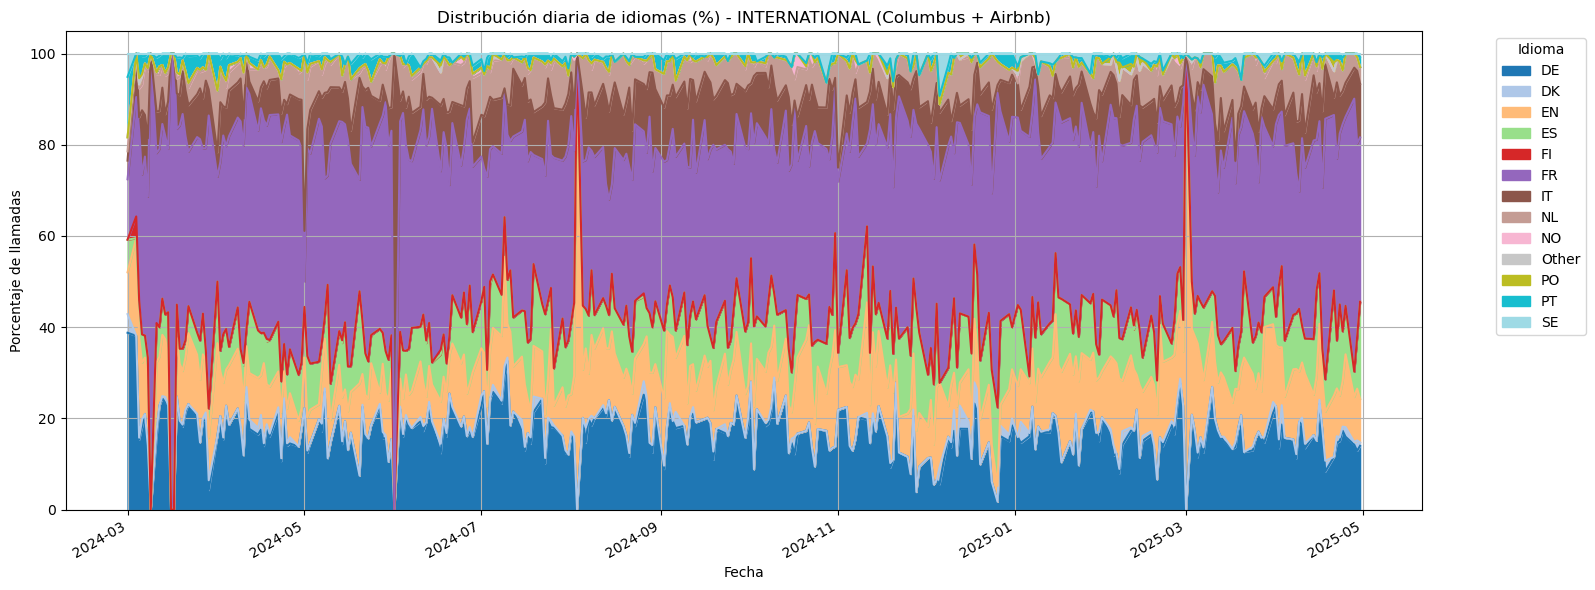

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar datos de INTERNATIONAL (Columbus + Airbnb)
df_international = df_llamadas[df_llamadas['cliente'].isin(['COLUMBUS', 'AIRBNB'])].copy()
df_international['date'] = pd.to_datetime(df_international['date_time'].dt.date)

# 2. Agrupar llamadas por día e idioma
df_idioma = df_international.groupby(['date', 'idioma'])['Offered'].sum().unstack(fill_value=0)

# 3. Calcular porcentaje diario por idioma
df_pct = df_idioma.div(df_idioma.sum(axis=1), axis=0) * 100

# 4. Plot de área apilada
plt.figure(figsize=(16, 6))
df_pct.plot.area(ax=plt.gca(), colormap='tab20')
plt.title('Distribución diaria de idiomas (%) - INTERNATIONAL (Columbus + Airbnb)')
plt.ylabel('Porcentaje de llamadas')
plt.xlabel('Fecha')
plt.legend(title='Idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


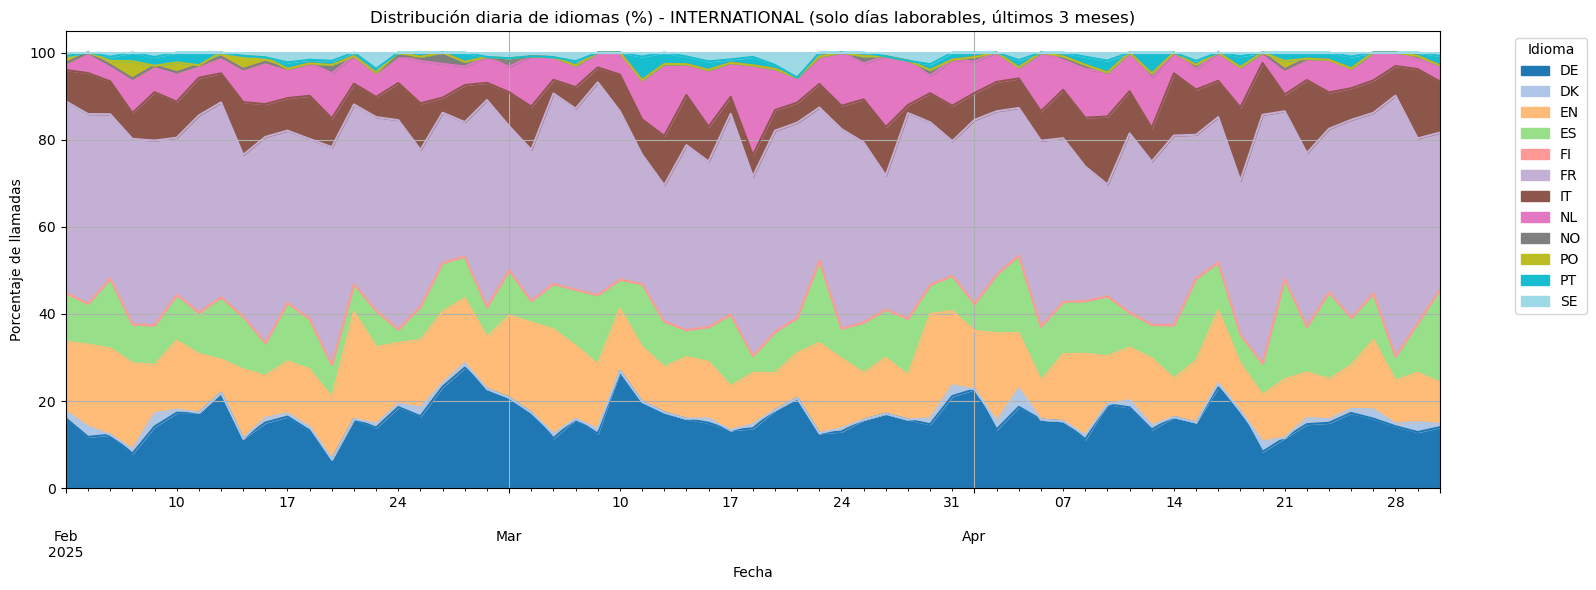

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar INTERNATIONAL, últimos 3 meses y días laborables
df_international = df_llamadas[df_llamadas['cliente'].isin(['COLUMBUS', 'AIRBNB'])].copy()
df_international['date'] = pd.to_datetime(df_international['date_time'].dt.date)
df_international['weekday'] = df_international['date_time'].dt.weekday  # lunes=0, domingo=6
df_international = df_international[
    (df_international['date'] >= '2025-02-01') &
    (df_international['weekday'] <= 4)  # solo lunes a viernes
]

# 2. Agrupar por día e idioma
df_idioma = df_international.groupby(['date', 'idioma'])['Offered'].sum().unstack(fill_value=0)

# 3. Calcular porcentaje diario por idioma
df_pct = df_idioma.div(df_idioma.sum(axis=1), axis=0) * 100

# 4. Plot de área apilada
plt.figure(figsize=(16, 6))
df_pct.plot.area(ax=plt.gca(), colormap='tab20')
plt.title('Distribución diaria de idiomas (%) - INTERNATIONAL (solo días laborables, últimos 3 meses)')
plt.ylabel('Porcentaje de llamadas')
plt.xlabel('Fecha')
plt.legend(title='Idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Test Hipotesis - Idiomas

📌 Formulación
Hipótesis nula (H₀): el porcentaje de llamadas por idioma no varía significativamente entre días (es decir, las proporciones son homogéneas).

Hipótesis alternativa (H₁): sí hay diferencias significativas en las proporciones de idiomas según el día

In [132]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Filtrar INTERNATIONAL (solo Columbus + Airbnb)
df_international = df_llamadas[df_llamadas['cliente'].isin(['COLUMBUS', 'AIRBNB'])].copy()
df_international['date'] = df_international['date_time'].dt.date
df_international['weekday'] = df_international['date_time'].dt.weekday

# 2. Últimos 3 meses y días laborales (lunes a viernes -> 0 a 4)
df_international = df_international[
    (df_international['date'] >= pd.to_datetime('2025-01-01').date()) &
    (df_international['weekday'] <= 4)
]

# 3. Crear tabla de cantidad de llamadas por día e idioma
tabla_absoluta = pd.pivot_table(df_international,
                                 index='date',
                                 columns='idioma',
                                 values='Offered',
                                 aggfunc='sum',
                                 fill_value=0)

# 4. Convertir a proporciones por fila
tabla_proporcional = tabla_absoluta.div(tabla_absoluta.sum(axis=1), axis=0)

# 5. Test de Chi-cuadrado sobre proporciones
# Transponer para aplicar el test correctamente (idiomas como filas)
chi2, p_valor, dof, expected = chi2_contingency(tabla_proporcional.T)

# 6. Resultados
print("📊 Test de Chi-cuadrado sobre proporciones por idioma:")
print(f"Estadístico chi²: {chi2:.2f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("❌ Rechazamos H₀: las proporciones por idioma NO son constantes entre días.")
else:
    print("✅ No se rechaza H₀: las proporciones por idioma se mantienen constantes entre días.")


📊 Test de Chi-cuadrado sobre proporciones por idioma:
Estadístico chi²: 14.47
Grados de libertad: 1008
Valor p: 1.0000
✅ No se rechaza H₀: las proporciones por idioma se mantienen constantes entre días.


In [133]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Preparar dataframe con mes, fecha, idioma
df_international = df_llamadas[df_llamadas['cliente'].isin(['COLUMBUS', 'AIRBNB'])].copy()
df_international['date'] = pd.to_datetime(df_international['date_time'].dt.date)
df_international['month'] = df_international['date'].dt.to_period('M')

# 2. Filtrar últimos 4 meses y días laborales
df_international['weekday'] = df_international['date'].dt.weekday
df_international = df_international[
    (df_international['month'] >= '2025-01') & (df_international['weekday'] <= 4)
]


# 5. Reescalar proporciones a enteros para usar chi2_contingency
tabla_para_test = (tabla_porcentajes * 1000).round().astype(int)  # Escalamos a evitar decimales

# 6. Test de chi-cuadrado
chi2, p_valor, dof, expected = chi2_contingency(tabla_para_test)

# 7. Resultado
print("📊 Test de Chi-cuadrado sobre proporciones por mes:")
print(f"Estadístico chi²: {chi2:.2f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p_valor:.4f}")

if p_valor < 0.05:
    print("❌ Rechazamos H₀: las proporciones de idiomas cambian entre los meses.")
else:
    print("✅ No se rechaza H₀: las proporciones de idiomas son similares entre meses.")


📊 Test de Chi-cuadrado sobre proporciones por mes:
Estadístico chi²: 5545.65
Grados de libertad: 36
Valor p: 0.0000
❌ Rechazamos H₀: las proporciones de idiomas cambian entre los meses.


<Figure size 1200x600 with 0 Axes>

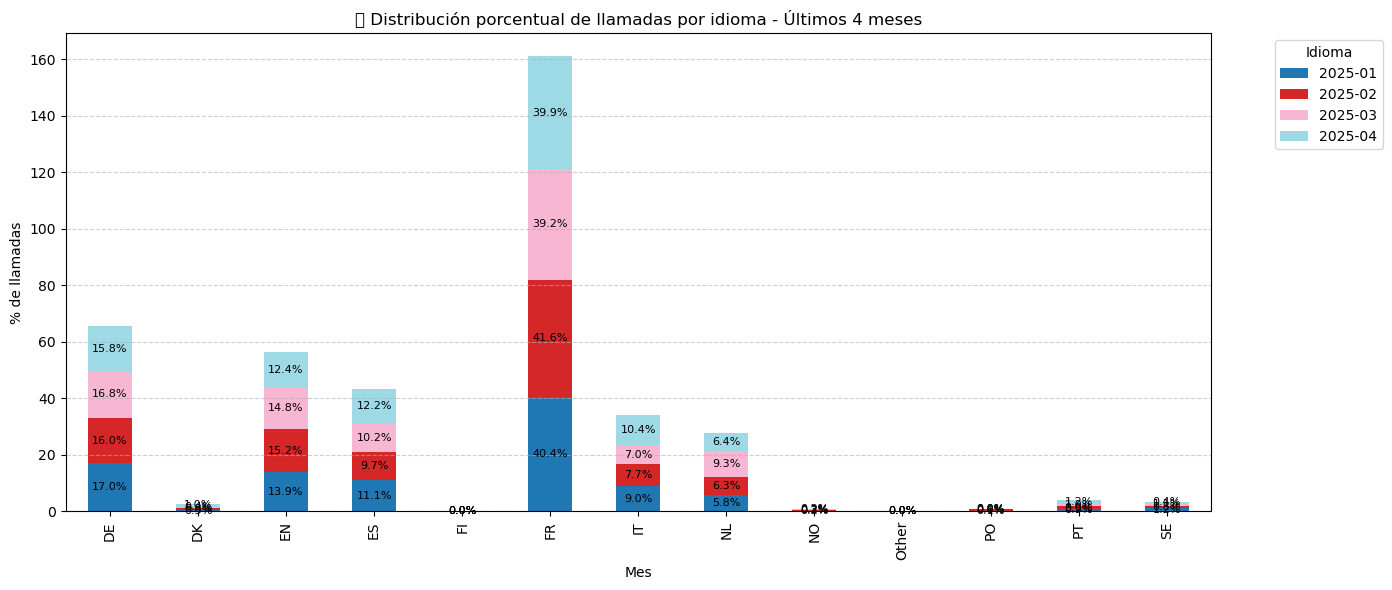

In [134]:
import matplotlib.pyplot as plt

# --- 1. Reutilizamos el DataFrame de proporciones por mes ---
# (`tabla_porcentajes`)

# --- 2. Gráfico de barras apiladas ---
plt.figure(figsize=(12, 6))
tabla_porcentajes.T.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 6))

plt.title('📶 Distribución porcentual de llamadas por idioma - Últimos 4 meses')
plt.ylabel('% de llamadas')
plt.xlabel('Mes')
plt.legend(title='Idioma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.6) 

# Etiqueta de datos
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', label_type='center', fontsize=8)

plt.tight_layout()
plt.show()


📊 Lo que se observa:

Idiomas dominantes:

-FR (Francés) es con diferencia el idioma más representado, con una participación muy estable entre el 39 % y 41 % cada mes.
-Le siguen DE (Alemán) 16%-17%, EN (Inglés) 12,4%- 15,2% y ES (Español) 10-12% y el IT (Italiano)7-10% 

Variación leve:
-Aunque hay pequeñas fluctuaciones (por ejemplo, EN baja un poco en abril respecto a enero), no hay cambios abruptos o transiciones importantes en las proporciones mes a mes.
-Este comportamiento sugiere cierta estacionalidad o patrón estable de uso por idioma.

Idiomas minoritarios:
-Idiomas como DK, NO, PO, SE tienen una participación muy baja y estable. No contribuyen significativamente al total, por lo tanto no afectan el perfil general.

#### 🧠 Conclusión:
Aunque el test chi-cuadrado sobre proporciones puede haber rechazado la hipótesis de igualdad perfecta, visualmente parece que las variaciones son menores, especialmente entre los idiomas principales. Esto da una base válida para hacer el forecast desglosado por idioma, asumiendo proporciones constantes

In [135]:
tabla_porcentajes.head(20)


idioma          DE        DK         EN         ES        FI         FR  \
month                                                                     
2025-01  16.982622  0.473934  13.941548  11.097946  0.000000  40.363349   
2025-02  15.983791  0.810446  15.173345   9.725349  0.045025  41.602882   
2025-03  16.759777  0.386764  14.782982  10.227761  0.000000  39.192093   
2025-04  15.753425  1.007252  12.449637  12.167607  0.000000  39.927478   

idioma          IT        NL        NO     Other        PO        PT        SE  
month                                                                           
2025-01   8.965245  5.845182  0.157978  0.039494  0.078989  0.868878  1.184834  
2025-02   7.654210  6.258442  0.315173  0.000000  0.765421  0.900495  0.765421  
2025-03   6.961753  9.325312  0.214869  0.000000  0.042974  0.988397  1.117318  
2025-04  10.435133  6.365834  0.241741  0.000000  0.040290  1.208703  0.402901

In [136]:
#preparacion dataframe para distribucion porcentual de llamadas por idioma

import pandas as pd

# 1. Calcular el promedio de cada columna (idioma)
serie_promedios = tabla_porcentajes.mean(axis=0)

# 2. Convertirlo en DataFrame de una sola fila
df_promedios_idioma = serie_promedios.to_frame(name='Promedio %').T

# 3. (Opcional) redondear a 2 decimales
df_promedios_idioma = df_promedios_idioma.round(2)

# 4. Mostrar el resultado
print("📊 Promedio % de llamadas por idioma (ene–abr 2025):")
display(df_promedios_idioma)


📊 Promedio % de llamadas por idioma (ene–abr 2025):


idioma         DE    DK     EN    ES    FI     FR   IT    NL    NO  Other  \
Promedio %  16.37  0.67  14.09  10.8  0.01  40.27  8.5  6.95  0.23   0.01   

idioma        PO    PT    SE  
Promedio %  0.23  0.99  0.87

In [137]:
df_forecast.info()
df_forecast.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              175 non-null    object
 1   Día de la semana   175 non-null    object
 2   Llamadas Forecast  175 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ KB


Llamadas Forecast
count         175.000000
mean          109.405714
std            13.713026
min            86.000000
25%            99.000000
50%           107.000000
75%           120.000000
max           146.000000

In [138]:
df_forecast.tail(20)

Fecha Día de la semana  Llamadas Forecast
155  2025-12-04         Thursday                 96
156  2025-12-05           Friday                 96
157  2025-12-08           Monday                146
158  2025-12-09          Tuesday                120
159  2025-12-10        Wednesday                107
160  2025-12-11         Thursday                111
161  2025-12-12           Friday                101
162  2025-12-15           Monday                120
163  2025-12-16          Tuesday                 98
164  2025-12-17        Wednesday                112
165  2025-12-18         Thursday                 95
166  2025-12-19           Friday                103
167  2025-12-22           Monday                130
168  2025-12-23          Tuesday                 99
169  2025-12-24        Wednesday                108
170  2025-12-25         Thursday                 99
171  2025-12-26           Friday                100
172  2025-12-29           Monday                133
173  2025-12-30          Tuesday                102
174  2025-12-31        Wednesday                108

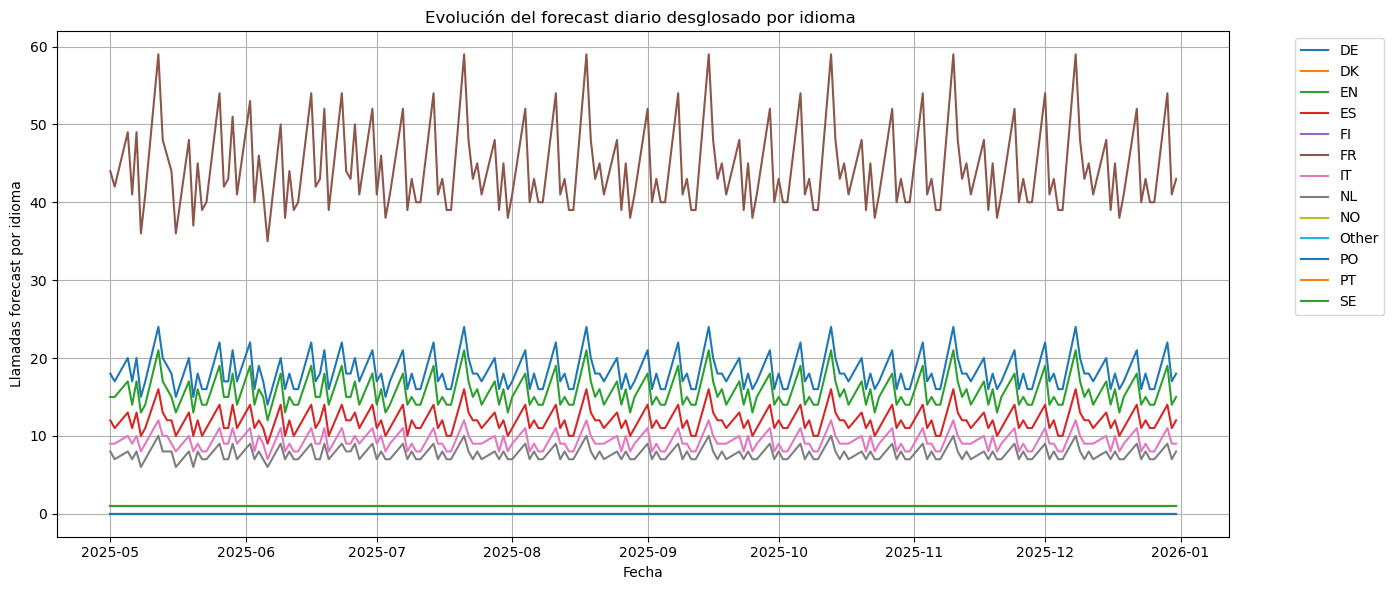

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Preparar df_forecast ---
df_forecast['Fecha'] = pd.to_datetime(df_forecast['Fecha'])
df_forecast.set_index('Fecha', inplace=True)

# --- 2. Extraer proporciones como fracción ---
proportions = df_promedios_idioma.loc['Promedio %'] / 100.0

# --- 3. Calcular y redondear forecast por idioma ---
for idioma, frac in proportions.items():
    df_forecast[f'forecast_{idioma}'] = (
        df_forecast['Llamadas Forecast'] * frac
    ).round().astype(int)

# --- 4. Graficar evolución ---
plt.figure(figsize=(14, 6))
for idioma in proportions.index:
    plt.plot(
        df_forecast.index,
        df_forecast[f'forecast_{idioma}'],
        label=idioma
    )

plt.title('Evolución del forecast diario desglosado por idioma ')
plt.xlabel('Fecha')
plt.ylabel('Llamadas forecast por idioma')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
from pathlib import Path

# 1. Detectar la raíz del proyecto de forma dinámica
cwd = Path.cwd()
# Si estamos dentro de la carpeta "notebooks", subimos un nivel
project_root = cwd.parent if cwd.name == "notebooks" else cwd

# 2. Definir carpeta relativa data/processed y crearla si no existe
output_dir = project_root / "data" / "processed"
output_dir.mkdir(parents=True, exist_ok=True)

# 3. Guardar únicamente en formato Excel
excel_path = output_dir / "forecast_diario_idiomas.xlsx"
df_forecast.to_excel(excel_path, index=True, sheet_name="Forecast")

print(f"✅ 📁Archivo guardado en: {excel_path}")



✅ Archivo guardado en: c:\Users\gcasc\proyectos\proyecto_final\data\processed\forecast_diario_idiomas.xlsx


# Forecast-AMEX


## Revision de datos historicos para Forecast


In [148]:
import pandas as pd

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df_llamadas_amex = pd.read_excel(archivo, sheet_name='call_volumen')
df_llamadas_amex['date_time'] = pd.to_datetime(df_llamadas_amex['date_time'])

# 2. Filtrar solo AIRBNB y COLUMBUS
df_filtrado_amex = df_llamadas_amex[df_llamadas_amex['cliente'].isin(['AMEX'])].copy()

# 3. Eliminar sábados (5) y domingos (6)
df_filtrado_amex['weekday'] = df_filtrado_amex['date_time'].dt.weekday  # 0=Lunes, 6=Domingo
df_limpio_amex = df_filtrado_amex[df_filtrado['weekday'] < 5].copy()  # Solo lunes a viernes

# 4. (Opcional) Crear columnas útiles adicionales
df_limpio_amex['fecha'] = df_limpio_amex['date_time'].dt.date
df_limpio_amex['hora'] = df_limpio_amex['date_time'].dt.time

# 5. Verificar resultados
print(df_limpio_amex[['date_time', 'cliente', 'weekday', 'Offered']].head())
print(f"\nNúmero total de registros: {len(df_limpio)}")


            date_time cliente  weekday  Offered
0 2025-04-04 11:15:00    AMEX        4        1
1 2025-04-01 11:30:00    AMEX        1        1
3 2025-02-03 14:45:00    AMEX        0        1
5 2025-04-15 11:15:00    AMEX        1        1
6 2025-03-11 11:15:00    AMEX        1        1

Número total de registros: 46894


## Modelado de Forecast x dia - AMEX

### Holt-Winter

📉 MAPE abril 2025 (AMEX, Holt-Winters): 37.64%
📊 MAE  abril 2025: 128.11
📈 RMSE abril 2025: 183.07


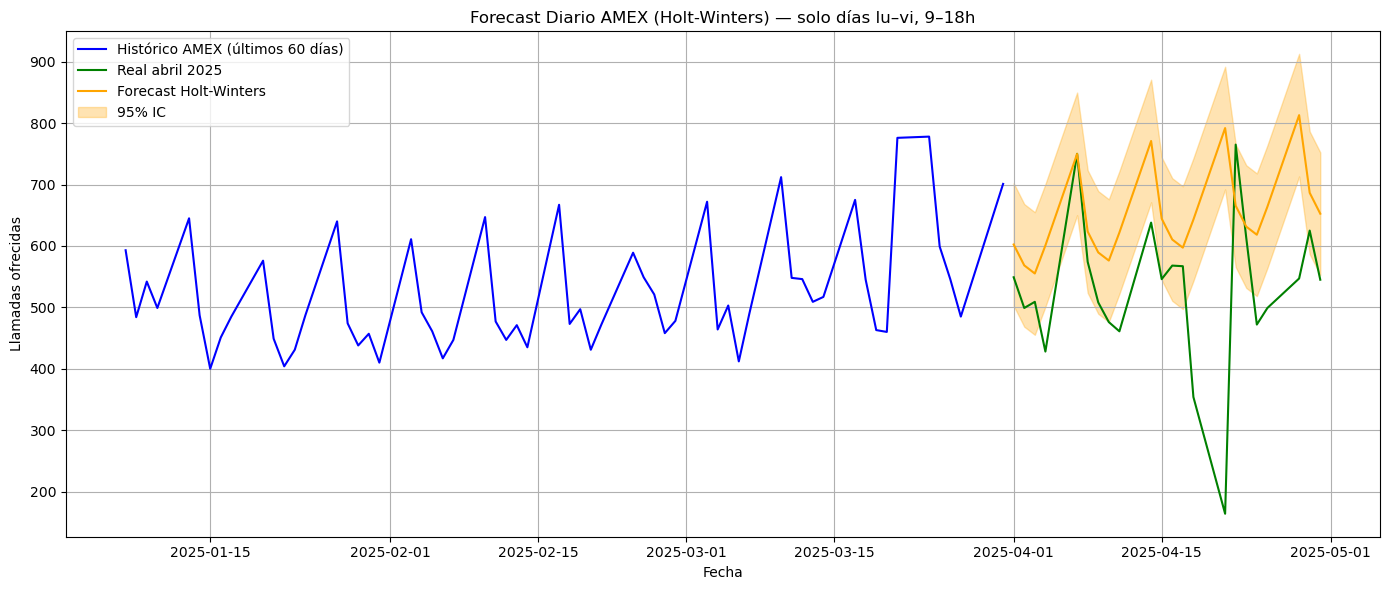

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(archivo, sheet_name='call_volumen')
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtrar AMEX, días laborales (lu–vi) y jornada de 9 a 18h
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Agregar por fecha
serie_amex = (
    df_amex
    .groupby(df_amex['date_time'].dt.date)['Offered']
    .sum()
)
# Convertir índice a datetime (solo días lu–vi)
serie_amex.index = pd.to_datetime(serie_amex.index)

# 4. Split entrenamiento (hasta 31/03) y test (01/04–30/04)
train = serie_amex[(serie_amex.index >= '2025-01-02') & (serie_amex.index <= '2025-03-31')]
test  = serie_amex[(serie_amex.index >= '2025-04-01') & (serie_amex.index <= '2025-04-30')]

# 5. Ajustar Holt-Winters (aditivo, estacionalidad semanal ≈ 5 días)
hw = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=5
).fit()
forecast_hw = hw.forecast(steps=len(test))

# 6. Intervalo de confianza 95%
std_err = np.std(hw.resid)
ci_up = forecast_hw + 1.96 * std_err
ci_lo = forecast_hw - 1.96 * std_err

# 7. Métricas (excluyendo días con valor real 0 para MAPE)
mask_nonzero = test > 0
mae  = mean_absolute_error(test[mask_nonzero], forecast_hw[mask_nonzero])
rmse = np.sqrt(mean_squared_error(test[mask_nonzero], forecast_hw[mask_nonzero]))
mape = np.mean(np.abs((test[mask_nonzero] - forecast_hw[mask_nonzero]) / test[mask_nonzero])) * 100

print(f"📉 MAPE abril 2025 (AMEX, Holt-Winters): {mape:.2f}%")
print(f"📊 MAE  abril 2025: {mae:.2f}")
print(f"📈 RMSE abril 2025: {rmse:.2f}")

# 8. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-60:], label='Histórico AMEX (últimos 60 días)', color='blue')
plt.plot(test.index,     test,         label='Real abril 2025',     color='green')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast Holt-Winters', color='orange')
plt.fill_between(forecast_hw.index, ci_lo, ci_up, color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario AMEX (Holt-Winters) — solo días lu–vi, 9–18h')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [150]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test.copy()
y_pred = forecast_hw.copy()

# Mascara para excluir valores cero
mask = y_true > 0

mae  = mean_absolute_error(y_true[mask], y_pred[mask])
rmse = np.sqrt(mean_squared_error(y_true[mask], y_pred[mask]))
mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print(f"MAE  (sin ceros): {mae:.2f}")
print(f"RMSE (sin ceros): {rmse:.2f}")
print(f"MAPE (sin ceros): {mape:.2f}%")


MAE  (sin ceros): 95.58
RMSE (sin ceros): 155.48
MAPE (sin ceros): 571.89%


In [151]:
def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Para evitar divisiones por cero, añade un epsilon
    return np.mean(np.abs(y_true - y_pred) / (denom + 1e-9)) * 100

print(f"SMAPE: {smape(y_true, y_pred):.2f}%")


SMAPE: 66.56%


In [152]:
# Calcular denominador de MASE (error medio de la naïve seasonal de lag-7)
naive_errors = np.abs(test[7:].values - test[:-7].values)
scale = np.mean(naive_errors)

mase = np.mean(np.abs(y_true[7:] - y_pred[7:])) / scale
print(f"MASE: {mase:.3f}")


MASE: 1.106


### Modelado con outliers suavizados

#### Modelo Holt-Winters-AMEX

📉 MAPE abril 2025 (AMEX, Holt-Winters): 22.25%
📊 MAE  abril 2025: 110.64
📈 RMSE abril 2025: 135.24


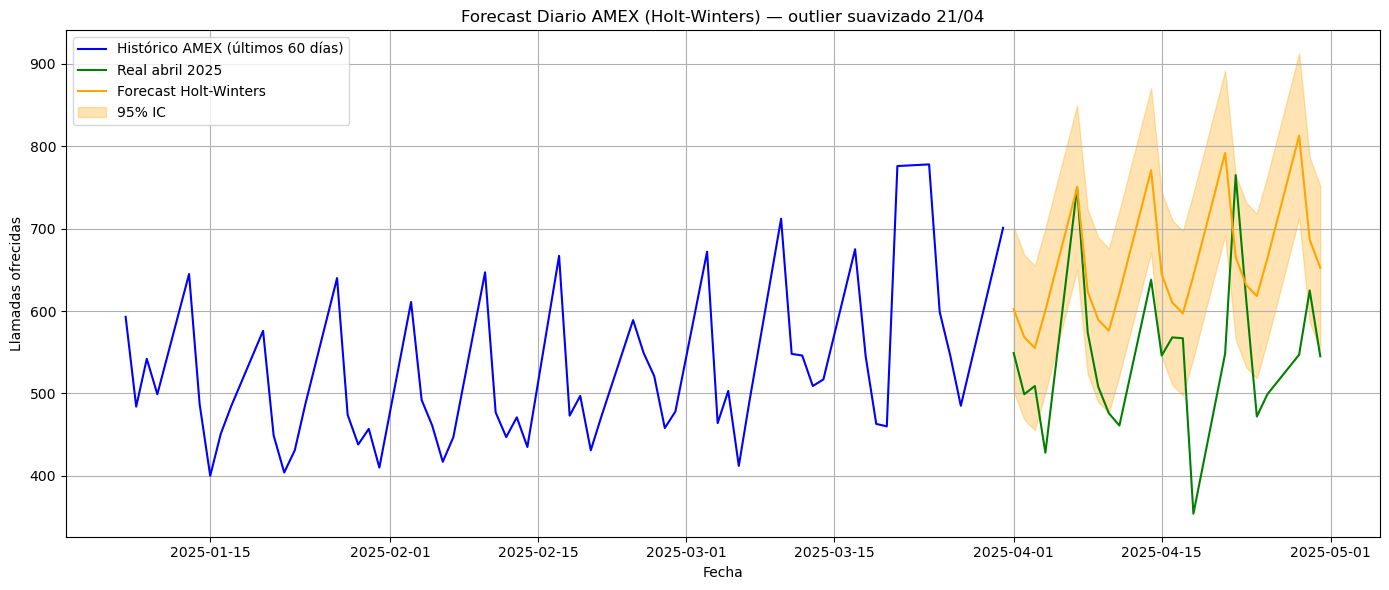

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(archivo, sheet_name='call_volumen')
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtrar AMEX, días laborales (lu–vi) y jornada de 9 a 18h
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Agregar por fecha
serie = df_amex.groupby(df_amex['date_time'].dt.date)['Offered'].sum()
serie.index = pd.to_datetime(serie.index)

# 4. Split entrenamiento y test
train = serie[(serie.index >= '2025-01-02') & (serie.index <= '2025-03-31')]
test  = serie[(serie.index >= '2025-04-01') & (serie.index <= '2025-04-30')].copy()

# 5. Suavizar outlier del 21/04/2025
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in test.index:
    entorno = test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    test.loc[fecha_outlier] = entorno.mean()

# 6. Ajustar modelo Holt-Winters
hw = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=5
).fit()
forecast_hw = hw.forecast(steps=len(test))

# 7. Intervalo de confianza del 95 %
std_err = np.std(hw.resid)
ci_up = forecast_hw + 1.96 * std_err
ci_lo = forecast_hw - 1.96 * std_err

# 8. Métricas
mask_nonzero = test > 0
mae  = mean_absolute_error(test[mask_nonzero], forecast_hw[mask_nonzero])
rmse = np.sqrt(mean_squared_error(test[mask_nonzero], forecast_hw[mask_nonzero]))
mape = np.mean(np.abs((test[mask_nonzero] - forecast_hw[mask_nonzero]) / test[mask_nonzero])) * 100

print(f"📉 MAPE abril 2025 (AMEX, Holt-Winters): {mape:.2f}%")
print(f"📊 MAE  abril 2025: {mae:.2f}")
print(f"📈 RMSE abril 2025: {rmse:.2f}")

# 9. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-60:], label='Histórico AMEX (últimos 60 días)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(forecast_hw.index, forecast_hw, label='Forecast Holt-Winters', color='orange')
plt.fill_between(forecast_hw.index, ci_lo, ci_up, color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario AMEX (Holt-Winters) — outlier suavizado 21/04')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Modelo ARIMA-AMEX

📉 MAPE abril 2025 (AMEX, ARIMA): 12.58%
📊 MAE  abril 2025: 63.49
📈 RMSE abril 2025: 78.77


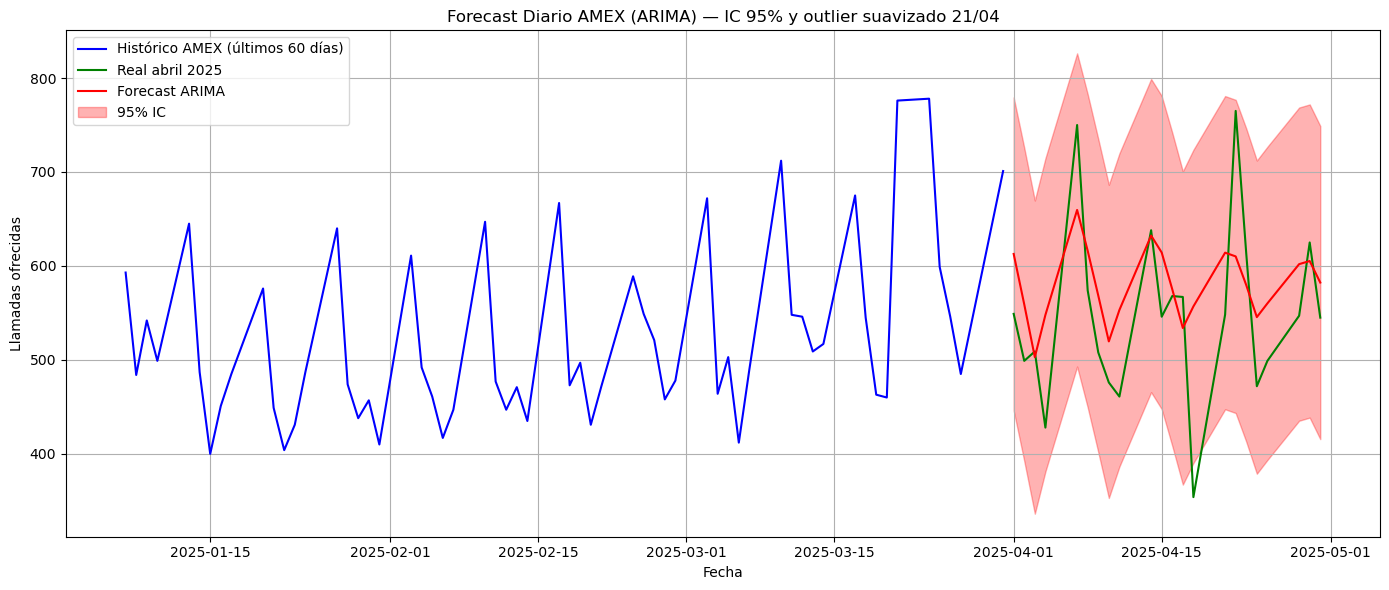

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima

# 1. Cargar datos
#archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
#df = pd.read_excel(archivo, sheet_name='call_volumen')
#df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtrar AMEX, días hábiles y horario laboral
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Agregación diaria
serie_diaria = df_amex.groupby(df_amex['date_time'].dt.date)['Offered'].sum()
serie_diaria.index = pd.to_datetime(serie_diaria.index)

# 4. Split train y test
train = serie_diaria[(serie_diaria.index >= '2025-01-02') & (serie_diaria.index <= '2025-03-31')]
test  = serie_diaria[(serie_diaria.index >= '2025-04-01') & (serie_diaria.index <= '2025-04-30')].copy()

# 5. Suavizado puntual del outlier del 21/04/2025
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in test.index:
    entorno = test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    test.loc[fecha_outlier] = entorno.mean()

# 6. ARIMA automático
model = auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)

# 7. Forecast + IC
n_test = len(test)
forecast = model.predict(n_periods=n_test)
residual_std = np.std(model.resid())

ci_up = forecast + 1.96 * residual_std
ci_lo = forecast - 1.96 * residual_std

forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)
ci_upper_series = pd.Series(ci_up, index=forecast_index)
ci_lower_series = pd.Series(ci_lo, index=forecast_index)

# 8. Métricas
mask_nonzero = test > 0
mae  = mean_absolute_error(test[mask_nonzero], forecast_series[mask_nonzero])
rmse = np.sqrt(mean_squared_error(test[mask_nonzero], forecast_series[mask_nonzero]))
mape = np.mean(np.abs((test[mask_nonzero] - forecast_series[mask_nonzero]) / test[mask_nonzero])) * 100

print(f"📉 MAPE abril 2025 (AMEX, ARIMA): {mape:.2f}%")
print(f"📊 MAE  abril 2025: {mae:.2f}")
print(f"📈 RMSE abril 2025: {rmse:.2f}")

# 9. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-60:], label='Histórico AMEX (últimos 60 días)', color='blue')
plt.plot(test.index, test, label='Real abril 2025', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast ARIMA', color='red')
plt.fill_between(forecast_series.index, ci_lower_series, ci_upper_series, color='red', alpha=0.3, label='95% IC')
plt.title('Forecast Diario AMEX (ARIMA) — IC 95% y outlier suavizado 21/04')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Modelo Seasonal Descompose


<Figure size 1400x1000 with 0 Axes>

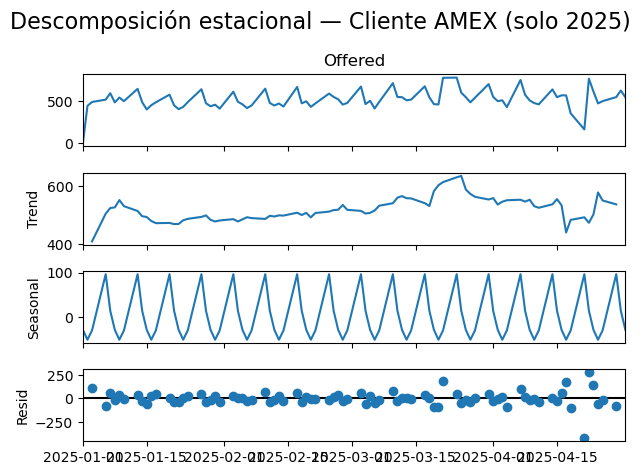

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Cargar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(archivo, sheet_name='call_volumen')
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtrar AMEX, días laborales y horario 9–18h, solo 2025
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.year == 2025) &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Agregar por fecha
serie_diaria = df_amex.groupby(df_amex['date_time'].dt.date)['Offered'].sum()
serie_diaria.index = pd.to_datetime(serie_diaria.index)

# 4. Rellenar días hábiles faltantes
serie_diaria = serie_diaria.asfreq('B')  # frecuencia de business day
serie_diaria = serie_diaria.fillna(method='ffill')  # opcional: rellenar hacia adelante

# 5. Descomposición estacional
resultado = seasonal_decompose(serie_diaria, model='add', period=5)

# 6. Gráfico
plt.figure(figsize=(14, 10))
resultado.plot()
plt.suptitle('Descomposición estacional — Cliente AMEX (solo 2025)', fontsize=16)
plt.tight_layout()
plt.show()


📉 MAPE abril 2025 (Descomposición): 20.13%
📊 MAE abril 2025: 108.21
📈 RMSE abril 2025: 134.88


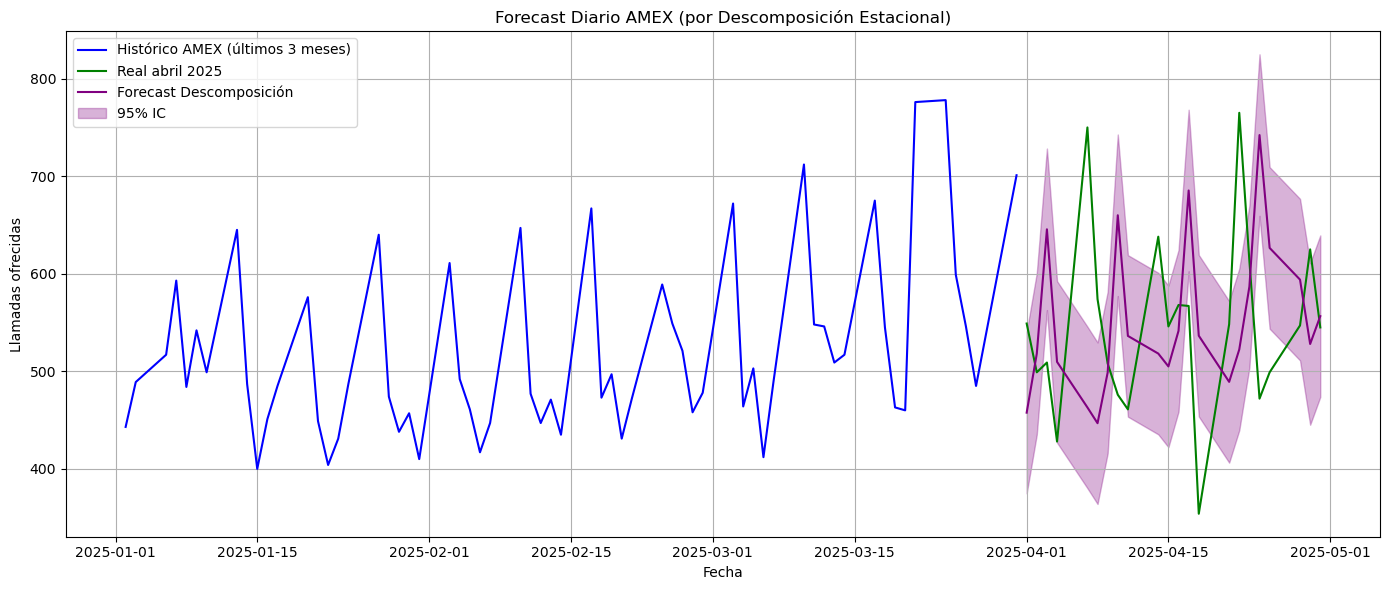

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(archivo, sheet_name='call_volumen')
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtro cliente AMEX, días hábiles y 9–18h
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Serie diaria
serie_diaria = df_amex.groupby(df_amex['date_time'].dt.date)['Offered'].sum()
serie_diaria.index = pd.to_datetime(serie_diaria.index)

# 4. Split train y test
train = serie_diaria[(serie_diaria.index >= '2025-01-02') & (serie_diaria.index <= '2025-03-31')]
test  = serie_diaria[(serie_diaria.index >= '2025-04-01') & (serie_diaria.index <= '2025-04-30')].copy()

# 5. Suavizar outlier puntual
fecha_outlier = pd.Timestamp('2025-04-21')
if fecha_outlier in test.index:
    entorno = test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
    test.loc[fecha_outlier] = entorno.mean()

# 6. Descomposición estacional aditiva (semanal laboral)
result = seasonal_decompose(train.asfreq('B'), model='additive', period=5)

# 7. Forecast
n_dias = len(test)

# Tendencia
trend_vals = result.trend.dropna().iloc[-n_dias:]
if len(trend_vals) < n_dias:
    trend_forecast = np.pad(trend_vals, (n_dias - len(trend_vals), 0), mode='edge')
else:
    trend_forecast = trend_vals.values

# Estacionalidad
seasonality_vals = result.seasonal[:5].values
seasonality_forecast = np.tile(seasonality_vals, n_dias // 5 + 1)[:n_dias]

# Predicción final
predictions_decomp = trend_forecast + seasonality_forecast

# IC 95 %
std_error_decomp = np.std(result.resid.dropna())
ci_upper = predictions_decomp + 1.96 * std_error_decomp
ci_lower = predictions_decomp - 1.96 * std_error_decomp

# Evaluación
real = test
mae_decomp = mean_absolute_error(real, predictions_decomp)
rmse_decomp = np.sqrt(mean_squared_error(real, predictions_decomp))
mape_decomp = np.mean(np.abs((real - predictions_decomp) / real.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025 (Descomposición): {mape_decomp:.2f}%")
print(f"📊 MAE abril 2025: {mae_decomp:.2f}")
print(f"📈 RMSE abril 2025: {rmse_decomp:.2f}")

# 8. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(train[-90:], label='Histórico AMEX (últimos 3 meses)', color='blue')
plt.plot(real.index, real, label='Real abril 2025', color='green')
plt.plot(real.index, predictions_decomp, label='Forecast Descomposición', color='purple')
plt.fill_between(real.index, ci_lower, ci_upper, color='purple', alpha=0.3, label='95% IC')
plt.title('Forecast Diario AMEX (por Descomposición Estacional)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Modelo XGBoost

📉 MAPE abril 2025 (XGBoost): 16.16%
📊 MAE abril 2025: 81.24
📈 RMSE abril 2025: 163.42


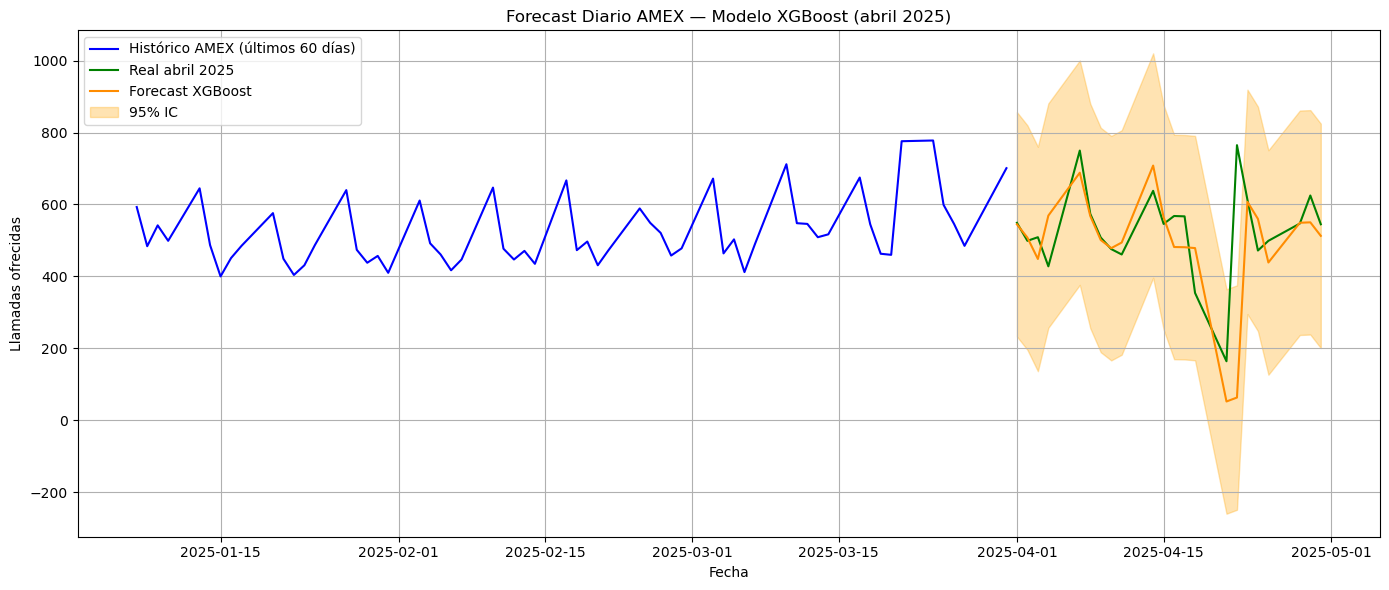

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Cargar y preparar datos
archivo = 'C:/Users/gcasc/proyectos/proyecto_final/data/raw/Queue_Stats.xlsx'
df = pd.read_excel(archivo, sheet_name='call_volumen')
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Filtrar AMEX, días hábiles y horario 9–18h
mask = (
    (df['cliente'] == 'AMEX') &
    (df['date_time'].dt.weekday < 5) &
    (df['date_time'].dt.hour >= 9) &
    (df['date_time'].dt.hour < 18)
)
df_amex = df[mask].copy()

# 3. Serie diaria
serie = df_amex.groupby(df_amex['date_time'].dt.date)['Offered'].sum()
serie.index = pd.to_datetime(serie.index)

# 4. Crear features temporales
df_features = serie.reset_index()
df_features.columns = ['date', 'y']
df_features['dayofweek'] = df_features['date'].dt.dayofweek
df_features['is_month_end'] = df_features['date'].dt.is_month_end.astype(int)

# 5. Lags
for lag in [1, 2, 3, 4, 5]:
    df_features[f'lag_{lag}'] = df_features['y'].shift(lag)

# 6. Preparar dataset final
df_features.dropna(inplace=True)
df_features.set_index('date', inplace=True)

# 7. Separar train y test
X = df_features.drop(columns='y')
y = df_features['y']
X_train = X[X.index <= '2025-03-31']
X_test  = X[X.index >= '2025-04-01']
y_train = y[y.index <= '2025-03-31']
y_test  = y[y.index >= '2025-04-01'].copy()

# 8. Suavizar outlier del 21/04/2025
#fecha_outlier = pd.Timestamp('2025-04-21')
#if fecha_outlier in y_test.index:
#   entorno = y_test.loc['2025-04-16':'2025-04-25'].drop(index=fecha_outlier)
#  y_test.loc[fecha_outlier] = entorno.mean()

# 9. Modelo XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 10. Predicción
y_pred = model.predict(X_test)

# 11. Intervalo de confianza (estimación simplificada)
residuals = y_test - y_pred
std_resid = np.std(residuals)
ci_upper = y_pred + 1.96 * std_resid
ci_lower = y_pred - 1.96 * std_resid

# 12. Métricas
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mape_xgb = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, np.nan))) * 100

print(f"📉 MAPE abril 2025 (XGBoost): {mape_xgb:.2f}%")
print(f"📊 MAE abril 2025: {mae_xgb:.2f}")
print(f"📈 RMSE abril 2025: {rmse_xgb:.2f}")

# 13. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(y_train[-60:], label='Histórico AMEX (últimos 60 días)', color='blue')
plt.plot(y_test.index, y_test, label='Real abril 2025', color='green')
plt.plot(y_test.index, y_pred, label='Forecast XGBoost', color='darkorange')
plt.fill_between(y_test.index, ci_lower, ci_upper, color='orange', alpha=0.3, label='95% IC')
plt.title('Forecast Diario AMEX — Modelo XGBoost (abril 2025)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [165]:
# Desviación típica relativa del test
std_pct = y_test.std() / y_test.mean() * 100

# Imprimir comparación
print(f"📉 Desviación típica relativa: {std_pct:.2f}%")
print(f"📊 MAPE del modelo (XGBoost): {mape_xgb:.2f}%")


📉 Desviación típica relativa: 23.53%
📊 MAPE del modelo (XGBoost): 16.16%


### Comparativa modelos

MAE        RMSE   MAPE (%)  Desv. típica relativa (%)
Holt-Winters    128.105403  183.065297  37.635804                  23.525516
ARIMA            80.955159  123.365686  24.510445                  23.525516
Descomposición  120.300413  151.132632  28.648137                  23.525516
XGBoost          81.239754  163.416263  16.163532                  23.525516

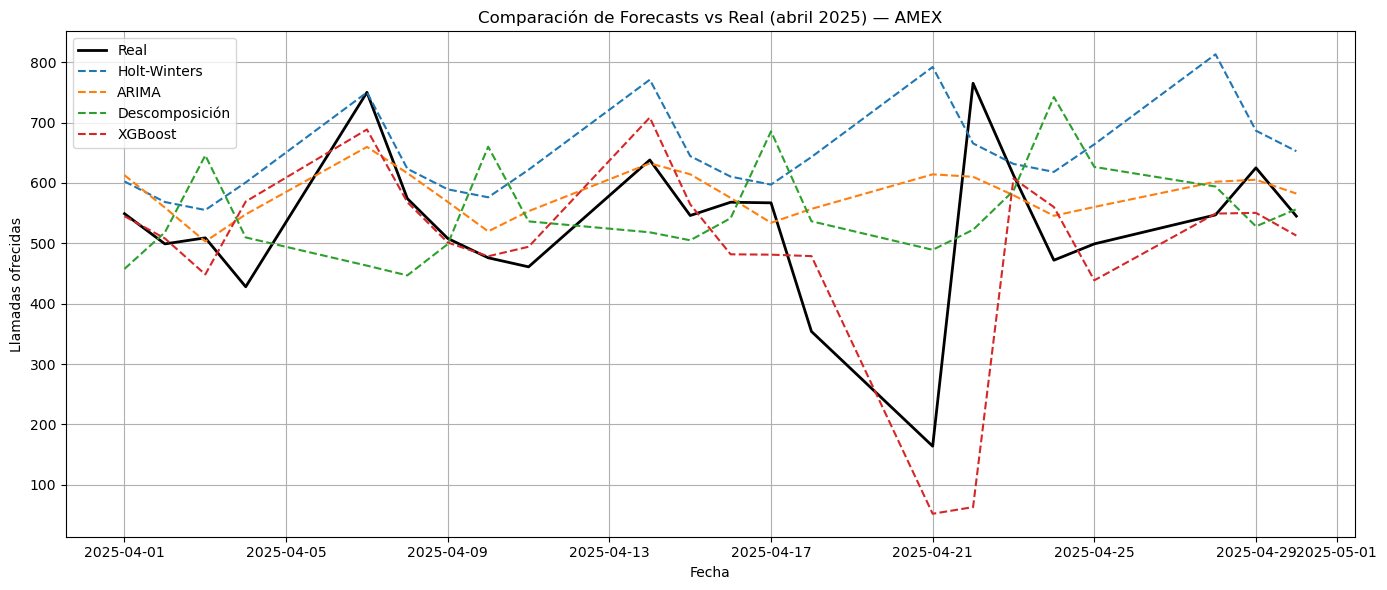

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


fechas = y_test.index
real = y_test.values
holt_winters = forecast_hw.values
arima = forecast_arima.values
decompose = predictions_decomp
xgboost = y_pred



# --- Armar DataFrame comparativo ---
df_resultados = pd.DataFrame({
    'Real': real,
    'Holt-Winters': holt_winters,
    'ARIMA': arima,
    'Descomposición': decompose,
    'XGBoost': xgboost
}, index=fechas)

# --- Calcular métricas ---
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

metricas = {}
for modelo in ['Holt-Winters', 'ARIMA', 'Descomposición', 'XGBoost']:
    mae, rmse, mape = calcular_metricas(df_resultados['Real'], df_resultados[modelo])
    metricas[modelo] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

# --- Desviación típica relativa ---
std_pct = df_resultados['Real'].std() / df_resultados['Real'].mean() * 100

# --- Crear tabla ---
tabla_metricas = pd.DataFrame(metricas).T
tabla_metricas['Desv. típica relativa (%)'] = std_pct

# Mostrar tabla
display(tabla_metricas)

# --- Gráfico comparativo ---
plt.figure(figsize=(14, 6))
plt.plot(df_resultados.index, df_resultados['Real'], label='Real', color='black', linewidth=2)
plt.plot(df_resultados.index, df_resultados['Holt-Winters'], label='Holt-Winters', linestyle='--')
plt.plot(df_resultados.index, df_resultados['ARIMA'], label='ARIMA', linestyle='--')
plt.plot(df_resultados.index, df_resultados['Descomposición'], label='Descomposición', linestyle='--')
plt.plot(df_resultados.index, df_resultados['XGBoost'], label='XGBoost', linestyle='--')
plt.title('Comparación de Forecasts vs Real (abril 2025) — AMEX')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


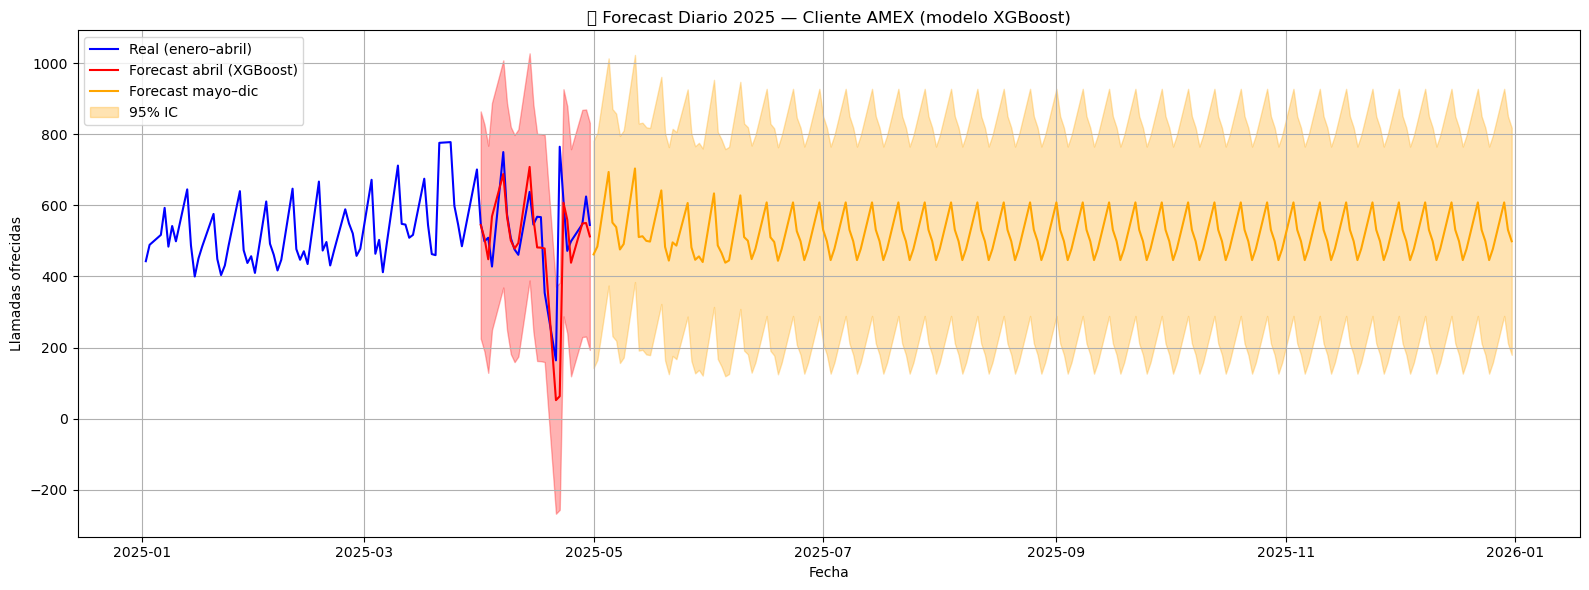

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Crear fechas futuras (solo días hábiles) ---
future_dates = pd.date_range(start='2025-05-01', end='2025-12-31', freq='B')
future_df = pd.DataFrame(index=future_dates)
future_df['dayofweek'] = future_df.index.dayofweek
future_df['is_month_end'] = future_df.index.is_month_end.astype(int)

# --- 2. Usar 'y' completo como base para lags (train + test)
lag_base = y.copy()
future_preds = []

# --- 3. Predicción en cascada día por día ---
for fecha in future_df.index:
    lags = [lag_base[-i] for i in [1, 2, 3, 4, 5]]
    input_data = pd.DataFrame({
        'lag_1': [lags[0]],
        'lag_2': [lags[1]],
        'lag_3': [lags[2]],
        'lag_4': [lags[3]],
        'lag_5': [lags[4]],
        'dayofweek': [fecha.dayofweek],
        'is_month_end': [int(fecha.is_month_end)]
    }, index=[fecha])

    # Reordenar columnas igual que X_train
    input_data = input_data[X_train.columns]

    pred = model.predict(input_data)[0]
    future_preds.append(pred)
    lag_base.loc[fecha] = pred  # Agregar predicción al histórico para siguientes lags

# --- 4. Calcular intervalo de confianza (95%) ---
residuals = y_test - model.predict(X_test)
std_error = residuals.std()
forecast_array = np.array(future_preds)
ci_upper = forecast_array + 1.96 * std_error
ci_lower = forecast_array - 1.96 * std_error

# --- 5. Consolidar resultados ---
df_forecast_ext = pd.DataFrame({
    'forecast': forecast_array,
    'ci_upper': ci_upper,
    'ci_lower': ci_lower
}, index=future_dates)


# --- 6. Gráfico completo desde enero 2025 ---
plt.figure(figsize=(16, 6))

# Combinar entrenamiento + test en una sola serie histórica desde enero
serie_plot = y.copy()  # y contiene toda la serie real (train + test)
serie_plot = serie_plot[serie_plot.index >= '2025-01-02']

plt.plot(serie_plot.index, serie_plot, label='Real (enero–abril)', color='blue')

# Forecast abril
y_pred_test = model.predict(X_test)
plt.plot(y_test.index, y_pred_test, label='Forecast abril (XGBoost)', color='red')
plt.fill_between(y_test.index,
                 y_pred_test - 1.96 * std_error,
                 y_pred_test + 1.96 * std_error,
                 color='red', alpha=0.3)

# Forecast extendido mayo–diciembre
plt.plot(df_forecast_ext.index, df_forecast_ext['forecast'], label='Forecast mayo–dic', color='orange')
plt.fill_between(df_forecast_ext.index,
                 df_forecast_ext['ci_lower'],
                 df_forecast_ext['ci_upper'],
                 color='orange', alpha=0.3, label='95% IC')

plt.title('📈 Forecast Diario 2025 — Cliente AMEX (modelo XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('Llamadas ofrecidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conlusion modelado Forecast Diario 📊

Tras comparar el desempeño de cuatro enfoques de modelado (Holt-Winters, ARIMA, descomposición estacional y XGBoost) aplicados al forecast diario de llamadas del cliente AMEX durante abril 2025, se observó que el modelo basado en XGBoost ofrece consistentemente los mejores resultados en términos de precisión relativa (MAPE).

En particular, XGBoost alcanzó un MAPE del 16,16 %, el más bajo entre todos los modelos evaluados y claramente inferior a la desviación típica relativa de la serie (23,52 %), lo cual demuestra su capacidad para capturar la dinámica real del comportamiento operativo, superando ampliamente a métodos clásicos como Holt-Winters y ARIMA.

Adicionalmente, este patrón se repite en el modelado realizado para el grupo de clientes Columbus (Airbnb + Internacional), donde XGBoost también se posicionó como el modelo más preciso, obteniendo un MAPE del 11 %, confirmando su robustez incluso en contextos multicliente y multilenguaje.

En función de estos resultados, se establece como estrategia adoptar XGBoost como modelo principal de forecast diario para todos los clientes, a menos que se detecten casos específicos donde otro enfoque presente un mejor ajuste. Esta decisión busca estandarizar el proceso de modelado, asegurar mayor precisión y facilitar la implementación operativa de los resultados.



# Modulo II- Calculo de FTEs requeridos segun Earlang C

Para usar Erlang C y estimar el número de agentes que necesitas, debes tener:

Tasa de llegadas (λ)
Número de llamadas que llegan por unidad de tiempo (por segundo, minuto u hora).
Se suele calcular a partir del forecast diario:

𝜆=calls_per_day/work_seconds_per_day

 
Tiempo medio de atención (AHT, en segundos)
Promedio histórico del tiempo que tardas en atender una llamada (incluye talk + hold + ACW).
Se convierte a segundos para que quede en la misma unidad que λ.

Oferta de tráfico (A, en Erlangs)
Es el producto

A=λ×AHT
Representa la “carga” que el sistema debe procesar.

Target time (s)
El umbral máximo de espera que defines (por ejemplo, 20 s o 30 s) para tu service level.

Service level objetivo
El porcentaje de llamadas que quieres contestar dentro del target time (por ejemplo, 0.80 = 80 %).

Horizonte de cálculo
Por lo general un día laboral: 8 horas = 28 800 s, donde se mide λ.


In [122]:
# Bloque para pedir inputs de Erlang C

# 1. Pedir tiempo objetivo (target time) en segundos
target_time = int(input("Introduce el tiempo objetivo de espera (en segundos): "))

# 2. Pedir nivel de servicio objetivo (service level) como fracción o porcentaje
service_level_input = input("Introduce el nivel de servicio objetivo (p.ej. 0.8 para 80% o 80 para 80%): ")

# Convertir a fracción (0–1)
try:
    service_level = float(service_level_input)
    if service_level > 1:
        service_level = service_level / 100.0
except ValueError:
    raise ValueError("Nivel de servicio inválido. Introduce un número, p.ej. 0.8 o 80")

# 3. Mostrar valores para confirmar
print(f"\n► Target time: {target_time} segundos")
print(f"► Service level: {service_level * 100:.1f}%")



► Target time: 20 segundos
► Service level: 30.0%


In [141]:
import pandas as pd
import numpy as np
from math import factorial, exp

# --- 1. Filtrar llamadas válidas para AHT ---
# Clientes Airbnb + Columbus, lunes a viernes, jornada 9–18h
df_aht = df_llamadas[
    df_llamadas['cliente'].isin(['AIRBNB', 'COLUMBUS']) &
    (df_llamadas['date_time'].dt.weekday < 5) &
    (df_llamadas['date_time'].dt.hour >= 9) &
    (df_llamadas['date_time'].dt.hour < 18)
].copy()

# --- 2. Calcular AHT medio por idioma en segundos ---
df_aht['AHT_sec'] = df_aht['AHT'].dt.total_seconds()
aht_por_idioma = df_aht.groupby('idioma')['AHT_sec'].mean().to_dict()

# --- 3. Parámetros Erlang C ---
# service_level   # definido previamente (p.ej. 0.8)
# target_time     # definido previamente (en segundos)
work_seconds = (18 - 9) * 3600  # 9 horas de trabajo = 32400 segundos

# --- 4. Función Erlang C para agentes mínimos ---
def erlang_c_agents(calls, aht, target_sl, target_time, N_max=500):
    """
    Calcula el número mínimo de agentes necesarios usando la fórmula de Erlang C.
    
    Parámetros:
    - calls: número de llamadas pronosticadas en el periodo (por ejemplo, un día).
    - aht: tiempo medio de atención en segundos (AHT).
    - target_sl: nivel de servicio objetivo (fracción, p.ej. 0.8 para 80% en target_time).
    - target_time: umbral máximo de espera en segundos.
    - N_max: número máximo de agentes a probar (por defecto 500).
    
    Devuelve:
    - Número mínimo de agentes que cumple el service level objetivo.
    """

    # Si no hay llamadas o AHT inválido, no se necesitan agentes
    if calls <= 0 or aht <= 0:
        return 0

    # 1. Tasa de llegadas λ (calls por segundo en la jornada)
    lam = calls / work_seconds  # where work_seconds = 9*3600

    # 2. Tráfico ofrecido A en Erlangs
    A = lam * aht

    # 3. Probabilidad de estado 0 (todos los servidores libres)
    def P0(N):
        # Suma de términos para k = 0…N−1
        sum_terms = sum((A ** k) / factorial(k) for k in range(N))
        # Término adicional para el estado N
        last_term = (A ** N) / (factorial(N) * (1 - A / N))
        # P0 = 1 / (suma de todas las probabilidades no normalizadas)
        return 1.0 / (sum_terms + last_term)

    # 4. Probabilidad de que una llamada encuentre todos los servidores ocupados
    def P_wait(N, P0_val):
        # (A^N / N!) * P0 * (N / (N−A))
        return ((A ** N) / factorial(N)) * P0_val * (N / (N - A))

    # 5. Service level real para un número de agentes N
    def service_level_calc(N, P0_val):
        # Probabilidad de esperar más de target_time
        Pw = P_wait(N, P0_val) * exp(-(N - A) * (target_time / aht))
        # Nivel de servicio = 1 − P(esperar > target_time)
        return 1 - Pw

    # 6. Buscar el mínimo N que alcance el service level objetivo
    for N in range(1, N_max + 1):
        p0 = P0(N)  # calcular P0 para este N
        sl = service_level_calc(N, p0)  # calcular SL
        if sl >= target_sl:
            return N

    # Si no se alcanza SL con N_max, devolver N_max
    return N_max


# --- 5. Aplicar Erlang C al forecast diario por idioma ---
df_agents = pd.DataFrame(index=df_forecast.index)

for idioma, aht in aht_por_idioma.items():
    col_forecast = f'forecast_{idioma}'
    if col_forecast in df_forecast.columns:
        df_agents[f'agents_{idioma}'] = df_forecast[col_forecast].apply(
            lambda calls: erlang_c_agents(calls, aht, service_level, target_time)
        )

# --- 6. Ver resultados ---
display(df_agents.head(5))



agents_DE  agents_DK  agents_EN  agents_ES  agents_FI  agents_FR  \
Fecha                                                                          
2025-05-01          1          1          1          1          0          1   
2025-05-02          1          1          1          1          0          1   
2025-05-05          1          1          1          1          0          1   
2025-05-06          1          1          1          1          0          1   
2025-05-07          1          1          1          1          0          1   

            agents_IT  agents_NL  agents_NO  agents_Other  agents_PO  \
Fecha                                                                  
2025-05-01          1          1          0             0          0   
2025-05-02          1          1          0             0          0   
2025-05-05          1          1          0             0          0   
2025-05-06          1          1          0             0          0   
2025-05-07          1          1          0             0          0   

            agents_PT  agents_SE  
Fecha                             
2025-05-01          1          1  
2025-05-02          1          1  
2025-05-05          1          1  
2025-05-06          1          1  
2025-05-07          1          1

In [142]:
# maximo de agentes por idioma
df_agents.max()


agents_DE       1
agents_DK       1
agents_EN       1
agents_ES       1
agents_FI       0
agents_FR       1
agents_IT       1
agents_NL       1
agents_NO       0
agents_Other    0
agents_PO       0
agents_PT       1
agents_SE       1
dtype: int64

In [143]:
from pathlib import Path

# 1. Detectar la raíz del proyecto de forma dinámica
cwd = Path.cwd()
# Si estamos dentro de la carpeta "notebooks", subimos un nivel
project_root = cwd.parent if cwd.name == "notebooks" else cwd

# 2. Definir carpeta relativa data/processed y crearla si no existe
output_dir = project_root / "data" / "processed"
output_dir.mkdir(parents=True, exist_ok=True)

# 3. Guardar únicamente en formato Excel
excel_path = output_dir / "FTE_idioma.xlsx"
df_agents.to_excel(excel_path, index=True, sheet_name="FTE")

print(f"✅ Archivo guardado en: {excel_path}")


✅ Archivo guardado en: c:\Users\gcasc\proyectos\proyecto_final\data\processed\FTE_idioma.xlsx
